### Exercises
 
1. Rerun the last regression where, only including oecd countries in the subset. A list of OECD countries is provided. You will need to find the 3 letter ISO code associated with each country. (Hint: Reimport the dataframe we saved early in the lesson)

2. Plot the residuals in a histogram. Explain why the shape of the distribution of these residuals are distinct from the shape of the residuals plotted in the first regressions from this lesson.

3. Plot seperate scatter plots for each variable (x-axis) against the predictor (y-axis). ThenPlot seperate scatter plots for each variable (x-axis) against the predictor (y-axis). Do we observe bias in the resdiuals when controlling for each variable? Why does this matter?

4. Plot the observed and predicted values of RGDP Per Capita for each individual country.

5. Repeat questions 1 through 4 using 2 year lags and differences instead of 5 year lags and differences.

In [230]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl

In [231]:
def plot_residuals(r_df, y_var, x_vars):

    fig, ax = plt.subplots(figsize = (14,10))

    r_df.plot.scatter(x = y_var[0],
                     y = "Predictor", 
                      s = 30, ax = ax)
    plt.xticks(rotation=90)
    plt.show()
    plt.close()

    for var in y_var + x_vars:
        fig, ax = plt.subplots(figsize = (14,10))
        r_df.plot.scatter(x = var,
                         y = "Residuals", 
                          s = 30, ax = ax)
        ax.axhline(0, ls = "--", color = "k")
        plt.xticks(rotation=90)
        plt.show()
        plt.close()

In [232]:
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
            "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany",
            "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", 
            "Latvia", "Lithuania","Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
             "Poland","Portugal", "Slovakia", "Slovenia", "South Korea", "Spain", "Sweden",
             "Switzerland", "Turkey", "United Kingdom", "United States"]

In [233]:
hw_data = pd.read_excel("EFWAndRGDP.xls")
data = hw_data[hw_data["Countries"].isin(oecd_countries)].dropna(how = "all", axis = 1)

### Use statsmodels.api to reconstruct and compare stats

In [234]:
data.reset_index(inplace=True)
data["Year"] = data["Year"].astype(str).astype("datetime64[ns]").sort_index()
data = data.set_index(["Countries", "Year"]).sort_index()
data

index ISO_Code_3 ISO_Code_2    World Bank Region  \
Countries     Year                                                           
Australia     1970-01-01    245        AUS         AU  East Asia & Pacific   
              1975-01-01    250        NaN         AU  East Asia & Pacific   
              1980-01-01    255        NaN         AU  East Asia & Pacific   
              1985-01-01    260        NaN         AU  East Asia & Pacific   
              1990-01-01    265        NaN         AU  East Asia & Pacific   
...                         ...        ...        ...                  ...   
United States 2014-01-01   7786        NaN         US        North America   
              2015-01-01   7787        NaN         US        North America   
              2016-01-01   7788        NaN         US        North America   
              2017-01-01   7789        NaN         US        North America   
              2018-01-01   7790        NaN         US        North America   

                         World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
Countries     Year                                                                                                                                              
Australia     1970-01-01                                                NaN                                                                                     
              1975-01-01                                                NaN                                                                                     
              1980-01-01                                                NaN                                                                                     
              1985-01-01                                                NaN                                                                                     
              1990-01-01                                                  H                                                                                     
...                                                                     ...                                                                                     
United States 2014-01-01                                                  H                                                                                     
              2015-01-01                                                  H                                                                                     
              2016-01-01                                                  H                                                                                     
              2017-01-01                                                  H                                                                                     
              2018-01-01                                                  H                                                                                     

                           Summary  Size of Government  \
Countries     Year                                       
Australia     1970-01-01  7.291154            6.863768   
              1975-01-01  7.002204            6.255684   
              1980-01-01  7.316469            6.339449   
              1985-01-01  7.670016            6.259326   
              1990-01-01  7.927001            6.708215   
...                            ...                 ...   
United States 2014-01-01  8.249649            7.239681   
              2015-01-01  8.309574            7.237673   
              2016-01-01  8.339536            7.252009   
              2017-01-01  8.379486            7.354358   
              2018-01-01  8.279612            7.409095   

                          Legal System and Property Rights  Sound Money  \
Countries     Year                                                        
Australia   

In [235]:
data.keys()

Index(['index', 'ISO_Code_3', 'ISO_Code_2', 'World Bank Region',
       'World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)',
       'Summary', 'Size of Government', 'Legal System and Property Rights',
       'Sound Money', 'Freedom to Trade Internationally', 'Regulation',
       'RGDP Per Capita'],
      dtype='object')

In [236]:
# Remove any columns not used
data = data[data.keys()[5:]]
data.sort_index(inplace = True)
data

C:\Users\calvi\AppData\Local\Temp\ipykernel_3068\3501341935.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_index(inplace = True)


Summary  Size of Government  \
Countries     Year                                       
Australia     1970-01-01  7.291154            6.863768   
              1975-01-01  7.002204            6.255684   
              1980-01-01  7.316469            6.339449   
              1985-01-01  7.670016            6.259326   
              1990-01-01  7.927001            6.708215   
...                            ...                 ...   
United States 2014-01-01  8.249649            7.239681   
              2015-01-01  8.309574            7.237673   
              2016-01-01  8.339536            7.252009   
              2017-01-01  8.379486            7.354358   
              2018-01-01  8.279612            7.409095   

                          Legal System and Property Rights  Sound Money  \
Countries     Year                                                        
Australia     1970-01-01                          7.775615     9.581113   
              1975-01-01                          8.034445     8.346907   
              1980-01-01                          8.037057     9.085686   
              1985-01-01                          8.540345     9.089736   
              1990-01-01                          8.398730     9.018318   
...                                                    ...          ...   
United States 2014-01-01                          7.652463     9.737154   
              2015-01-01                          7.745733     9.855788   
              2016-01-01                          7.793107     9.814703   
              2017-01-01                          7.802657     9.772320   
              2018-01-01                          7.646530     9.772494   

                          Freedom to Trade Internationally  Regulation  \
Countries     Year                                                       
Australia     1970-01-01                          5.882101    6.335298   
              1975-01-01                          5.692162    6.761980   
              1980-01-01                          5.841104    7.389934   
              1985-01-01                          6.985368    7.469774   
              1990-01-01                          7.661409    7.750886   
...                                                    ...         ...   
United States 2014-01-01                          7.836022    8.792114   
              2015-01-01                          7.810632    8.891698   
              2016-01-01                          7.889129    8.952382   
              2017-01-01                          7.921225    9.031901   
              2018-01-01                          7.783384    8.784245   

                          RGDP Per Capita  
Countries     Year                         
Australia     1970-01-01       19166.0000  
              1975-01-01       20993.0000  
              1980-01-01       22972.0000  
              1985-01-01       24927.0000  
              1990-01-01       27373.0000  
...                                   ...  
United States 2014-01-01       51664.0000  
              2015-01-01       52591.0000  
              2016-01-01       53015.0000  
              2017-01-01       54007.7698  
              2018-01-01       55334.7394  

[900 rows x 7 columns]

In [237]:
reg_vars = list(data.keys())
reg_vars

['Summary',
 'Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

In [238]:
y_var = [reg_vars[-1]] 
x_vars = reg_vars[1:-1]
y_var, x_vars

(['RGDP Per Capita'],
 ['Size of Government',
  'Legal System and Property Rights',
  'Sound Money',
  'Freedom to Trade Internationally',
  'Regulation'])

In [239]:
reg_data = data[reg_vars].dropna() # Dropna to make sure that the sm library works

In [240]:
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
X
results = sm.OLS(y,X).fit()
results

C:\Users\calvi\AppData\Local\Temp\ipykernel_3068\3495529059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [241]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     224.0
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          3.60e-153
Time:                        23:44:54   Log-Likelihood:                -9174.3
No. Observations:                 869   AIC:                         1.836e+04
Df Residuals:                     863   BIC:                         1.839e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                -820.3802    350.222     -2.342      0.019   -1507.767    -132.994
Legal System and Property Rights  6102.0250    367.185     16.618      0.000    5381.345    6822.705
Sound Money                       2250.7536    312.911      7.193      0.000    1636.598    2864.909
Freedom to Trade Internationally  -792.1670    371.394     -2.133      0.033   -1521.109     -63.225
Regulation                        2298.3939    467.796      4.913      0.000    1380.243    3216.545
Constant                         -3.934e+04   3385.581    -11.619      0.000    -4.6e+04   -3.27e+04
==============================================================================
Omnibus:                      205.420   Durbin-Watson:                   0.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              585.081
Skew:                           1.178   Prob(JB):                    8.94e-128
Kurtosis:                       6.257   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
predictor = results.predict()
reg_data[y_var[0] + " Predictor"] = predictor
reg_data

Summary  Size of Government  \
Countries     Year                                       
Australia     1970-01-01  7.291154            6.863768   
              1975-01-01  7.002204            6.255684   
              1980-01-01  7.316469            6.339449   
              1985-01-01  7.670016            6.259326   
              1990-01-01  7.927001            6.708215   
...                            ...                 ...   
United States 2014-01-01  8.249649            7.239681   
              2015-01-01  8.309574            7.237673   
              2016-01-01  8.339536            7.252009   
              2017-01-01  8.379486            7.354358   
              2018-01-01  8.279612            7.409095   

                          Legal System and Property Rights  Sound Money  \
Countries     Year                                                        
Australia     1970-01-01                          7.775615     9.581113   
              1975-01-01                          8.034445     8.346907   
              1980-01-01                          8.037057     9.085686   
              1985-01-01                          8.540345     9.089736   
              1990-01-01                          8.398730     9.018318   
...                                                    ...          ...   
United States 2014-01-01                          7.652463     9.737154   
              2015-01-01                          7.745733     9.855788   
              2016-01-01                          7.793107     9.814703   
              2017-01-01                          7.802657     9.772320   
              2018-01-01                          7.646530     9.772494   

                          Freedom to Trade Internationally  Regulation  \
Countries     Year                                                       
Australia     1970-01-01                          5.882101    6.335298   
              1975-01-01                          5.692162    6.761980   
              1980-01-01                          5.841104    7.389934   
              1985-01-01                          6.985368    7.469774   
              1990-01-01                          7.661409    7.750886   
...                                                    ...         ...   
United States 2014-01-01                          7.836022    8.792114   
              2015-01-01                          7.810632    8.891698   
              2016-01-01                          7.889129    8.952382   
              2017-01-01                          7.921225    9.031901   
              2018-01-01                          7.783384    8.784245   

                          RGDP Per Capita  RGDP Per Capita Predictor  
Countries     Year                                                    
Australia     1970-01-01       19166.0000               33944.825400  
              1975-01-01       20993.0000               34376.323308  
              1980-01-01       22972.0000               37311.653449  
              1985-01-01       24927.0000               39734.632681  
              1990-01-01       27373.0000               38452.056695  
...                                   ...                        ...  
United States 2014-01-01       51664.0000               37335.064068  
              2015-01-01       52591.0000               38421.861297  
              2016-01-01       53015.0000               38683.999293  
              2017-01-01       54007.7698               38720.254260  
              2018-01-01       55334.7394               37263.031399  

[869 rows x 8 columns]

In [243]:
y_hat = reg_data[y_var[0] + " Predictor"]
y_mean = reg_data[y_var[0]].mean()
y = reg_data[y_var[0]]


reg_data["Residuals"] = (y.sub(y_hat))
reg_data["Squared Explained"] = y_hat.sub(y_mean).pow(2)
reg_data["Squared Residuals"] = y.sub(y_hat).pow(2)
reg_data["Squared Totals"] = y.sub(y_mean).pow(2)
reg_data

Summary  Size of Government  \
Countries     Year                                       
Australia     1970-01-01  7.291154            6.863768   
              1975-01-01  7.002204            6.255684   
              1980-01-01  7.316469            6.339449   
              1985-01-01  7.670016            6.259326   
              1990-01-01  7.927001            6.708215   
...                            ...                 ...   
United States 2014-01-01  8.249649            7.239681   
              2015-01-01  8.309574            7.237673   
              2016-01-01  8.339536            7.252009   
              2017-01-01  8.379486            7.354358   
              2018-01-01  8.279612            7.409095   

                          Legal System and Property Rights  Sound Money  \
Countries     Year                                                        
Australia     1970-01-01                          7.775615     9.581113   
              1975-01-01                          8.034445     8.346907   
              1980-01-01                          8.037057     9.085686   
              1985-01-01                          8.540345     9.089736   
              1990-01-01                          8.398730     9.018318   
...                                                    ...          ...   
United States 2014-01-01                          7.652463     9.737154   
              2015-01-01                          7.745733     9.855788   
              2016-01-01                          7.793107     9.814703   
              2017-01-01                          7.802657     9.772320   
              2018-01-01                          7.646530     9.772494   

                          Freedom to Trade Internationally  Regulation  \
Countries     Year                                                       
Australia     1970-01-01                          5.882101    6.335298   
              1975-01-01                          5.692162    6.761980   
              1980-01-01                          5.841104    7.389934   
              1985-01-01                          6.985368    7.469774   
              1990-01-01                          7.661409    7.750886   
...                                                    ...         ...   
United States 2014-01-01                          7.836022    8.792114   
              2015-01-01                          7.810632    8.891698   
              2016-01-01                          7.889129    8.952382   
              2017-01-01                          7.921225    9.031901   
              2018-01-01                          7.783384    8.784245   

                          RGDP Per Capita  RGDP Per Capita Predictor  \
Countries     Year                                                     
Australia     1970-01-01       19166.0000               33944.825400   
              1975-01-01       20993.0000               34376.323308   
              1980-01-01       22972.0000               37311.653449   
              1985-01-01       24927.0000               39734.632681   
              1990-01-01       27373.0000               38452.056695   
...                                   ...                        ...   
United States 2014-01-01       51664.0000               37335.064068   
              2015-01-01       52591.0000               38421.861297   
              2016-01-01       53015.0000               38683.999293   
              2017-01-01       54007.7698               38720.254260   
              2018-01-01       55334.7394               37263.031399   

                             Residuals  Squared Explained  Squared Residuals  \
Countries     Year                                                             
Australia     1970-01-01 -14778.825400       1.434655e+07       2.184137e+08   
              1975-01-01 -13383.323308       1.780149e+07       1.791133e+08   
              1980-01-01 -14339.653449       5.118704e+07       2.056257e+08

In [245]:
SSR = reg_data["Squared Explained"].sum()
SSE = reg_data["Squared Residuals"].sum()
SST = reg_data["Squared Totals"].sum()
SSR,SSE,SST

(97667984222.14679, 75258462987.19211, 172926447209.3388)

In [246]:
n = results.nobs
k = len(results.params)
estimator_variance = SSE / (n - k)
n, k, estimator_variance

(869.0, 6, 87205634.97936513)

In [247]:
cov_matrix = results.cov_params()
cov_matrix

Size of Government  \
Size of Government                     122655.471287   
Legal System and Property Rights        54434.830669   
Sound Money                               531.986495   
Freedom to Trade Internationally        -3513.762172   
Regulation                             -52905.019025   
Constant                              -735523.722416   

                                  Legal System and Property Rights  \
Size of Government                                    54434.830669   
Legal System and Property Rights                     134824.669058   
Sound Money                                           -1818.878497   
Freedom to Trade Internationally                     -18397.251613   
Regulation                                           -90771.346347   
Constant                                            -481992.222172   

                                   Sound Money  \
Size of Government                  531.986495   
Legal System and Property Rights  -1818.878497   
Sound Money                       97913.315652   
Freedom to Trade Internationally -59601.107492   
Regulation                       -49091.189141   
Constant                         -18416.248821   

                                  Freedom to Trade Internationally  \
Size of Government                                    -3513.762172   
Legal System and Property Rights                     -18397.251613   
Sound Money                                          -59601.107492   
Freedom to Trade Internationally                     137933.669700   
Regulation                                           -13075.467175   
Constant                                            -323034.944194   

                                     Regulation      Constant  
Size of Government                -52905.019025 -7.355237e+05  
Legal System and Property Rights  -90771.346347 -4.819922e+05  
Sound Money                       -49091.189141 -1.841625e+04  
Freedom to Trade Internationally  -13075.467175 -3.230349e+05  
Regulation                        218833.003044 -8.530752e+04  
Constant                          -85307.515105  1.146216e+07

In [248]:
# Calculate covariance matrix by hand
XtXInv = np.matrix(np.matmul(X.T,X)).getI()

# multiply by the estimator variance
evmult = estimator_variance * XtXInv

# transform to pd dataframe
pd.DataFrame(evmult, columns = X.keys(), index = X.keys())

C:\Users\calvi\AppData\Local\Temp\ipykernel_3068\2326932703.py:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  XtXInv = np.matrix(np.matmul(X.T,X)).getI()


Size of Government  \
Size of Government                     122655.471287   
Legal System and Property Rights        54434.830669   
Sound Money                               531.986495   
Freedom to Trade Internationally        -3513.762172   
Regulation                             -52905.019025   
Constant                              -735523.722416   

                                  Legal System and Property Rights  \
Size of Government                                    54434.830669   
Legal System and Property Rights                     134824.669058   
Sound Money                                           -1818.878497   
Freedom to Trade Internationally                     -18397.251613   
Regulation                                           -90771.346347   
Constant                                            -481992.222172   

                                   Sound Money  \
Size of Government                  531.986495   
Legal System and Property Rights  -1818.878497   
Sound Money                       97913.315652   
Freedom to Trade Internationally -59601.107492   
Regulation                       -49091.189141   
Constant                         -18416.248821   

                                  Freedom to Trade Internationally  \
Size of Government                                    -3513.762172   
Legal System and Property Rights                     -18397.251613   
Sound Money                                          -59601.107492   
Freedom to Trade Internationally                     137933.669700   
Regulation                                           -13075.467175   
Constant                                            -323034.944194   

                                     Regulation      Constant  
Size of Government                -52905.019025 -7.355237e+05  
Legal System and Property Rights  -90771.346347 -4.819922e+05  
Sound Money                       -49091.189141 -1.841625e+04  
Freedom to Trade Internationally  -13075.467175 -3.230349e+05  
Regulation                        218833.003043 -8.530752e+04  
Constant                          -85307.515105  1.146216e+07

In [249]:
results.params

Size of Government                   -820.380219
Legal System and Property Rights     6102.024951
Sound Money                          2250.753631
Freedom to Trade Internationally     -792.166955
Regulation                           2298.393890
Constant                           -39337.402209
dtype: float64

In [250]:
parameters = {}
for x_var in x_vars:
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = results.params[x_var]
    parameters[x_var]["Standard Error"] = cov_matrix.loc[x_var, x_var] ** (1/2)
    parameters[x_var]["t-stats"] = parameters[x_var]["Beta"] / parameters[x_var]["Standard Error"] 
parameters = pd.DataFrame(parameters).T
parameters

Beta  Standard Error    t-stats
Size of Government                -820.380219      350.222031  -2.342457
Legal System and Property Rights  6102.024951      367.184789  16.618403
Sound Money                       2250.753631      312.911035   7.192951
Freedom to Trade Internationally  -792.166955      371.394224  -2.132954
Regulation                        2298.393890      467.795899   4.913241

In [251]:
r2 = SSR/SST
r2_adjusted = 1 - (SSE / (n - k)) / (SST / (n - 1))
r2_adjusted, r2

(0.5622734845731505, 0.5647949506758402)

(array([-30000., -20000., -10000.,      0.,  10000.,  20000.,  30000.,
         40000.,  50000.]),
 [Text(-30000.0, 0, '−30000'),
  Text(-20000.0, 0, '−20000'),
  Text(-10000.0, 0, '−10000'),
  Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000')])

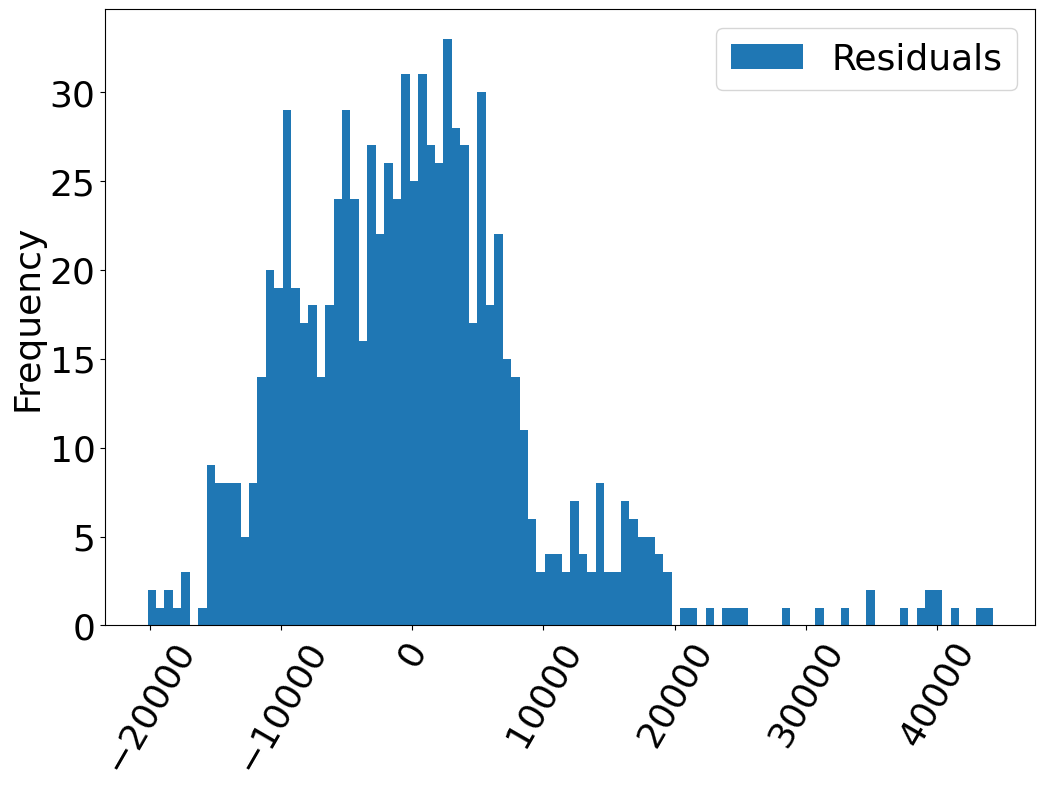

In [252]:
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.xticks(rotation=60)

### Skewness indicated in this one to a greater extent than in the inclass project.

<Axes: ylabel='Frequency'>

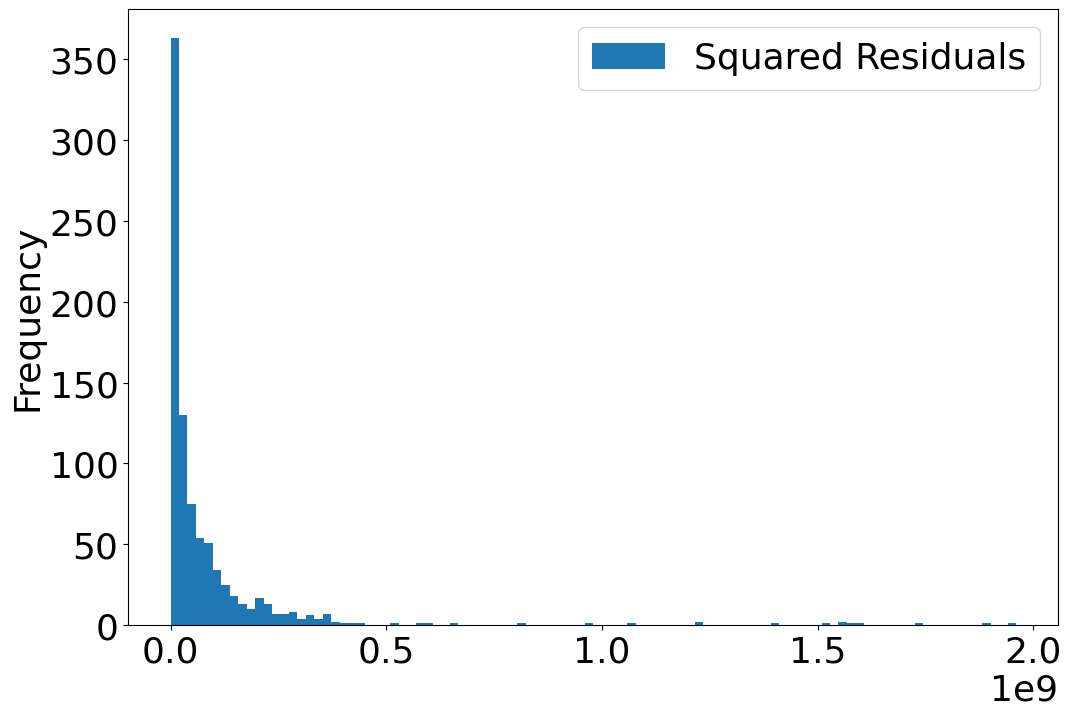

In [253]:
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Squared Residuals"]].plot.hist(bins =100, ax = ax)

<Axes: ylabel='Frequency'>

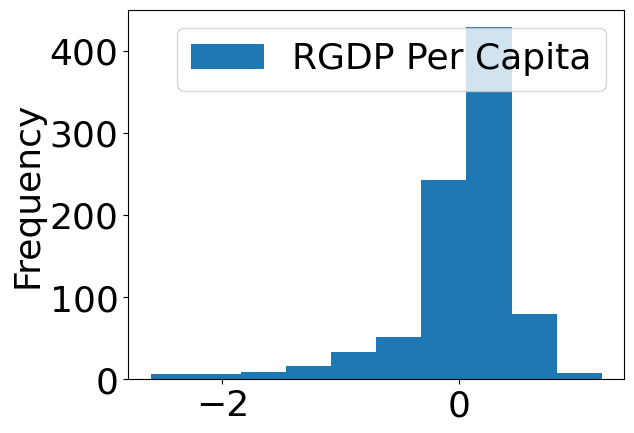

In [254]:
np.log(data[y_var]).diff(5).plot.hist(bins=10)

# Lag

In [255]:
# Regressions with Logged differences
years_diff = 5
reg_data = data
reg_data["RGDP Per Capita"] = np.log(data["RGDP Per Capita"]).groupby("Countries").diff(years_diff)

# Take the log of real gdp then difference within group
reg_data = reg_data.replace([np.inf, -np.inf], np.nan)


C:\Users\calvi\AppData\Local\Temp\ipykernel_3068\3367870231.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita"] = np.log(data["RGDP Per Capita"]).groupby("Countries").diff(years_diff)


In [256]:
y = r_df[y_var]
X = r_df[x_vars]
X,y

(                          Size of Government  \
 Countries     Year                             
 Australia     1995-01-01            6.805072   
               2000-01-01            6.635618   
               2001-01-01            6.563175   
               2002-01-01            6.603237   
               2003-01-01            6.596027   
 ...                                      ...   
 United States 2014-01-01            7.239681   
               2015-01-01            7.237673   
               2016-01-01            7.252009   
               2017-01-01            7.354358   
               2018-01-01            7.409095   
 
                           Legal System and Property Rights  Sound Money  \
 Countries     Year                                                        
 Australia     1995-01-01                          8.396893     9.626862   
               2000-01-01                          8.563815     9.472417   
               2001-01-01                          8.5268

In [257]:
r_df = reg_data.dropna(axis = 0, how = "any")
y = r_df[y_var]
X = r_df[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_df["Predictor"] = results.predict()
r_df["Residuals"] = results.resid
results.summary()

C:\Users\calvi\AppData\Local\Temp\ipykernel_3068\409861495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\calvi\AppData\Local\Temp\ipykernel_3068\409861495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df["Predictor"] = results.predict()
C:\Users\calvi\AppData\Local\Temp\ipykernel_3068\409861495.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     38.45
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           5.91e-35
Time:                        23:45:01   Log-Likelihood:                 199.12
No. Observations:                 714   AIC:                            -386.2
Df Residuals:                     708   BIC:                            -358.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                   0.0299      0.008      3.806      0.000       0.014       0.045
Legal System and Property Rights     0.0265      0.009      3.000      0.003       0.009       0.044
Sound Money                         -0.0779      0.010     -7.685      0.000      -0.098      -0.058
Freedom to Trade Internationally     0.1443      0.014     10.639      0.000       0.118       0.171
Regulation                          -0.0690      0.012     -5.925      0.000      -0.092      -0.046
Constant                            -0.1474      0.124     -1.193      0.233      -0.390       0.095
==============================================================================
Omnibus:                      165.625   Durbin-Watson:                   0.425
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              402.531
Skew:                           1.206   Prob(JB):                     3.90e-88
Kurtosis:                       5.777   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\calvi\AppData\Local\Temp\ipykernel_3068\1499422942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df["Residuals"] = results.resid


<Axes: ylabel='Frequency'>

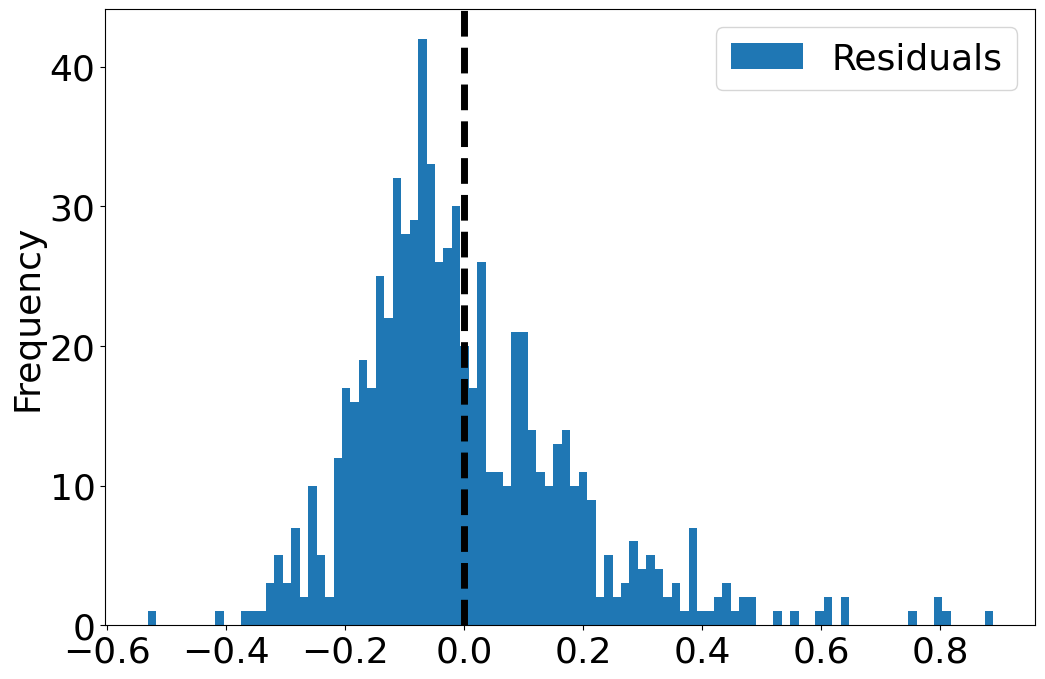

In [258]:
r_df["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))

ax.axvline(r_df["Residuals"].mean(), ls = "--", linewidth = 5, color = 'k')
r_df[["Residuals"]].plot.hist(bins = 100, ax = ax)

### This looks different because there is likely difference between the data present in the whole dataset as opposed to only OECD countries

In [259]:
resultsDict = {"Beta Estimates" : results.params,
              "t-stats":results.tvalues,
              "p-values":results.pvalues,
              "Standard Errors":results.bse}
resultsDF = pd.DataFrame(resultsDict).round(3)
resultsDF.to_csv("y = RGDPC, X = EFW, LogDiffResults.csv")
resultsDF


Beta Estimates  t-stats  p-values  \
Size of Government                         0.030    3.806     0.000   
Legal System and Property Rights           0.026    3.000     0.003   
Sound Money                               -0.078   -7.685     0.000   
Freedom to Trade Internationally           0.144   10.639     0.000   
Regulation                                -0.069   -5.925     0.000   
Constant                                  -0.147   -1.193     0.233   

                                  Standard Errors  
Size of Government                          0.008  
Legal System and Property Rights            0.009  
Sound Money                                 0.010  
Freedom to Trade Internationally            0.014  
Regulation                                  0.012  
Constant                                    0.124

<Axes: xlabel='RGDP Per Capita', ylabel='Predictor'>

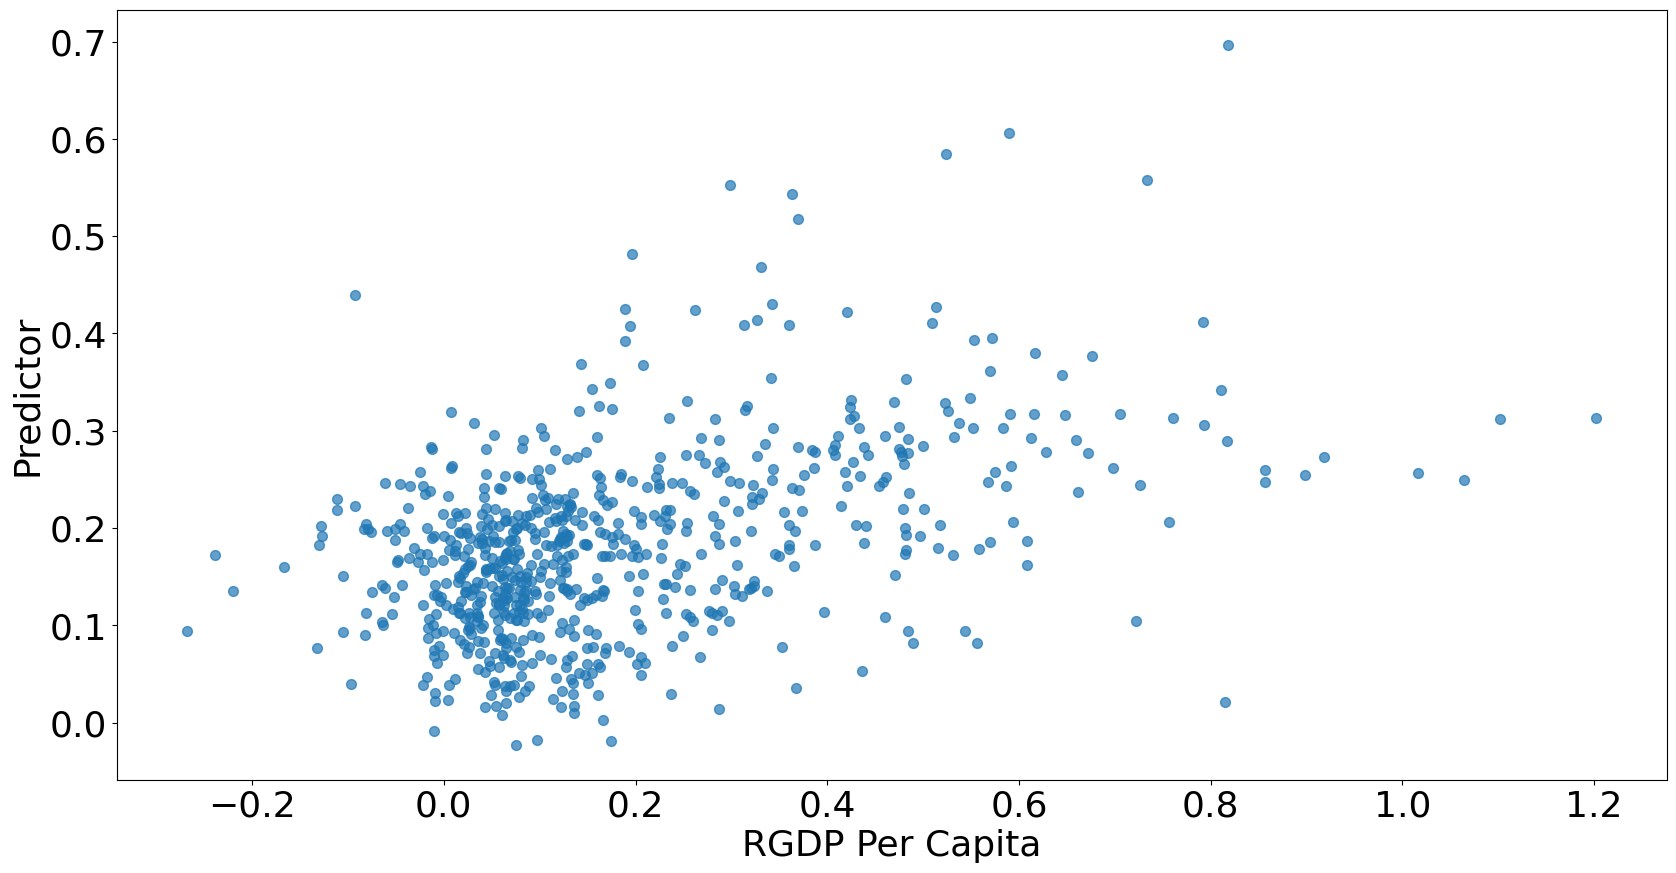

In [260]:
fig, ax = plt.subplots(figsize = (20,10))
r_df.plot.scatter(x = y_var[0],
                 y = "Predictor", 
                  s = 50, 
                  alpha = .7,
                  ax = ax)

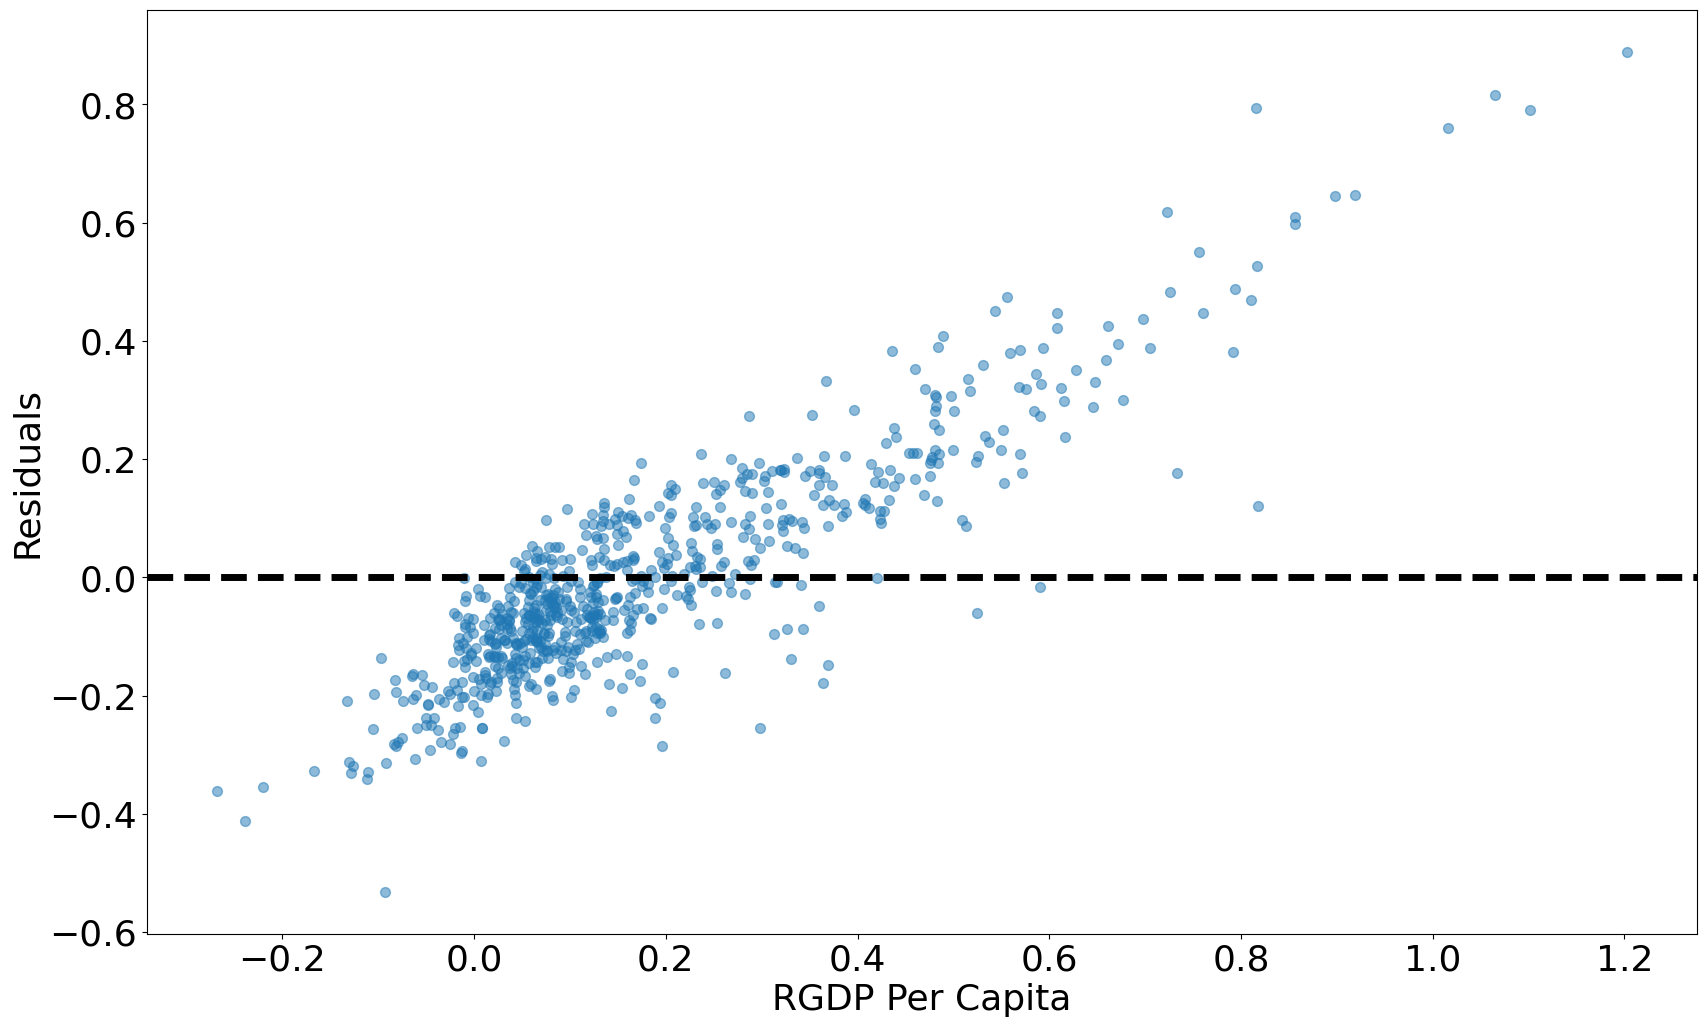

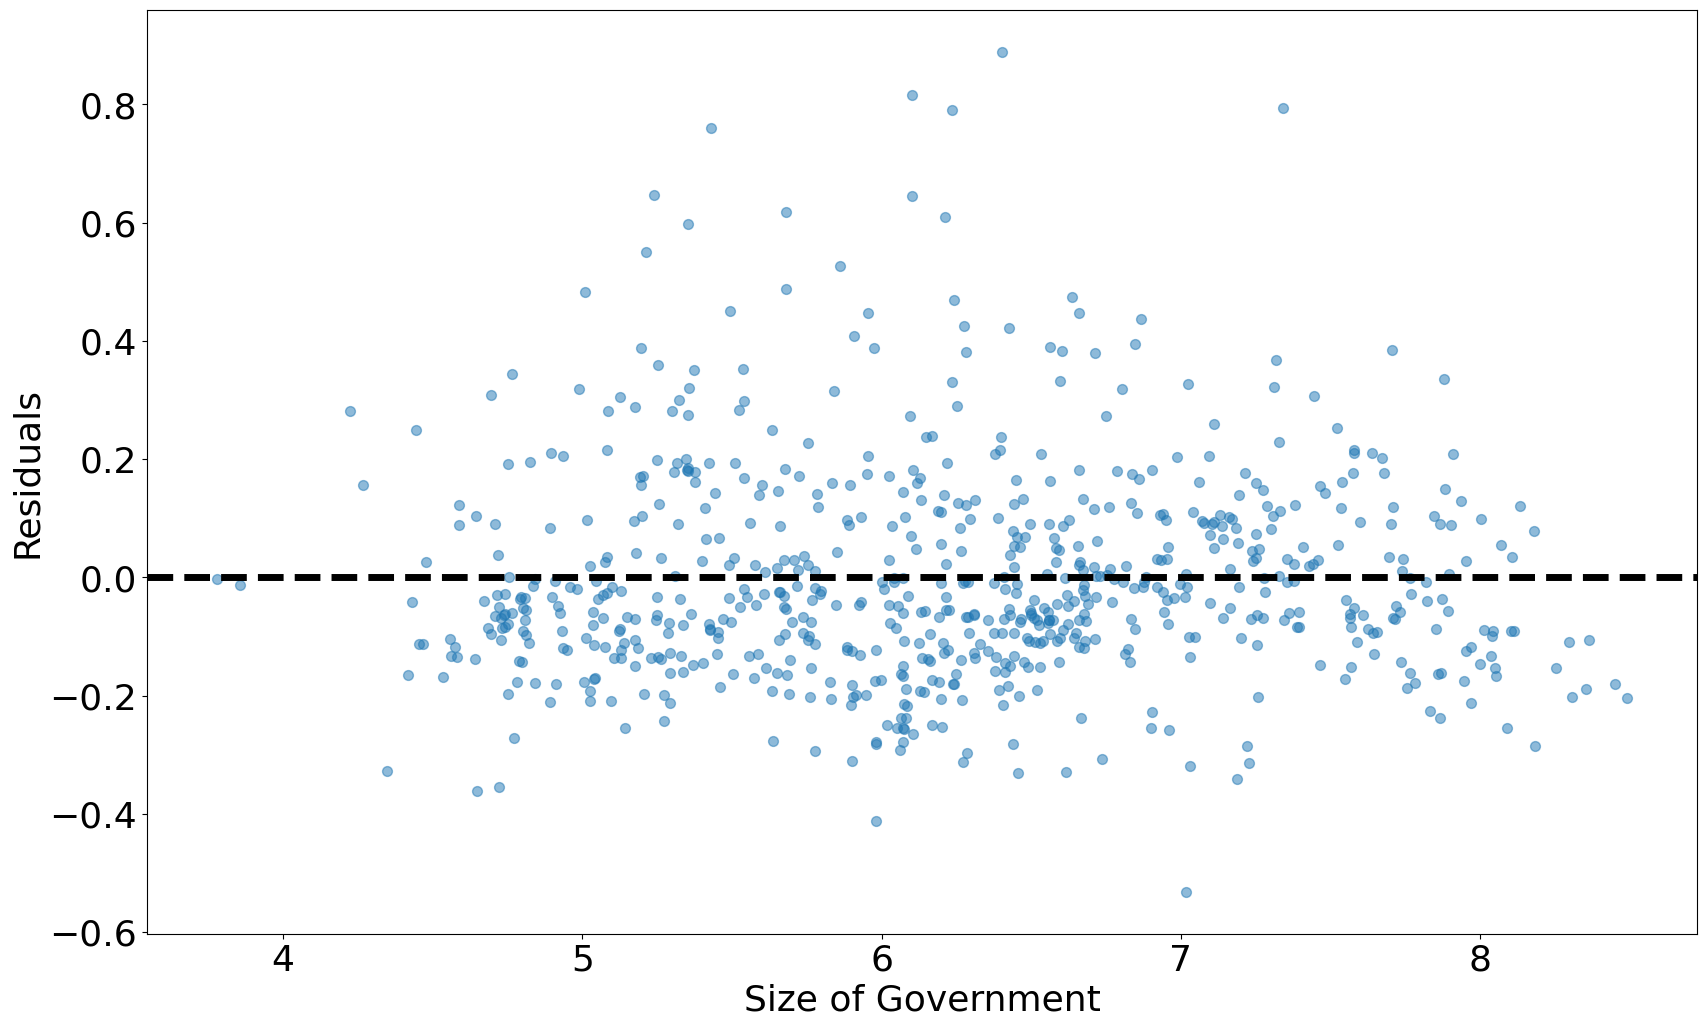

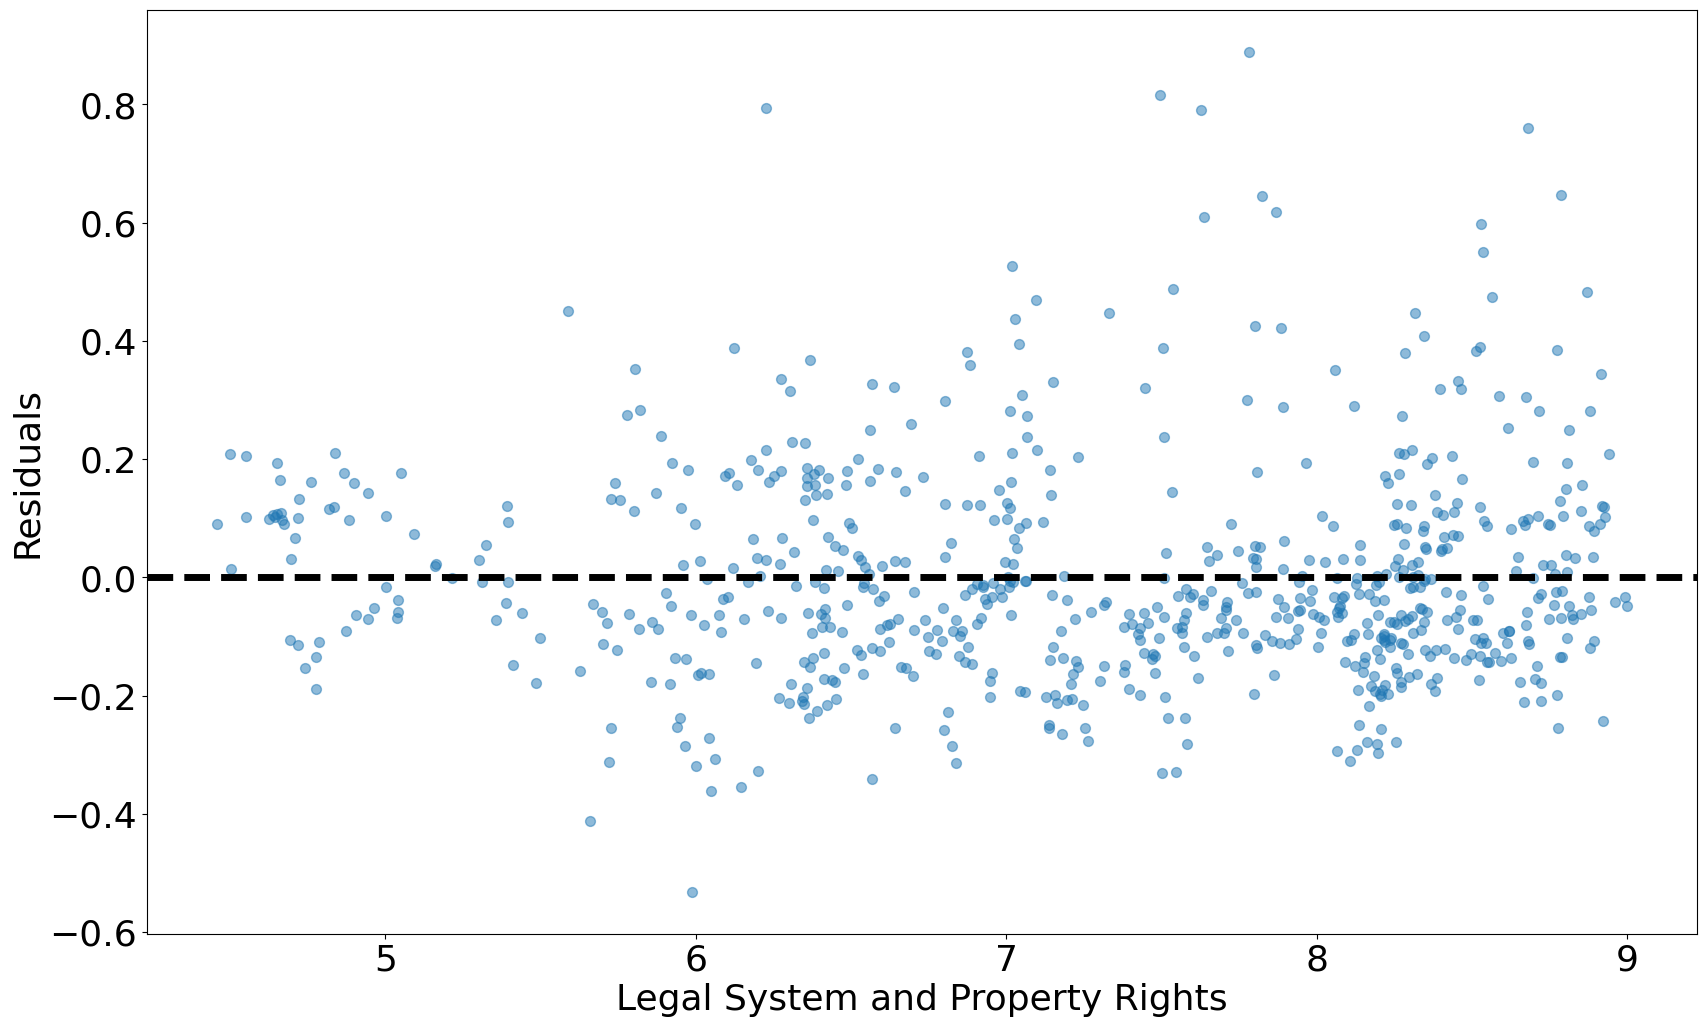

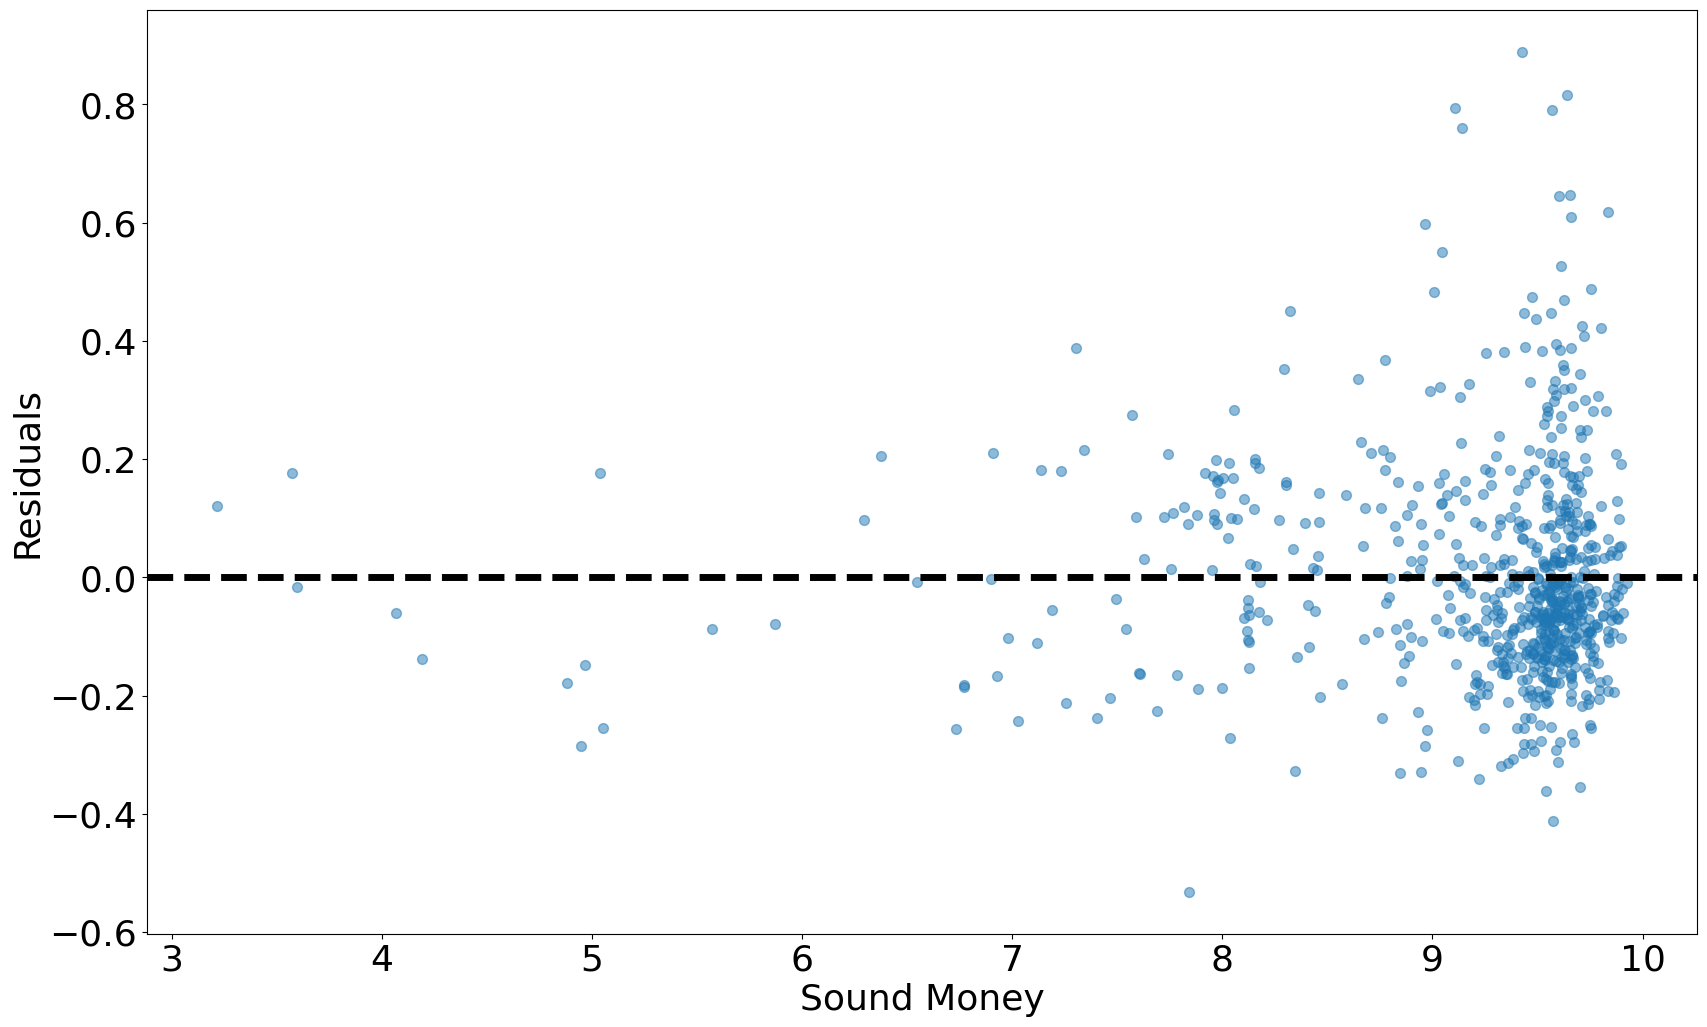

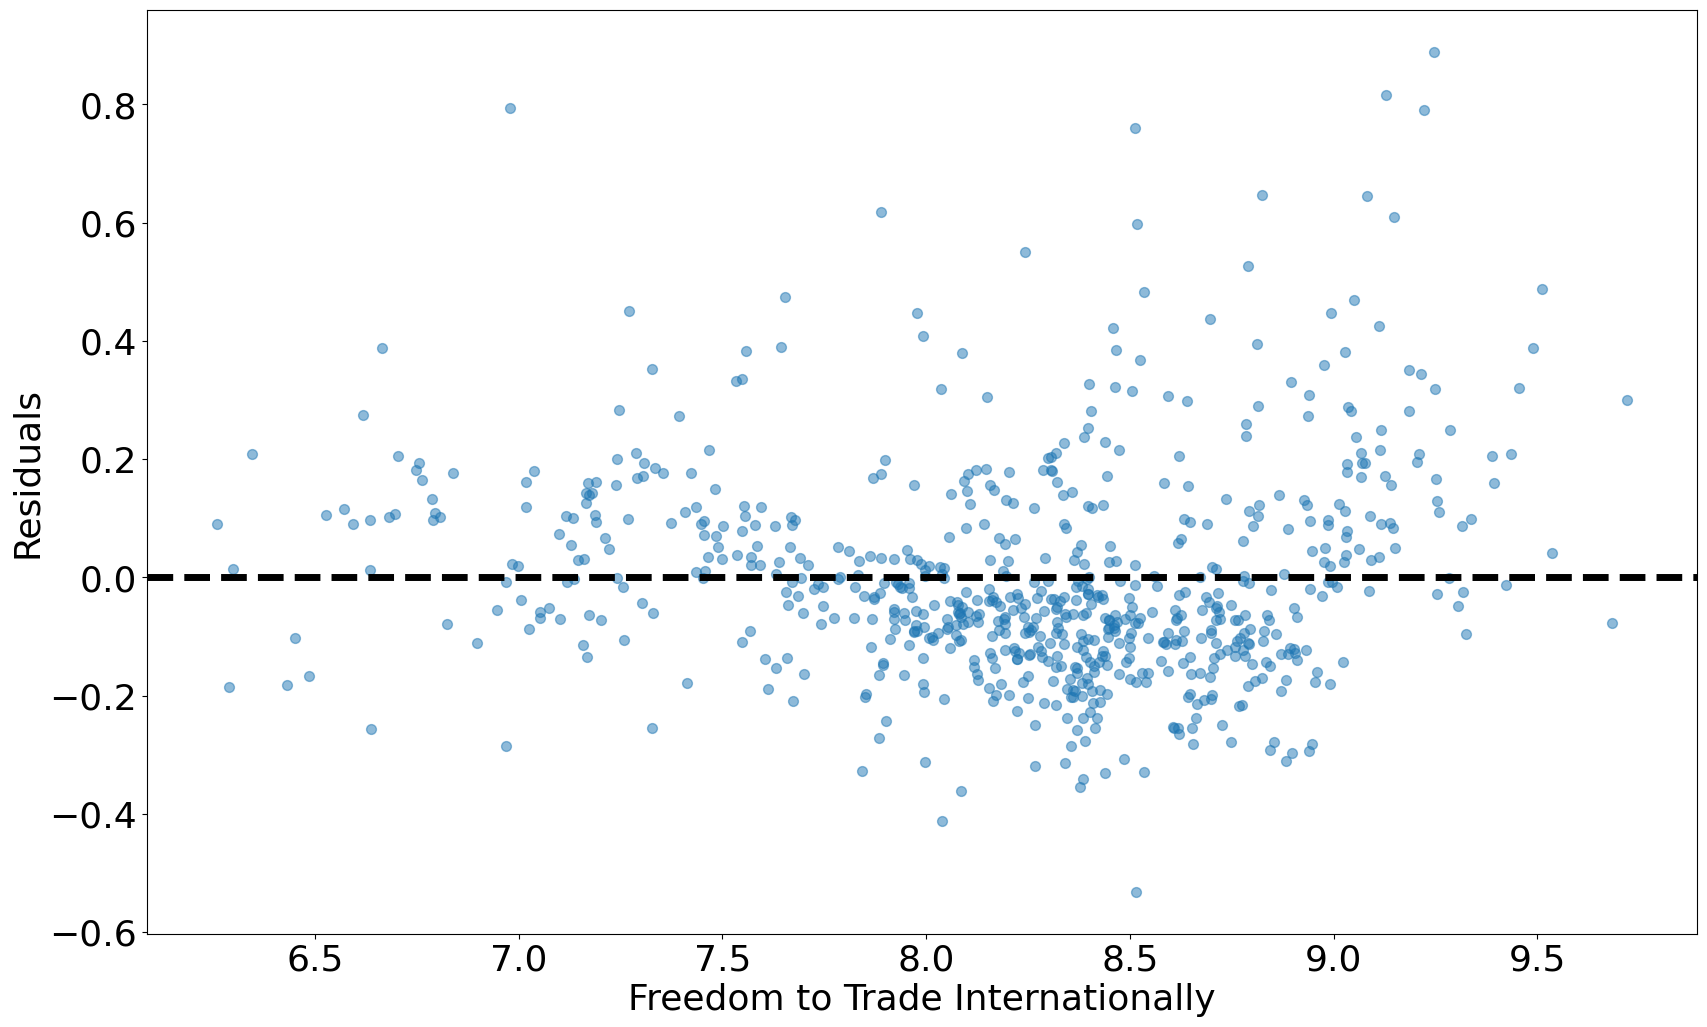

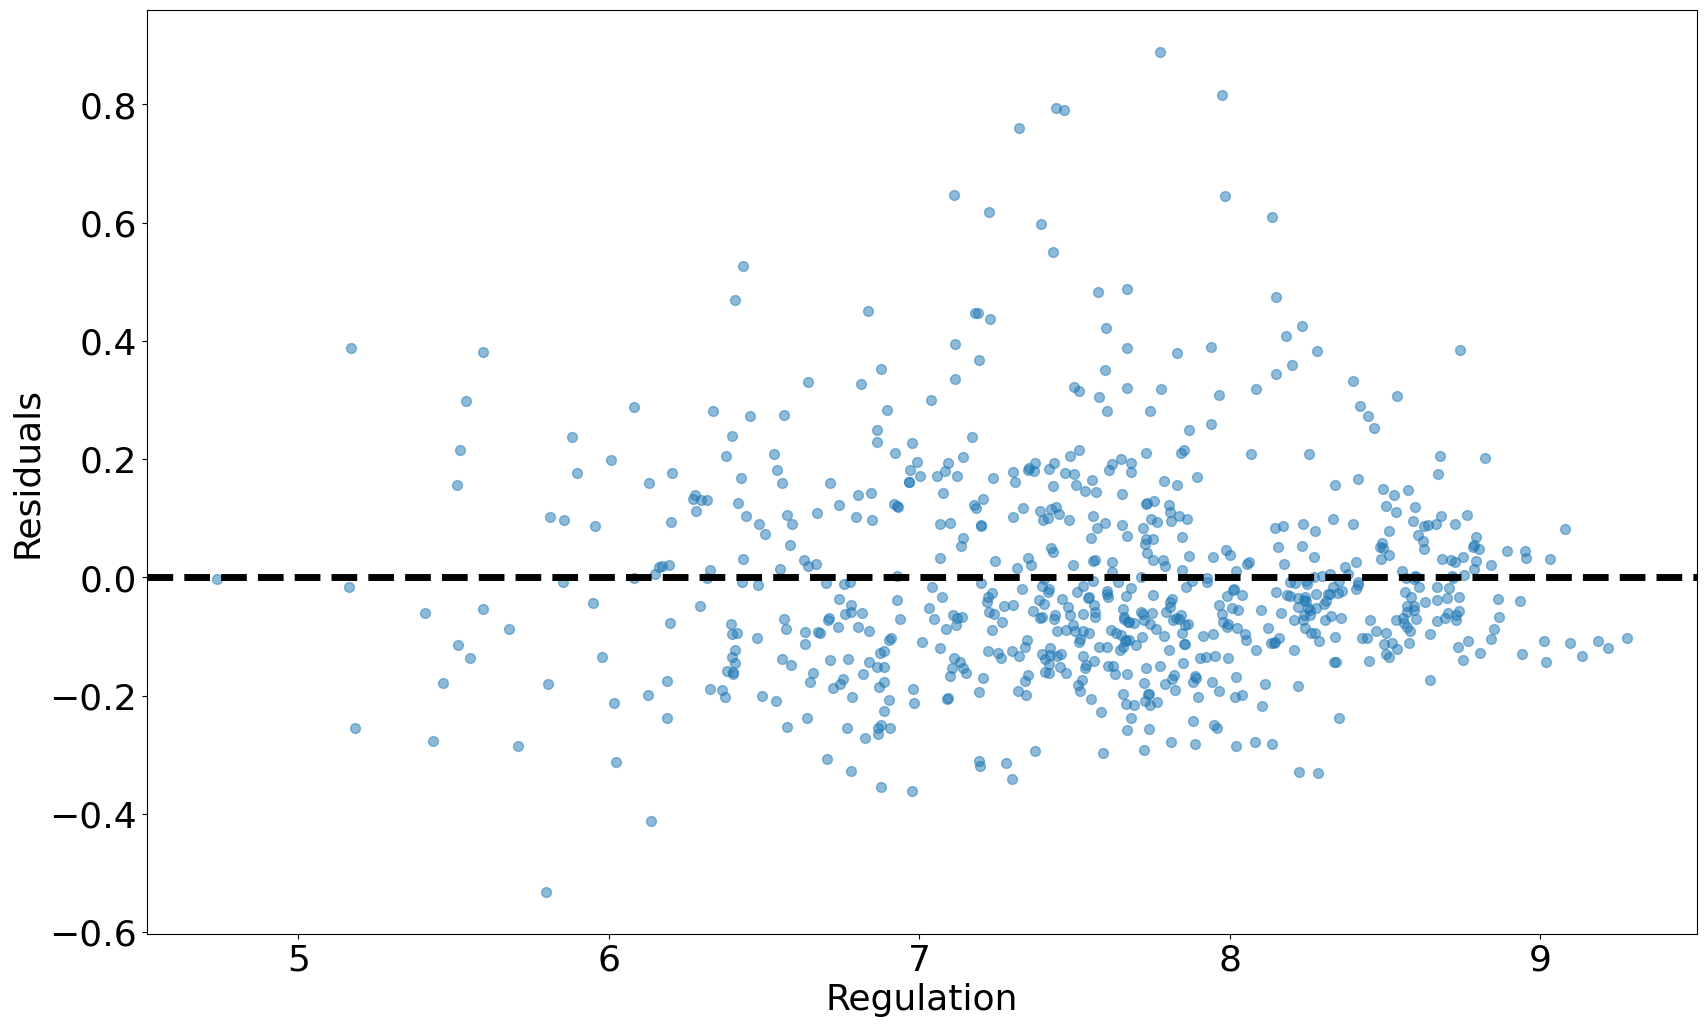

In [261]:
all_vars = y_var + x_vars
for var in all_vars:
    fig,ax=plt.subplots(figsize=(20,12))
    r_df.plot.scatter(x=var,y="Residuals",s=50,alpha=.5,ax=ax)

    ax.axhline(r_df["Residuals"].mean(), ls = "--", linewidth = 5, color = 'k')

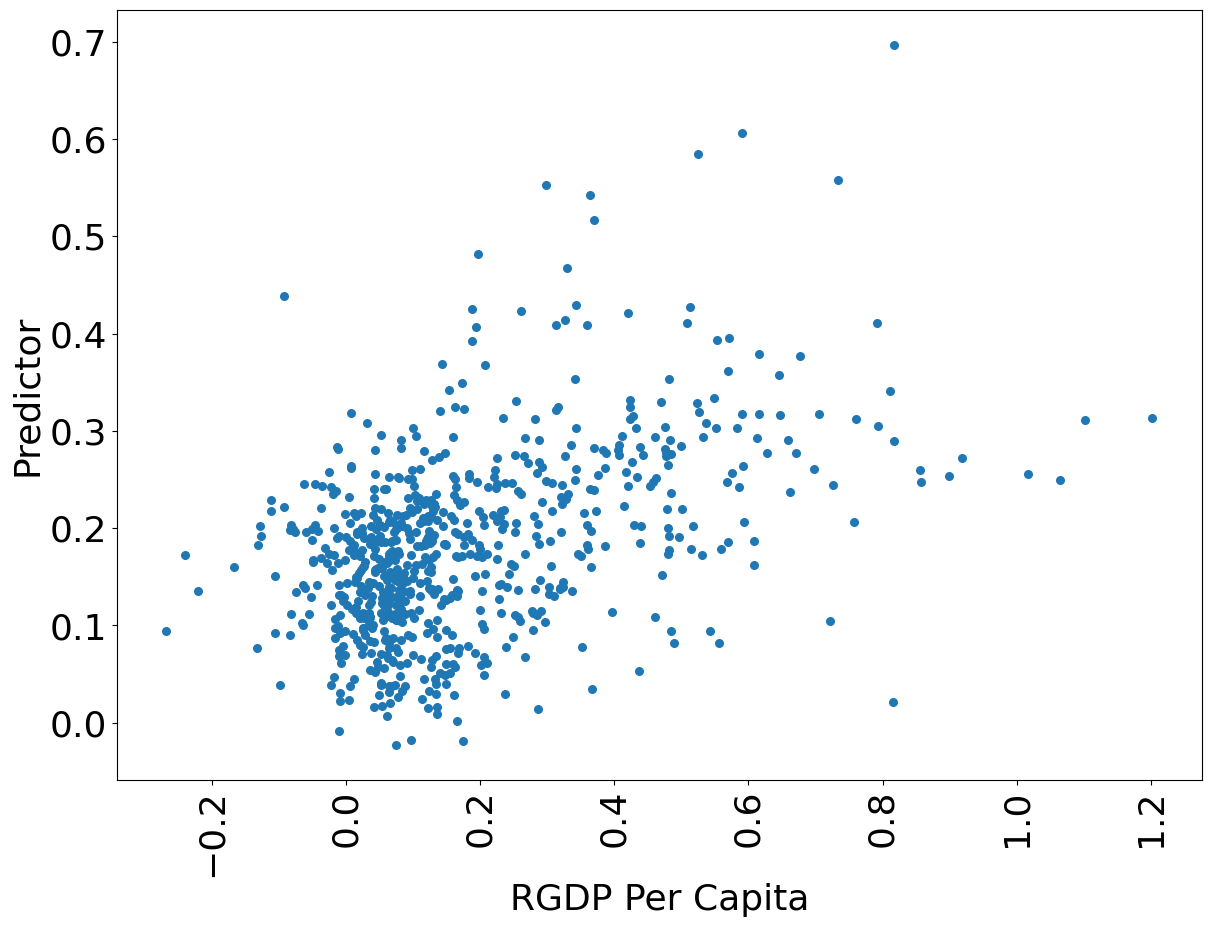

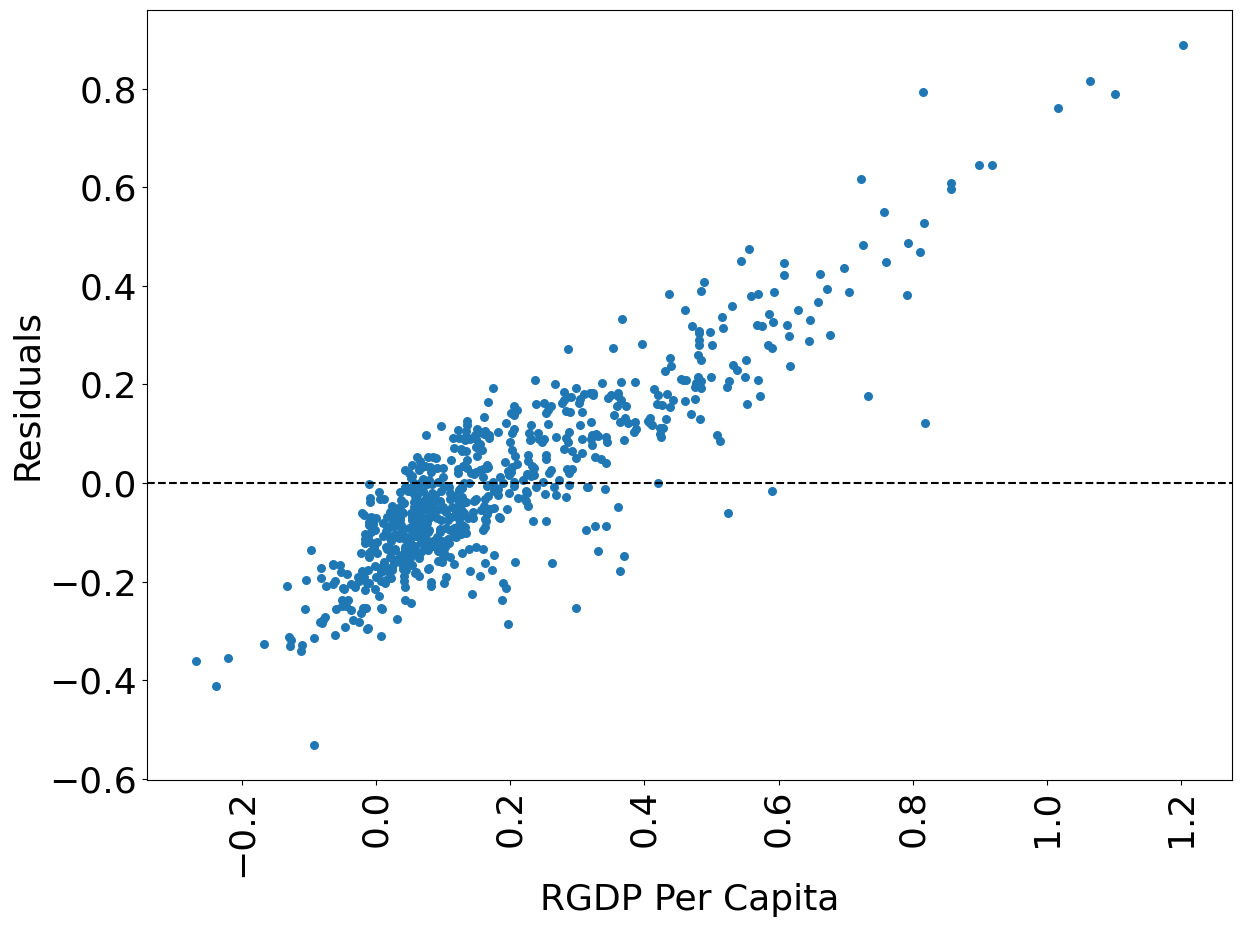

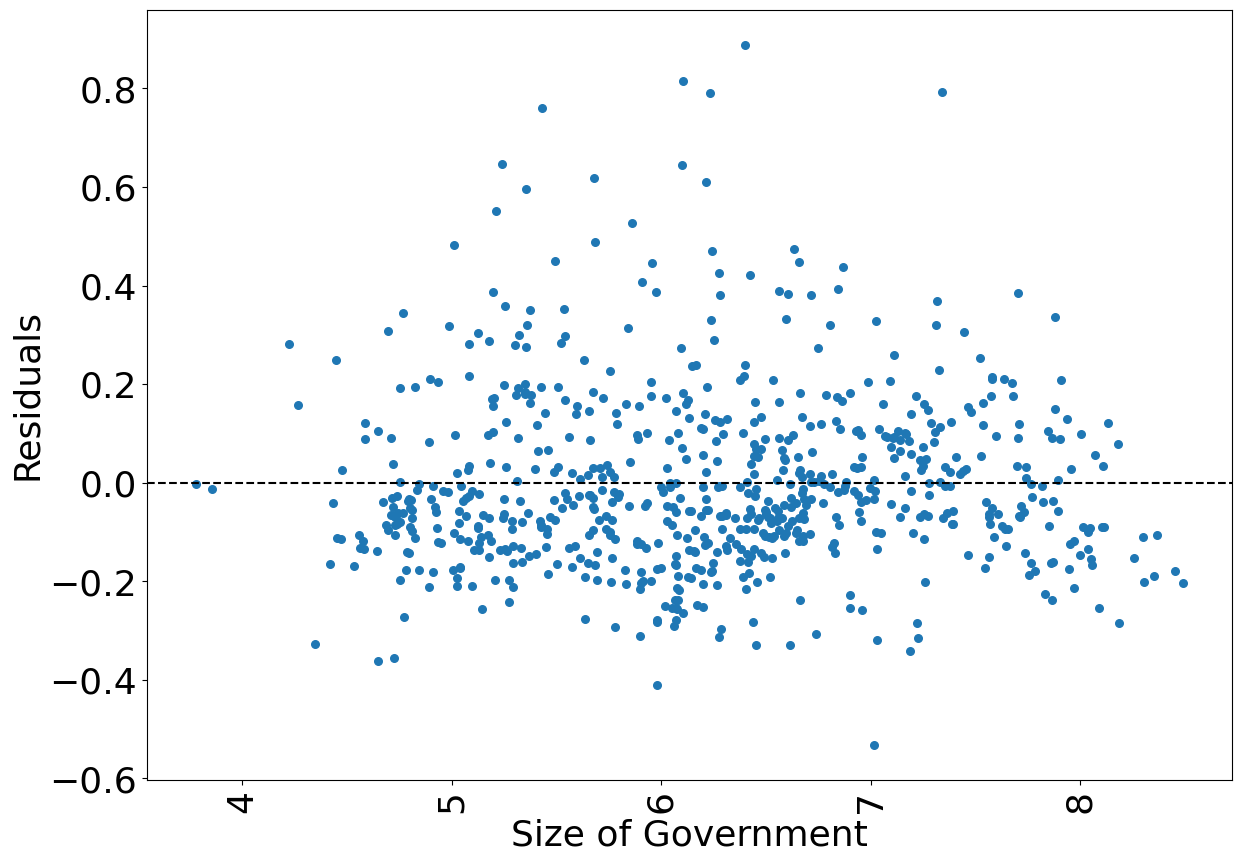

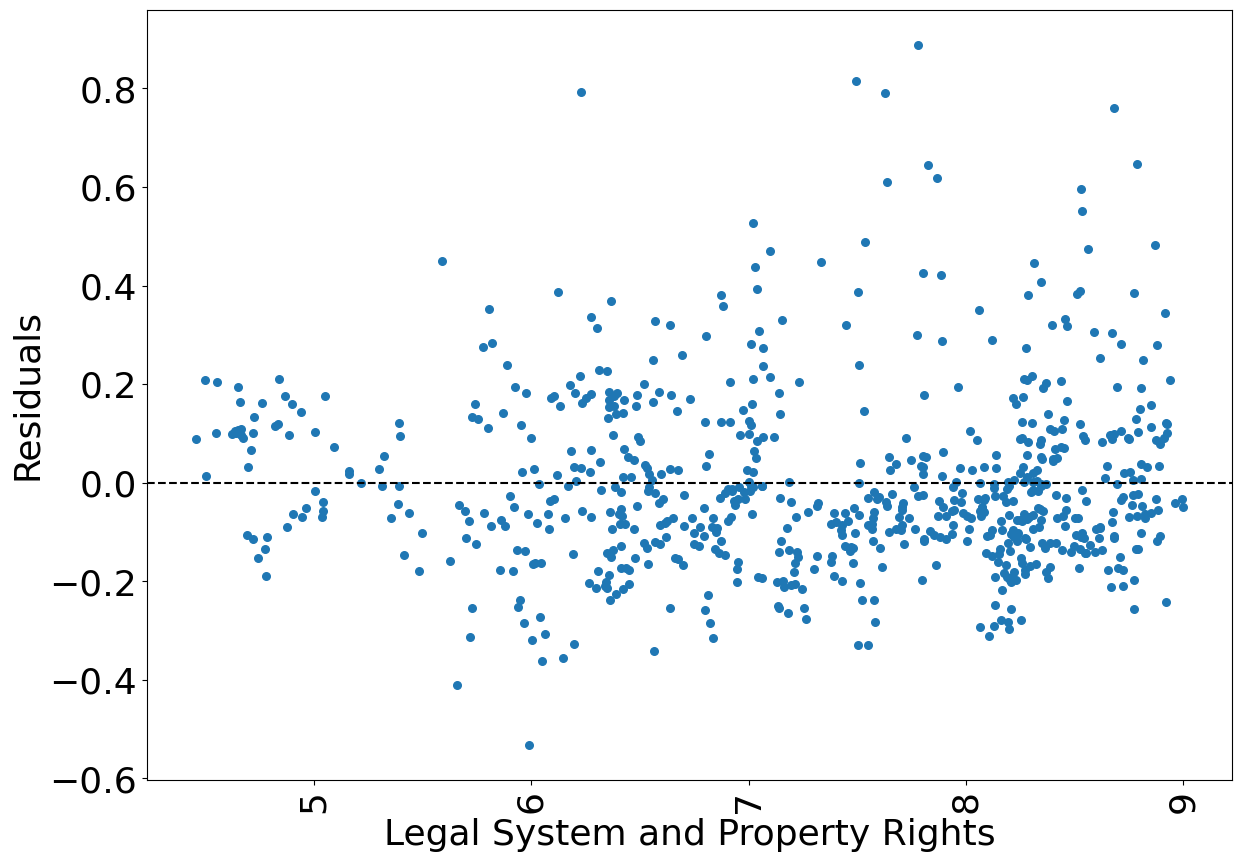

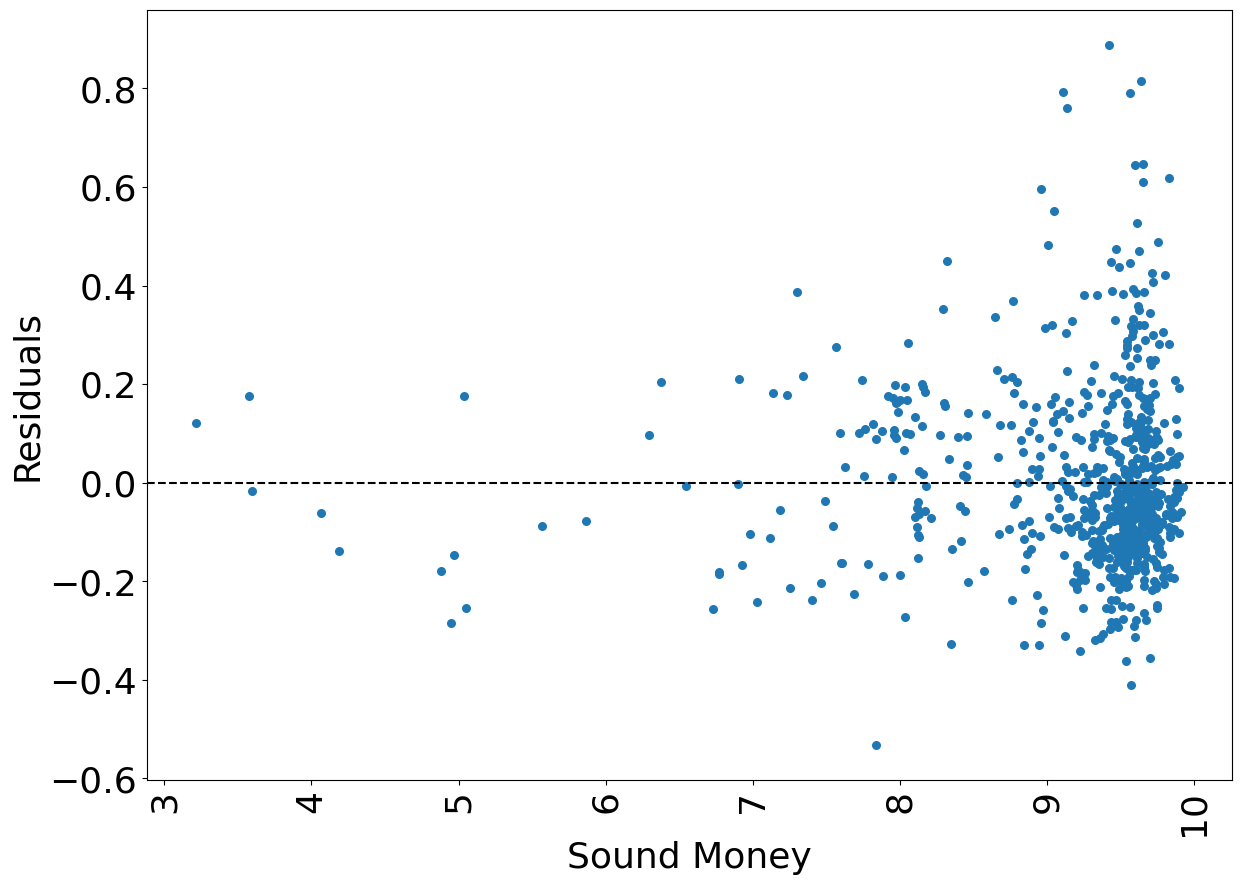

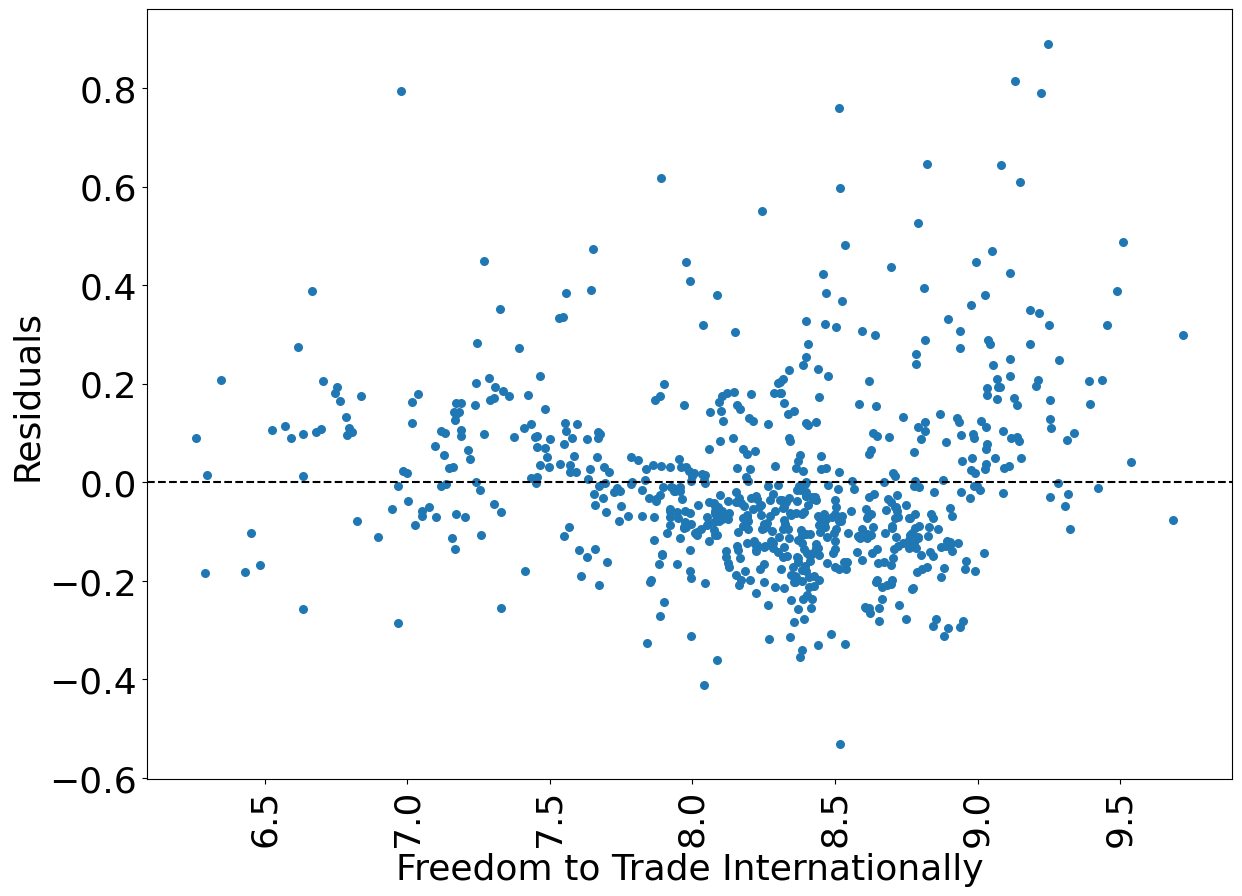

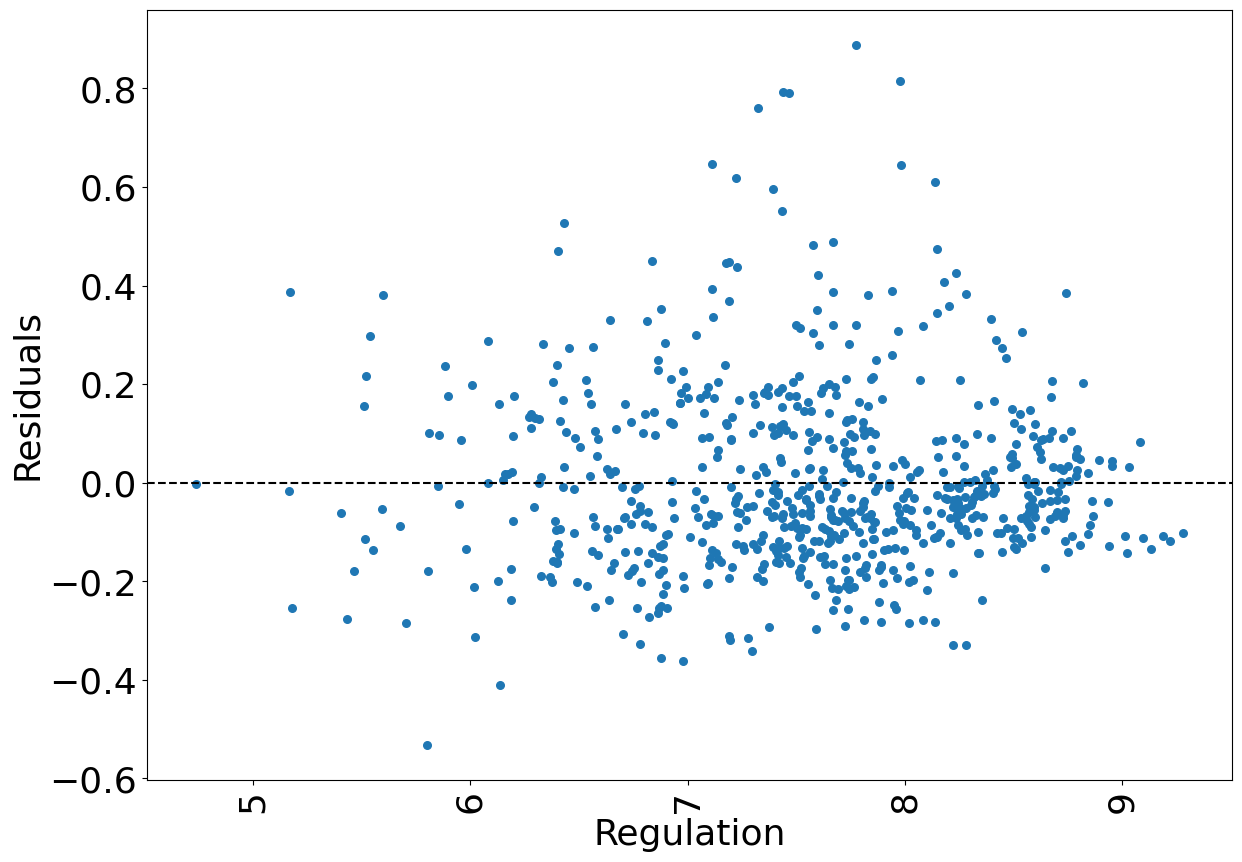

In [262]:
plot_residuals(r_df, y_var, x_vars)

### Seems there is significant bias present within the data. That's not good since we obviously want to predict values. There's problem confounding variables out there. homoskedasticity is NOT obvious and further investigation is required. Residual = observed - predicted

In [263]:
cumulative_data = r_df[[y_var[0], "Predictor"]] + 1
cumulative_data

RGDP Per Capita  Predictor
Countries     Year                                  
Australia     1995-01-01         1.470801   1.151717
              2000-01-01         1.555942   1.081944
              2001-01-01         1.484073   1.094499
              2002-01-01         1.436447   1.052901
              2003-01-01         1.367342   1.035092
...                                   ...        ...
United States 2014-01-01         1.064168   1.037423
              2015-01-01         1.065292   1.020054
              2016-01-01         1.065073   1.032082
              2017-01-01         1.069256   1.037850
              2018-01-01         1.084265   1.032530

[714 rows x 2 columns]

C:\Users\calvi\AppData\Local\Temp\ipykernel_3068\1089396392.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize = (20,10))


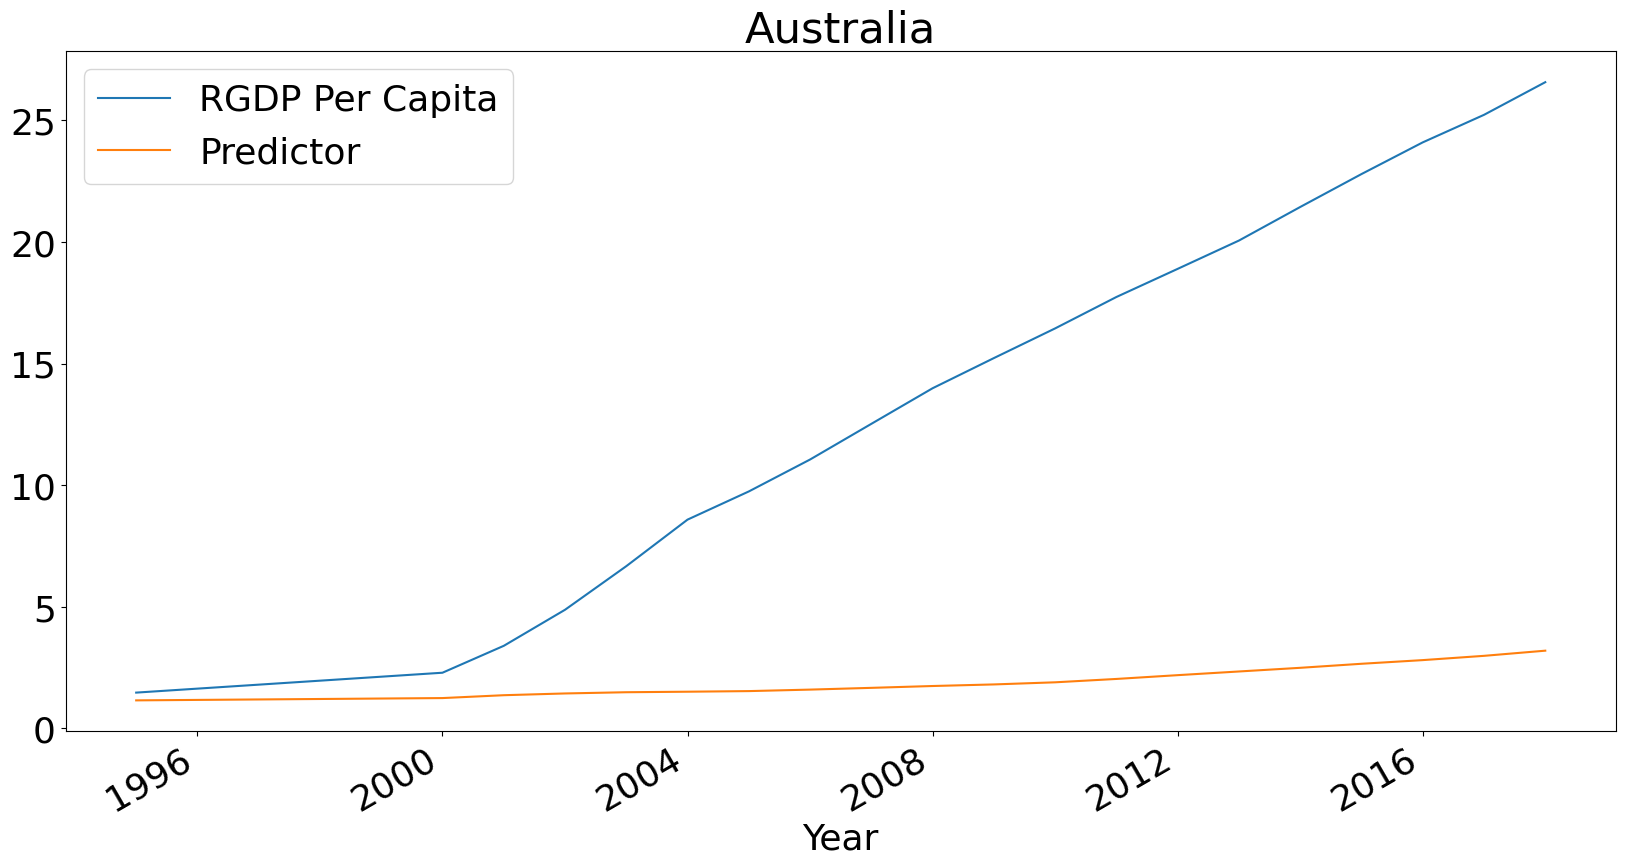

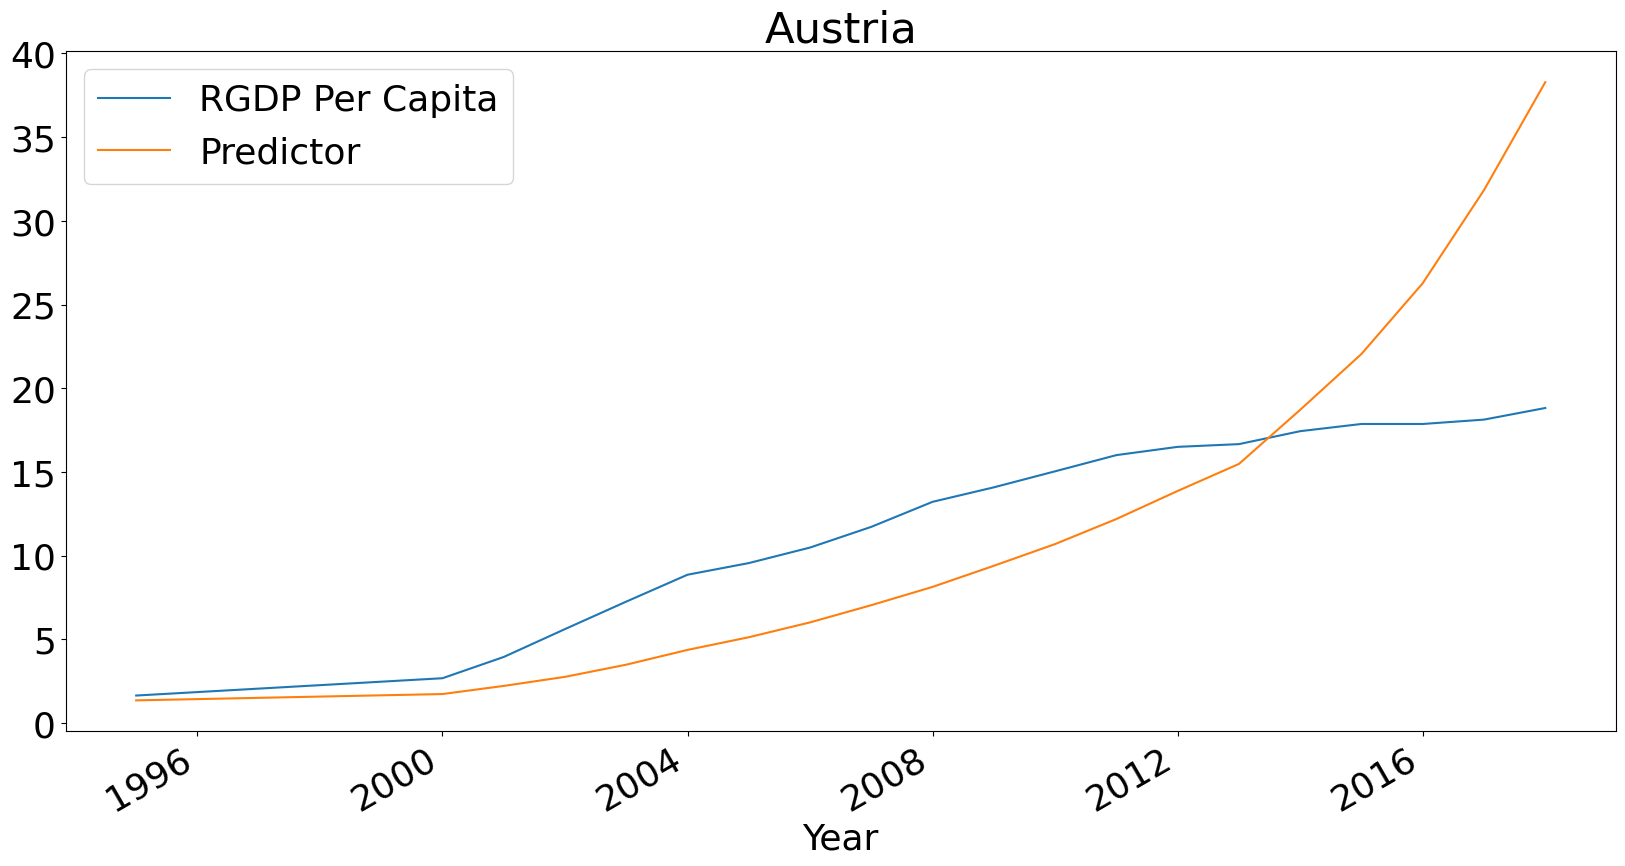

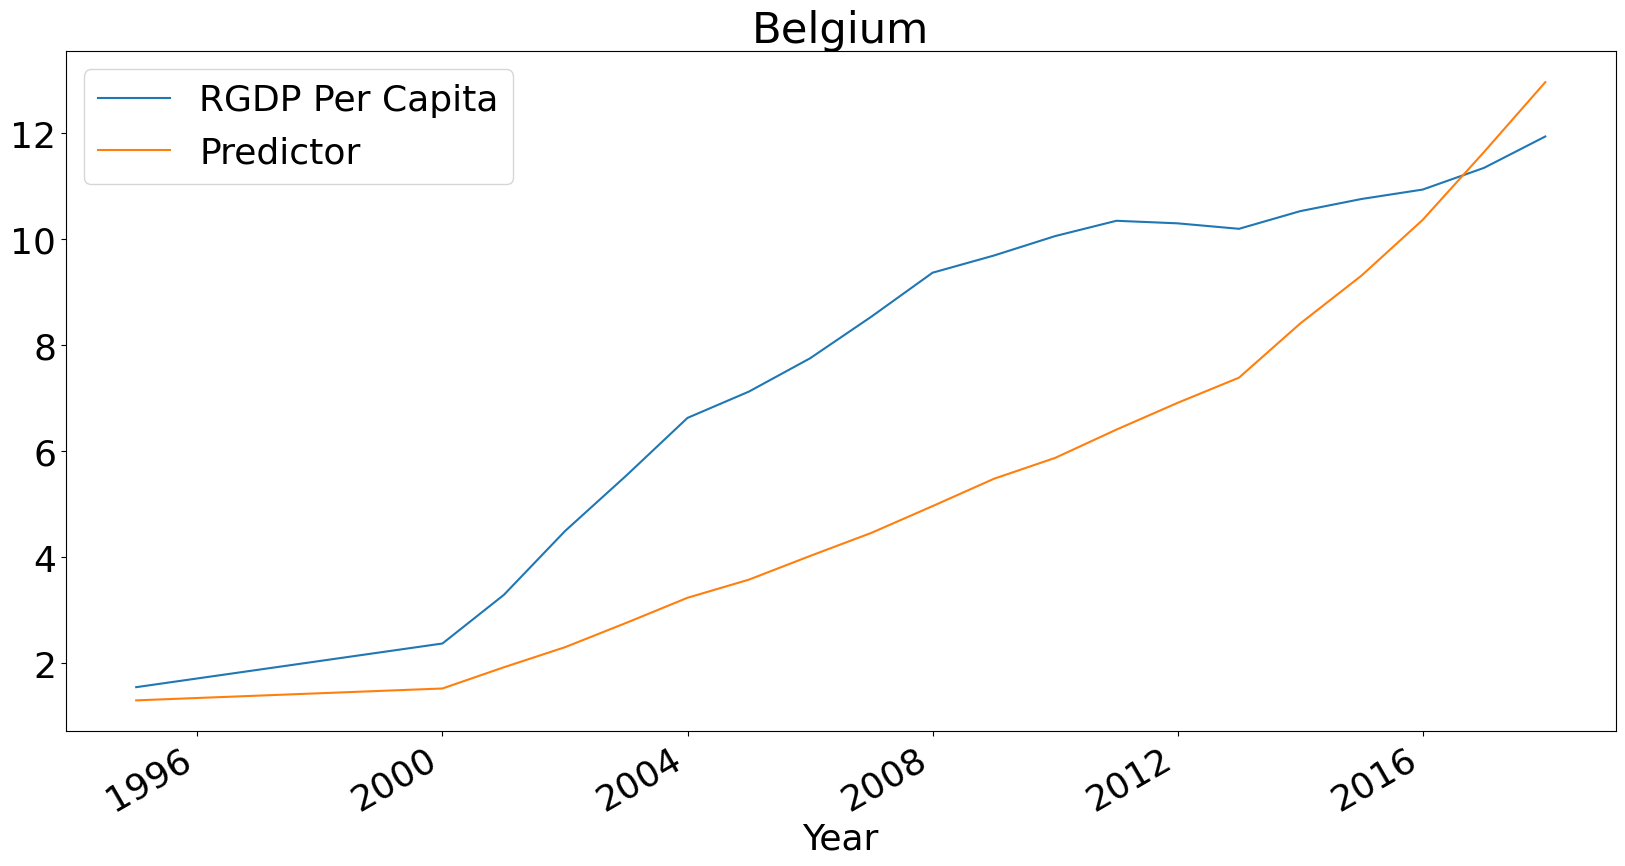

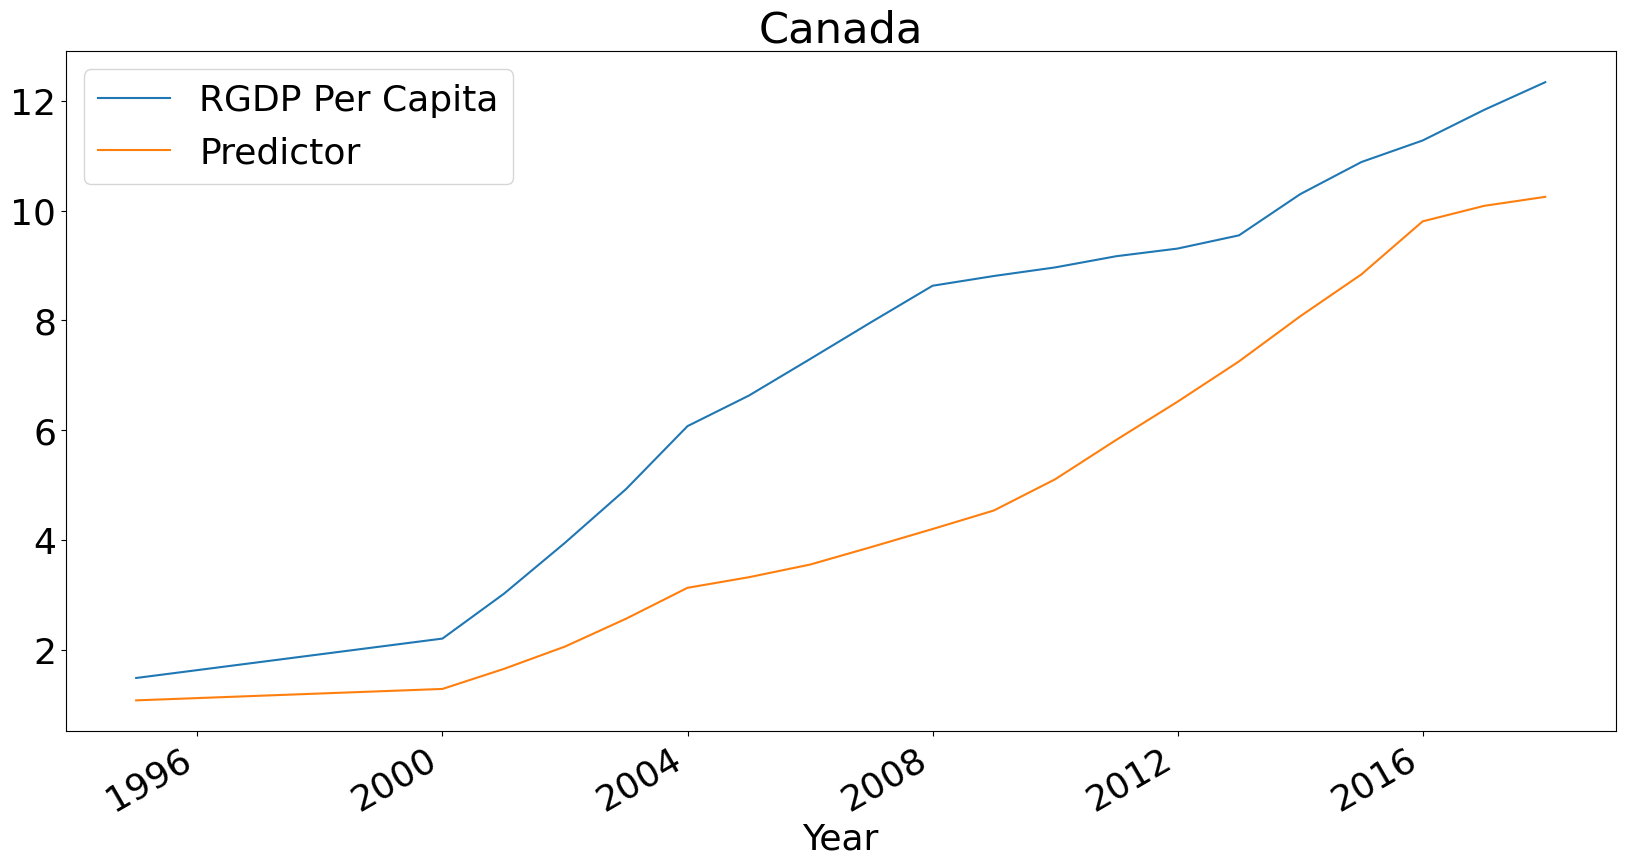

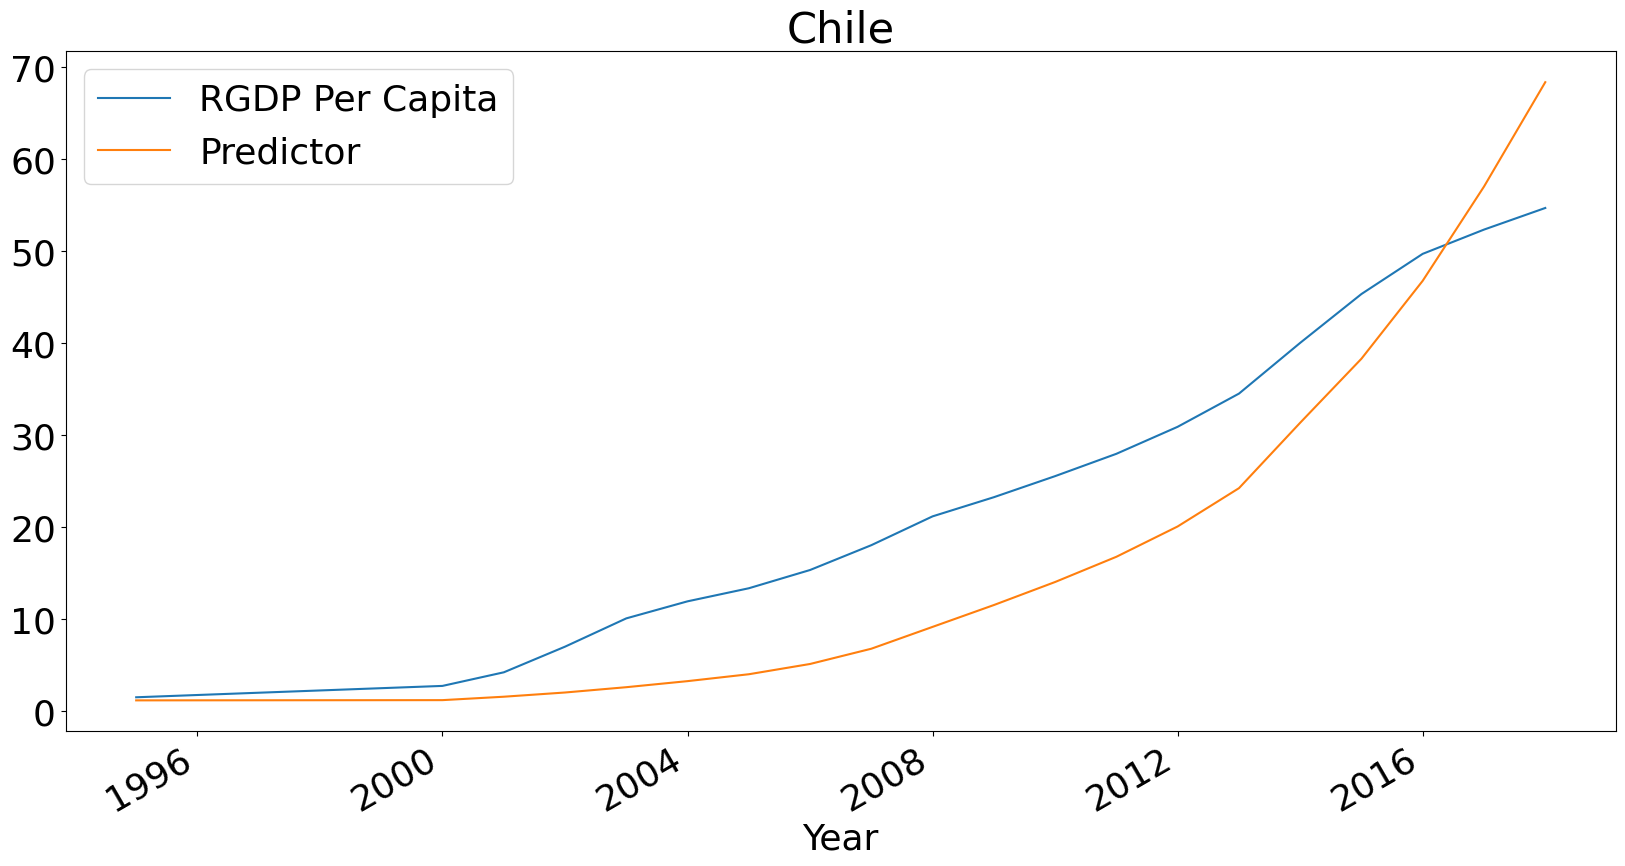

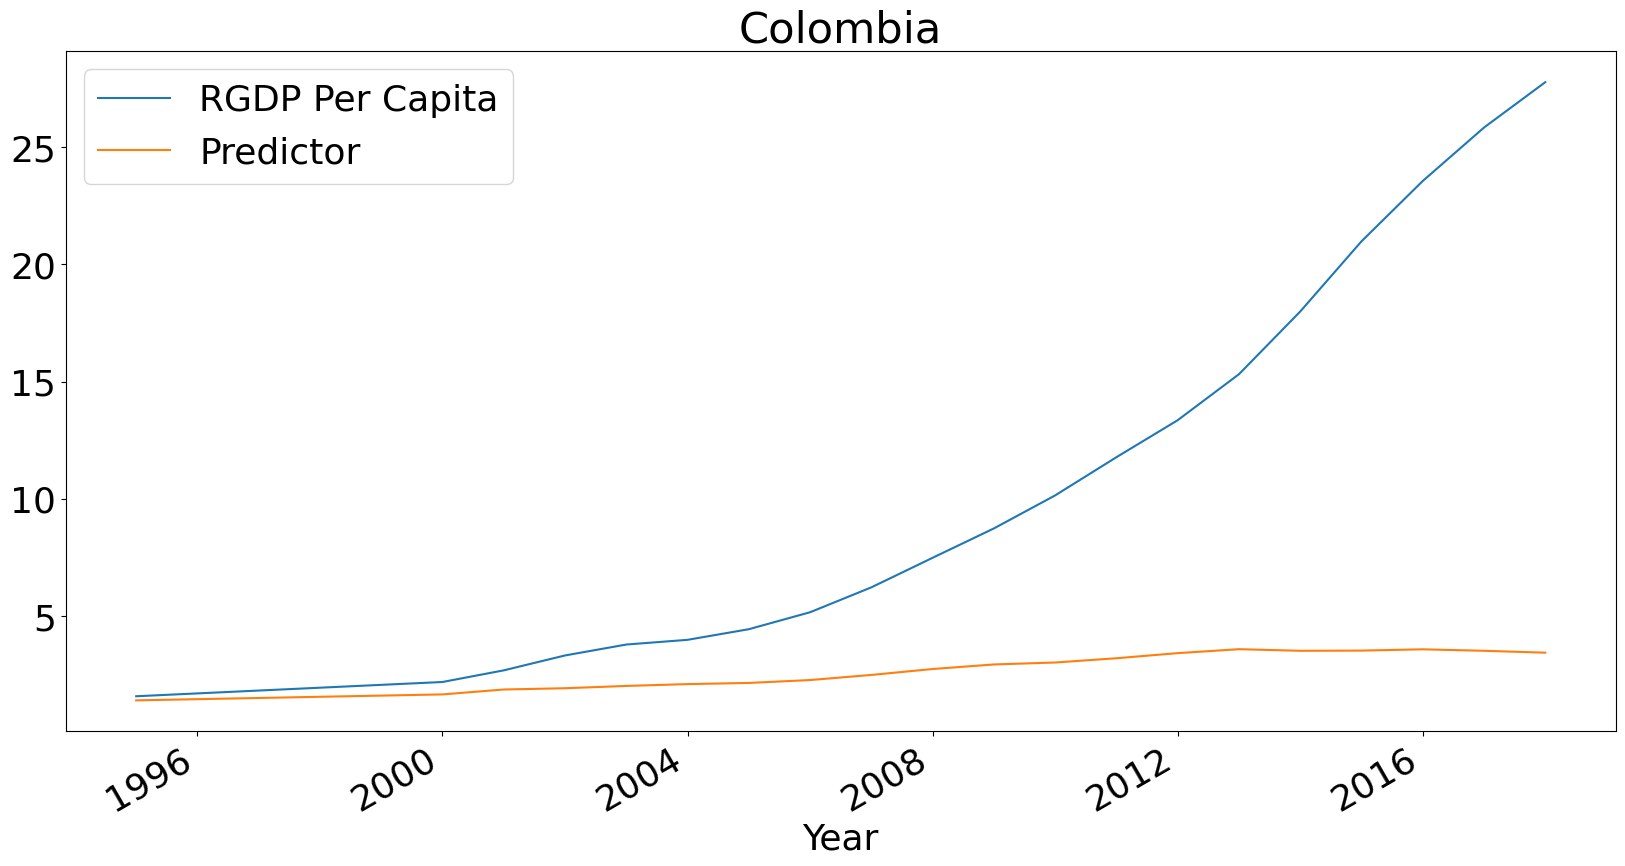

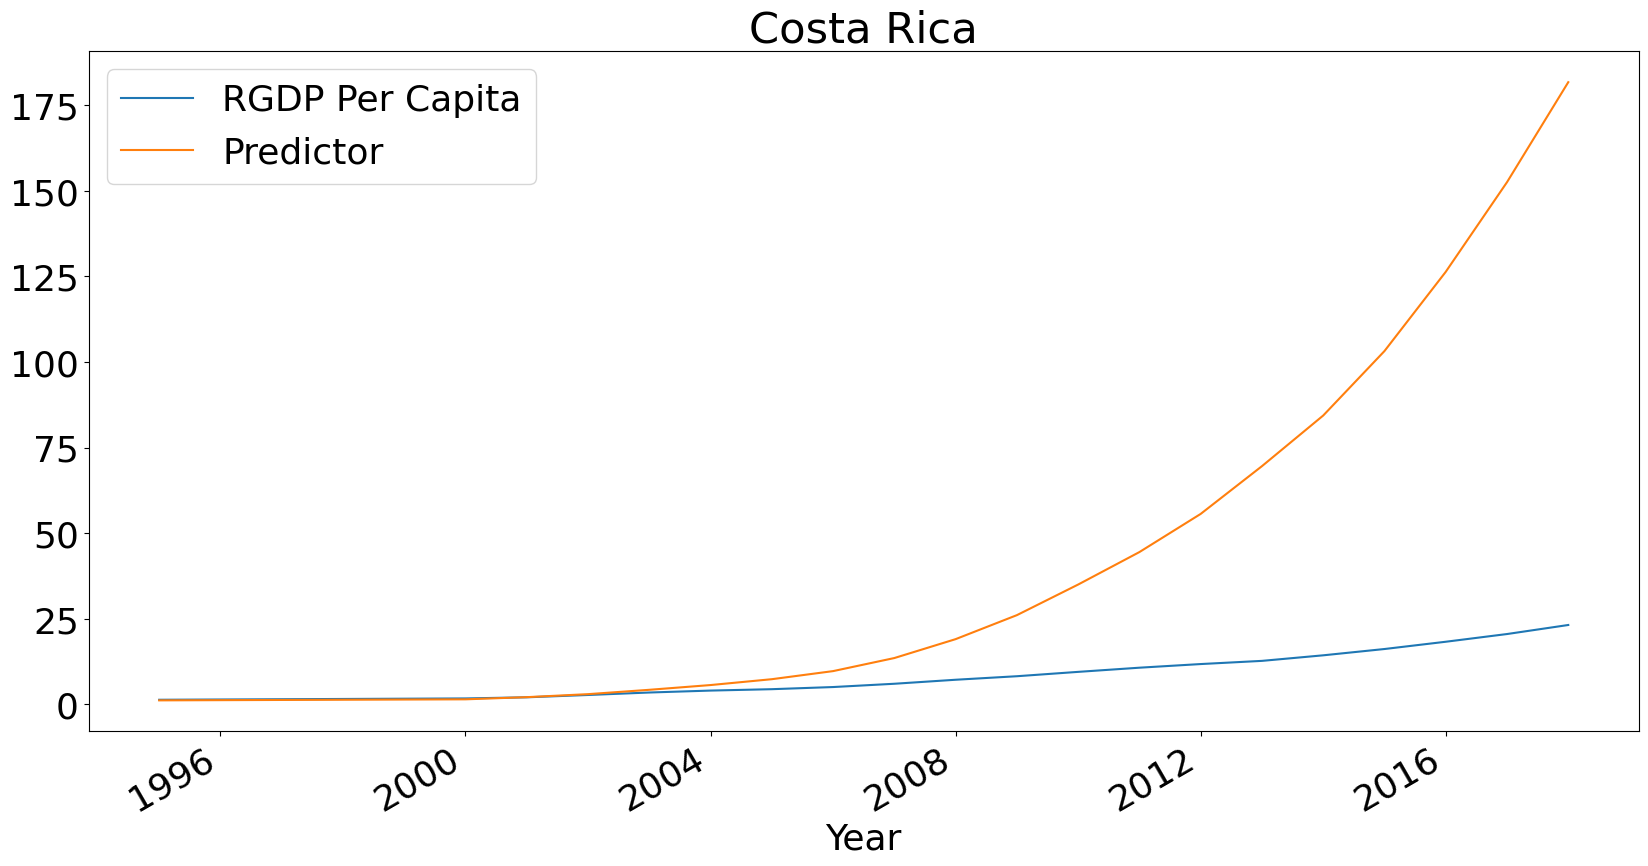

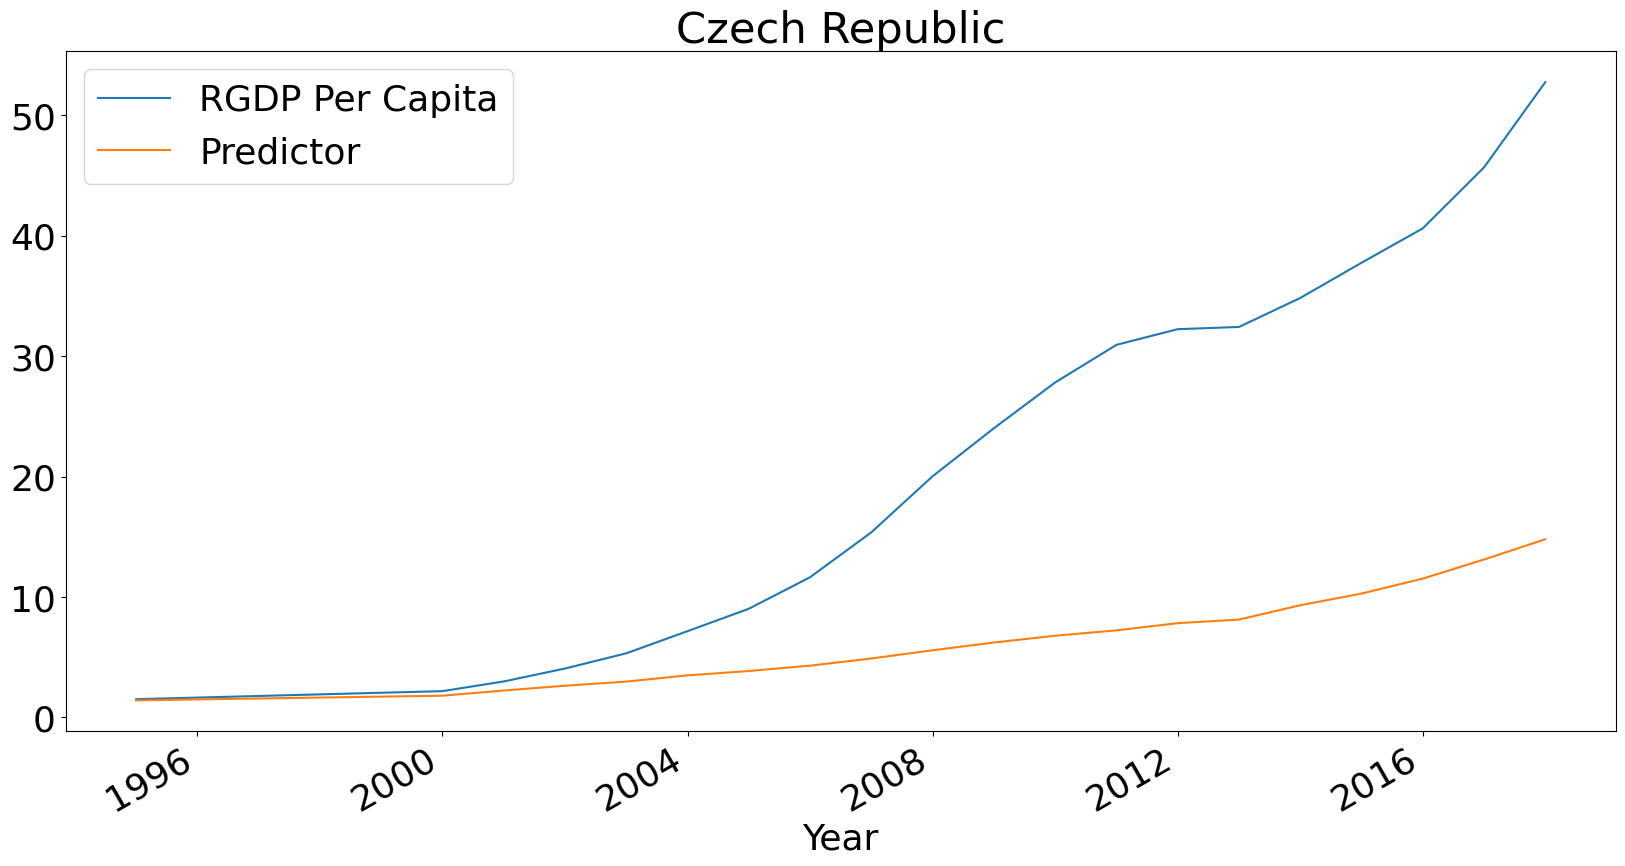

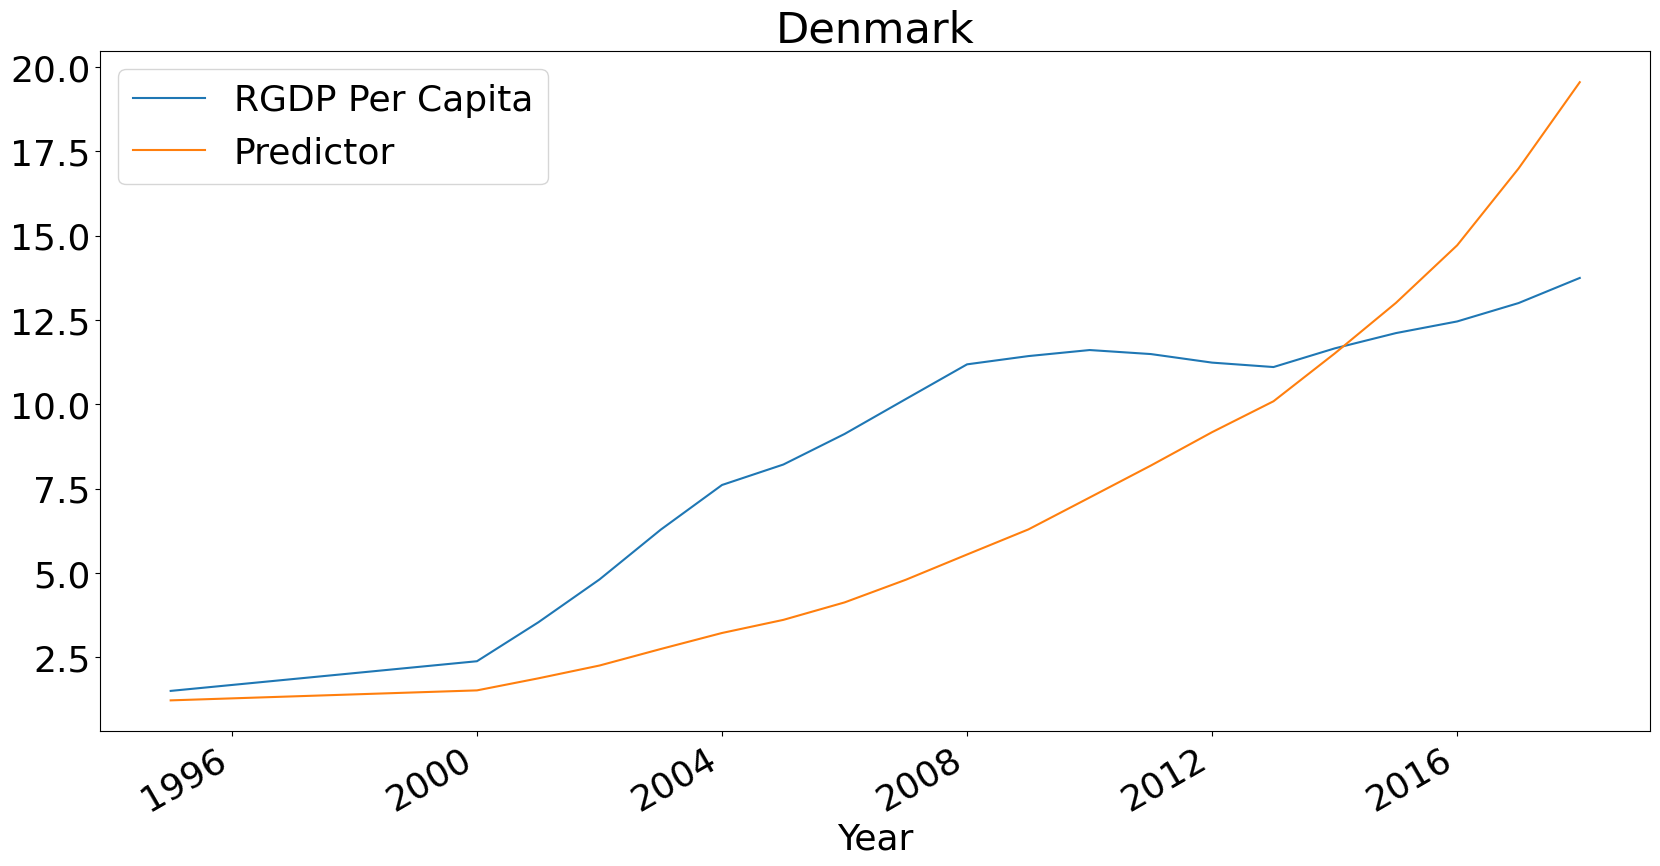

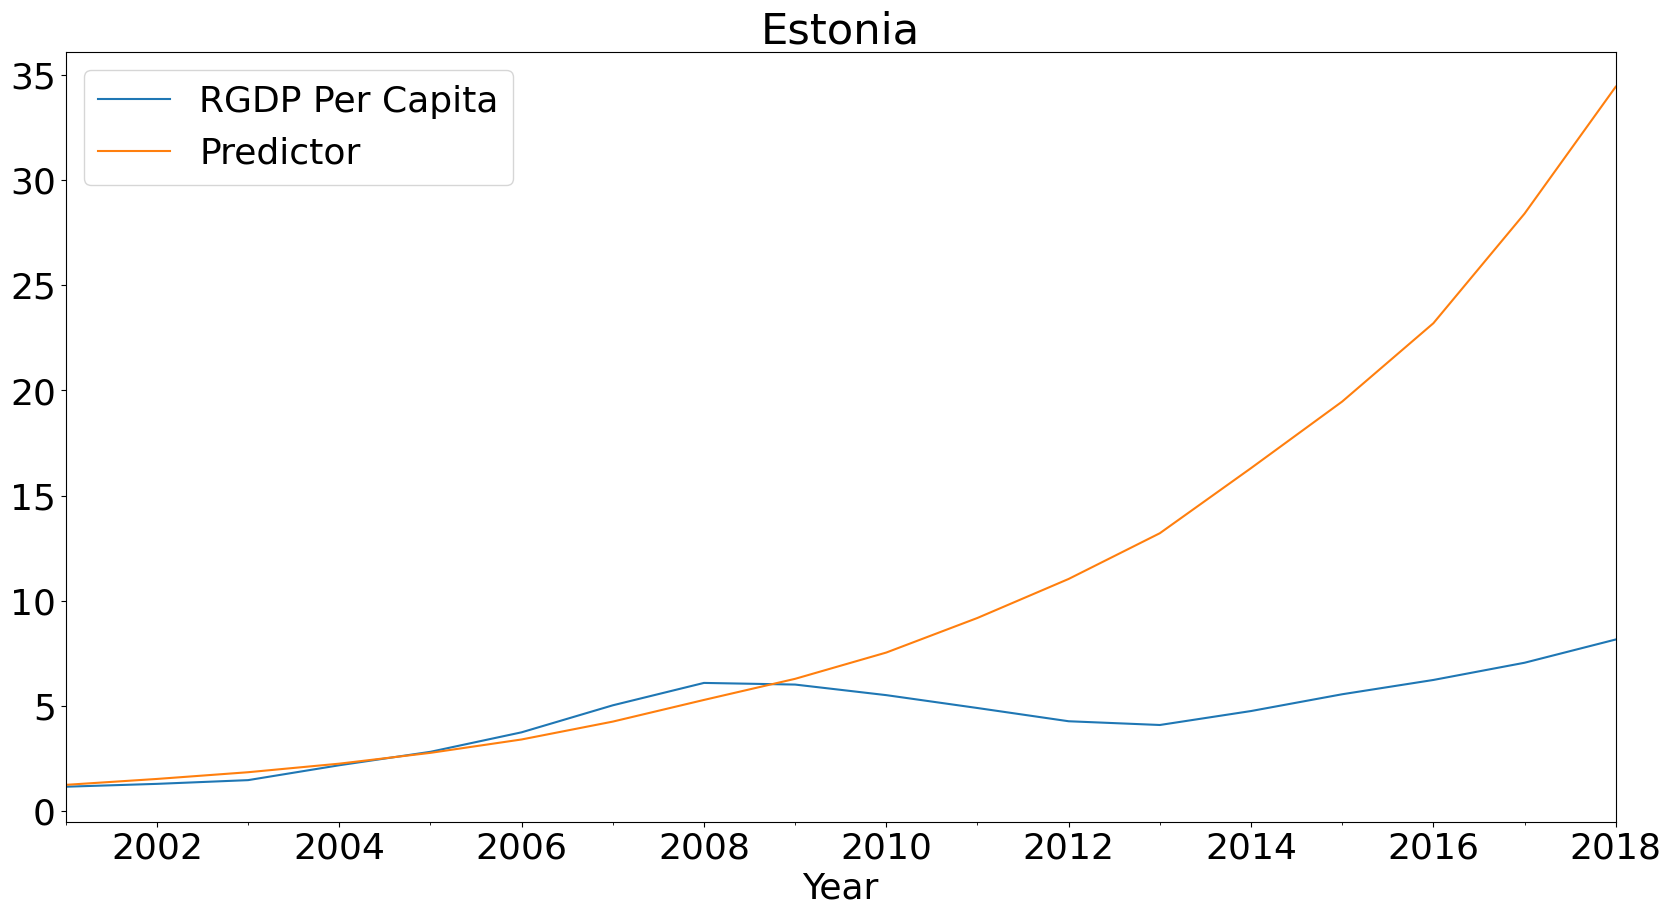

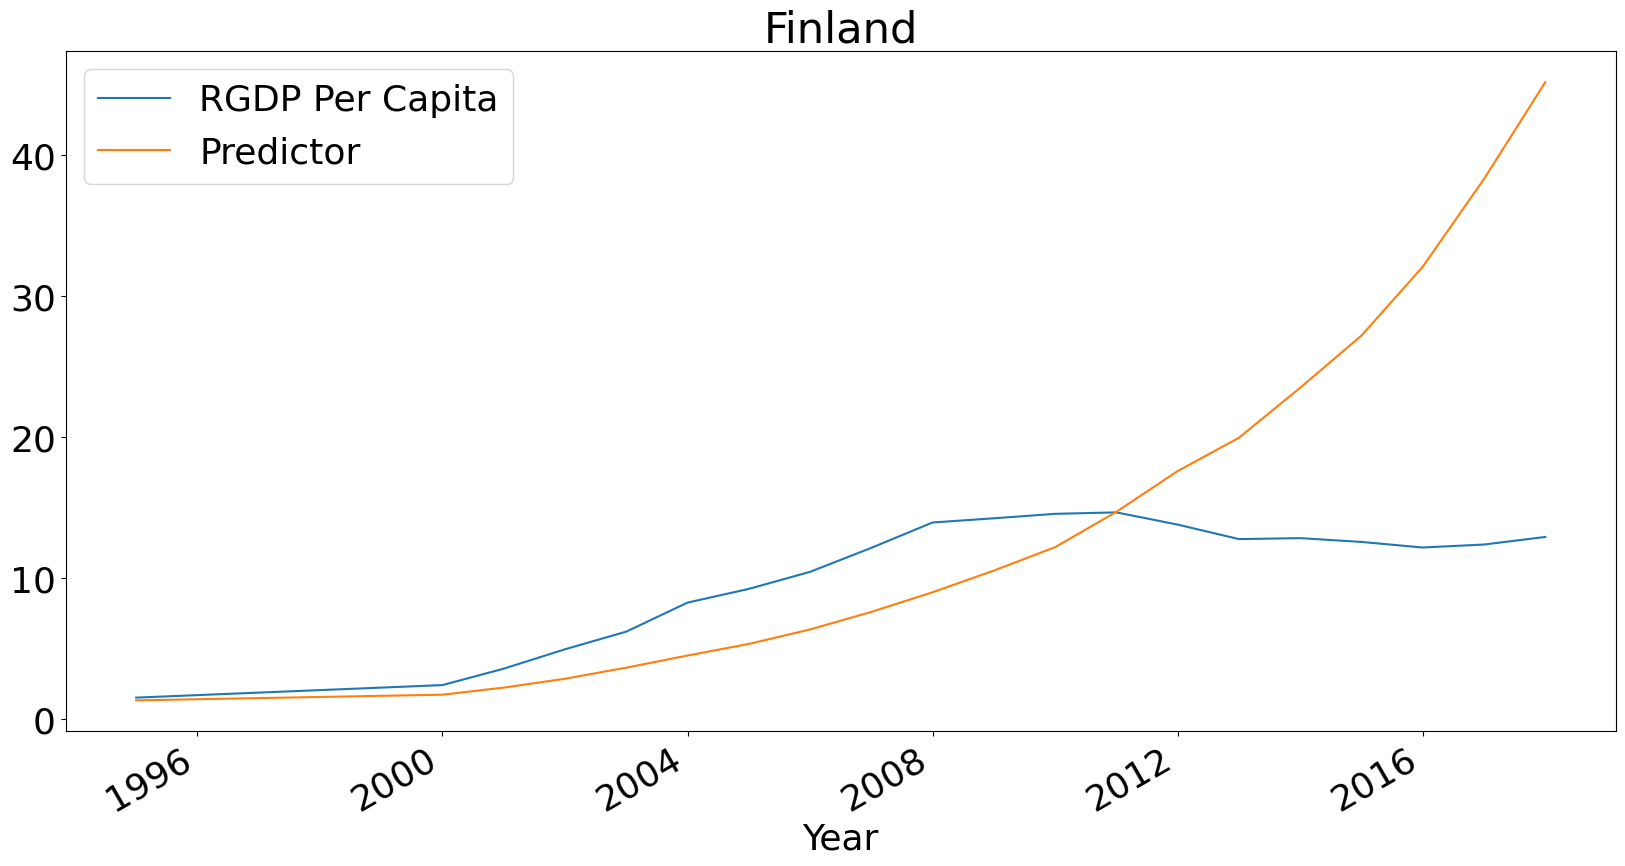

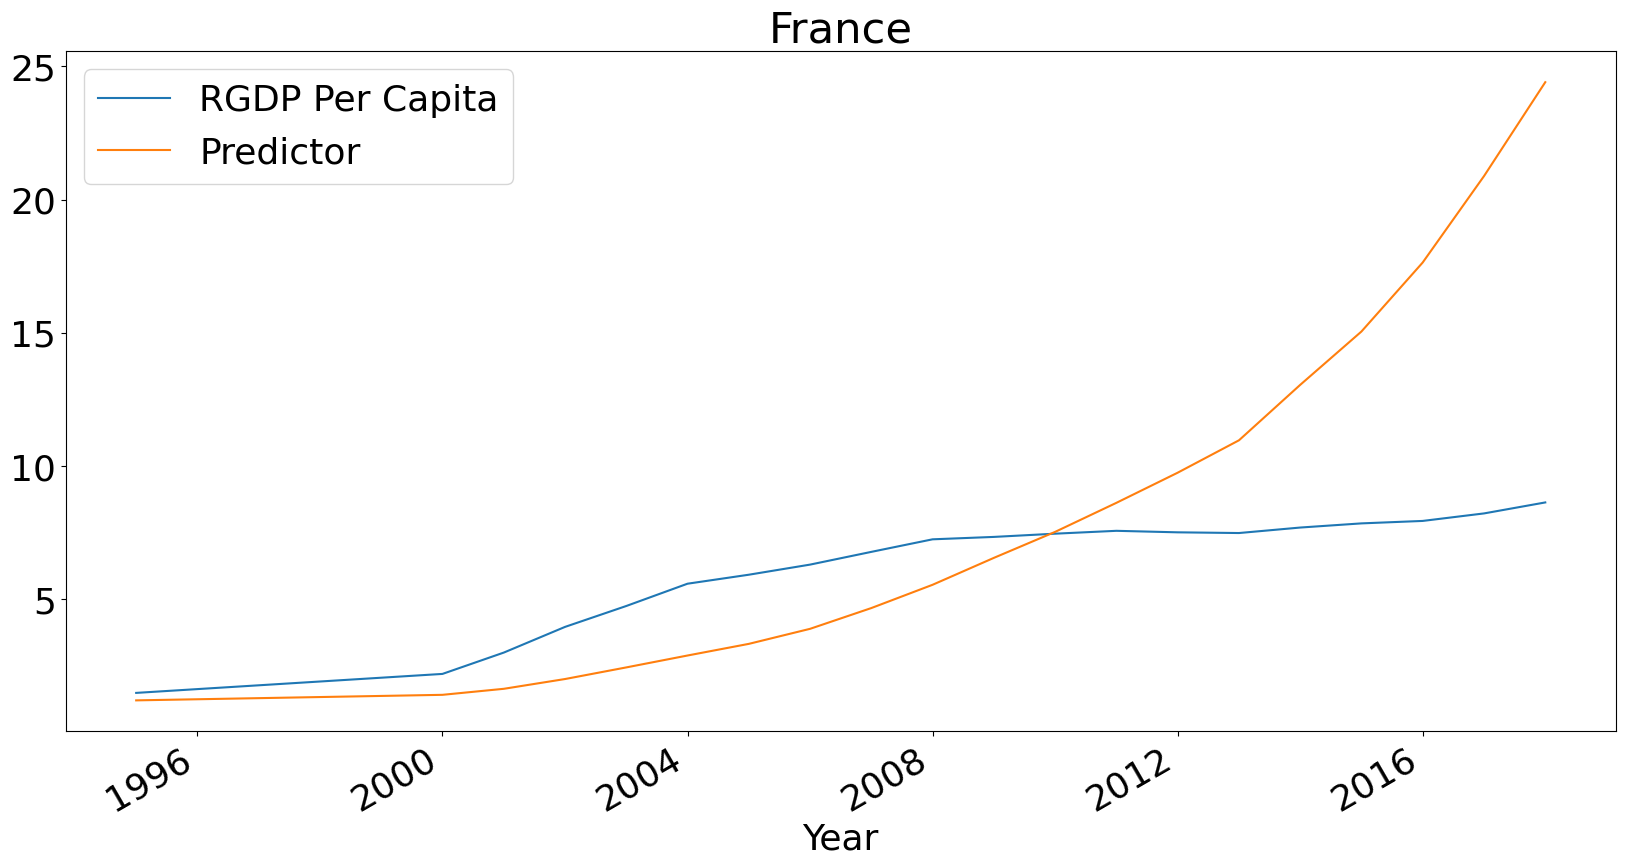

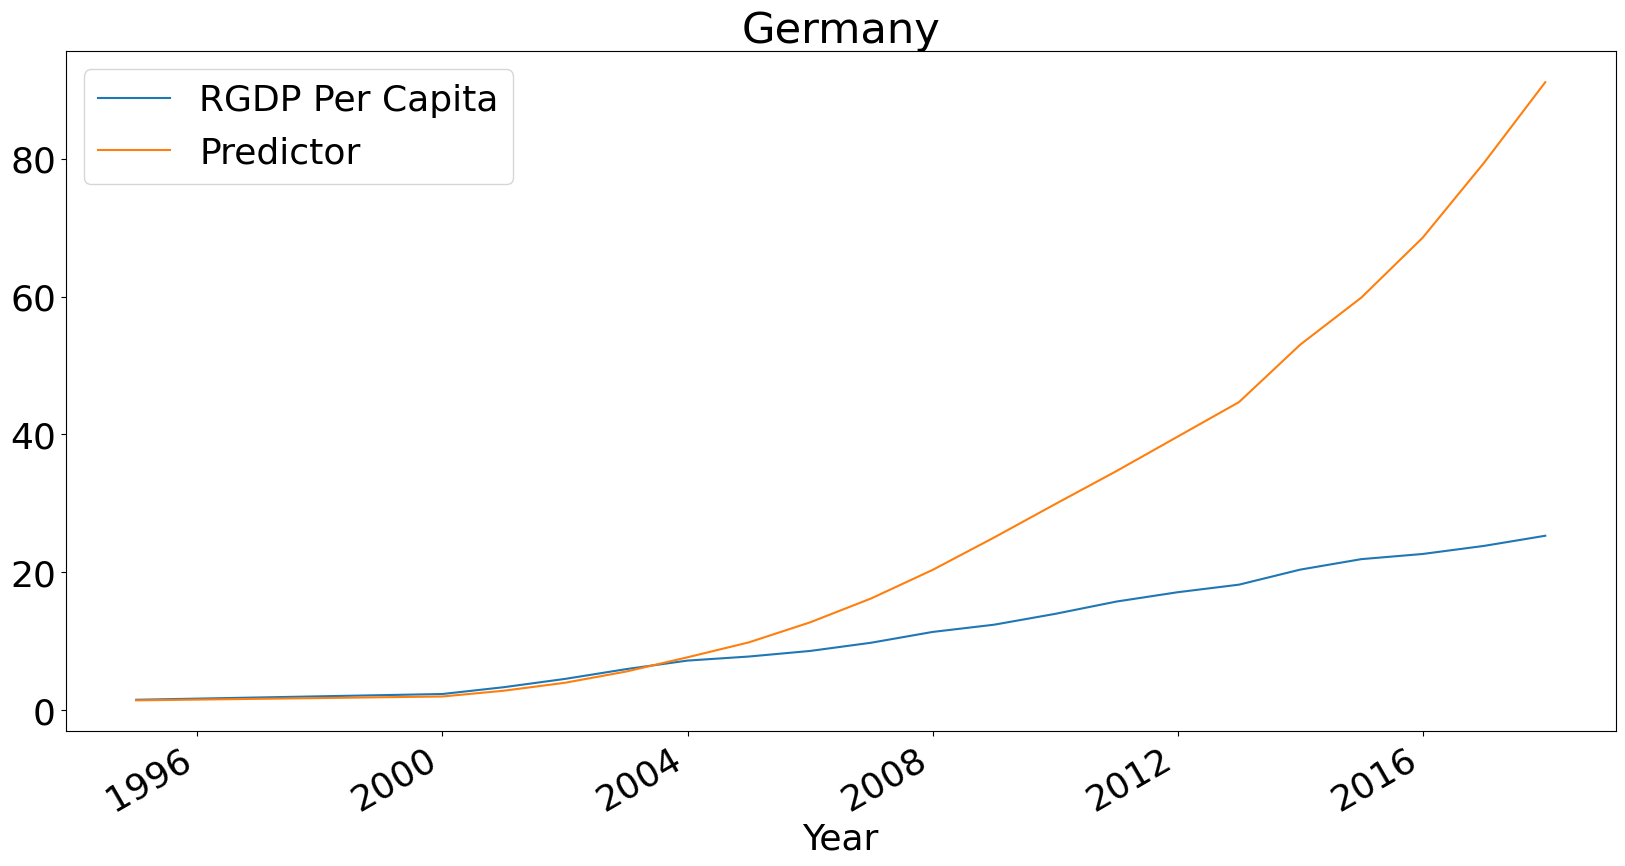

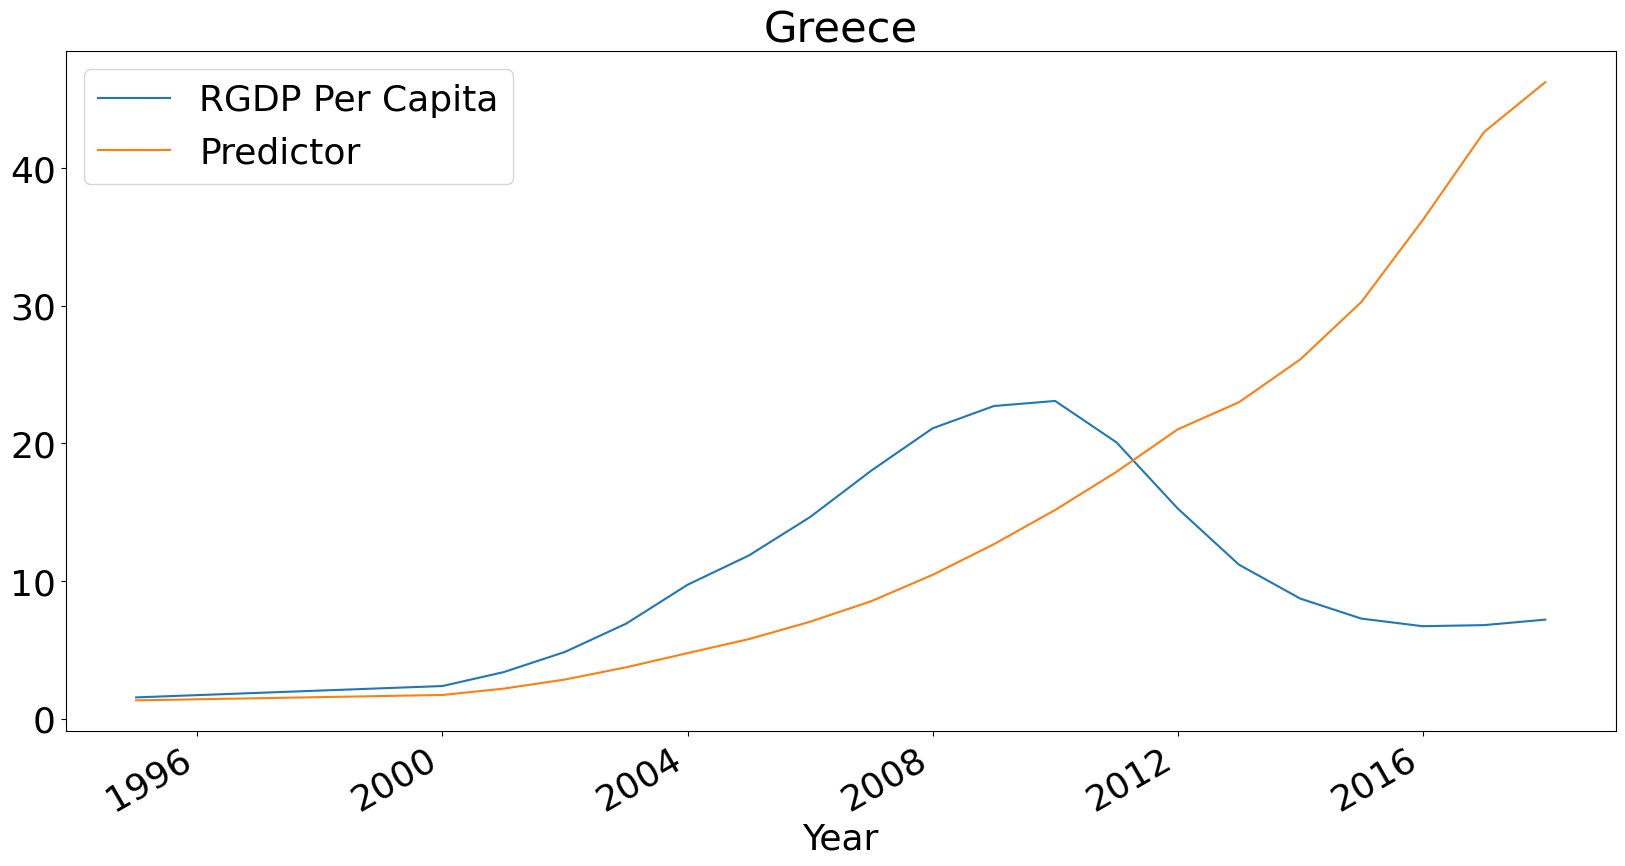

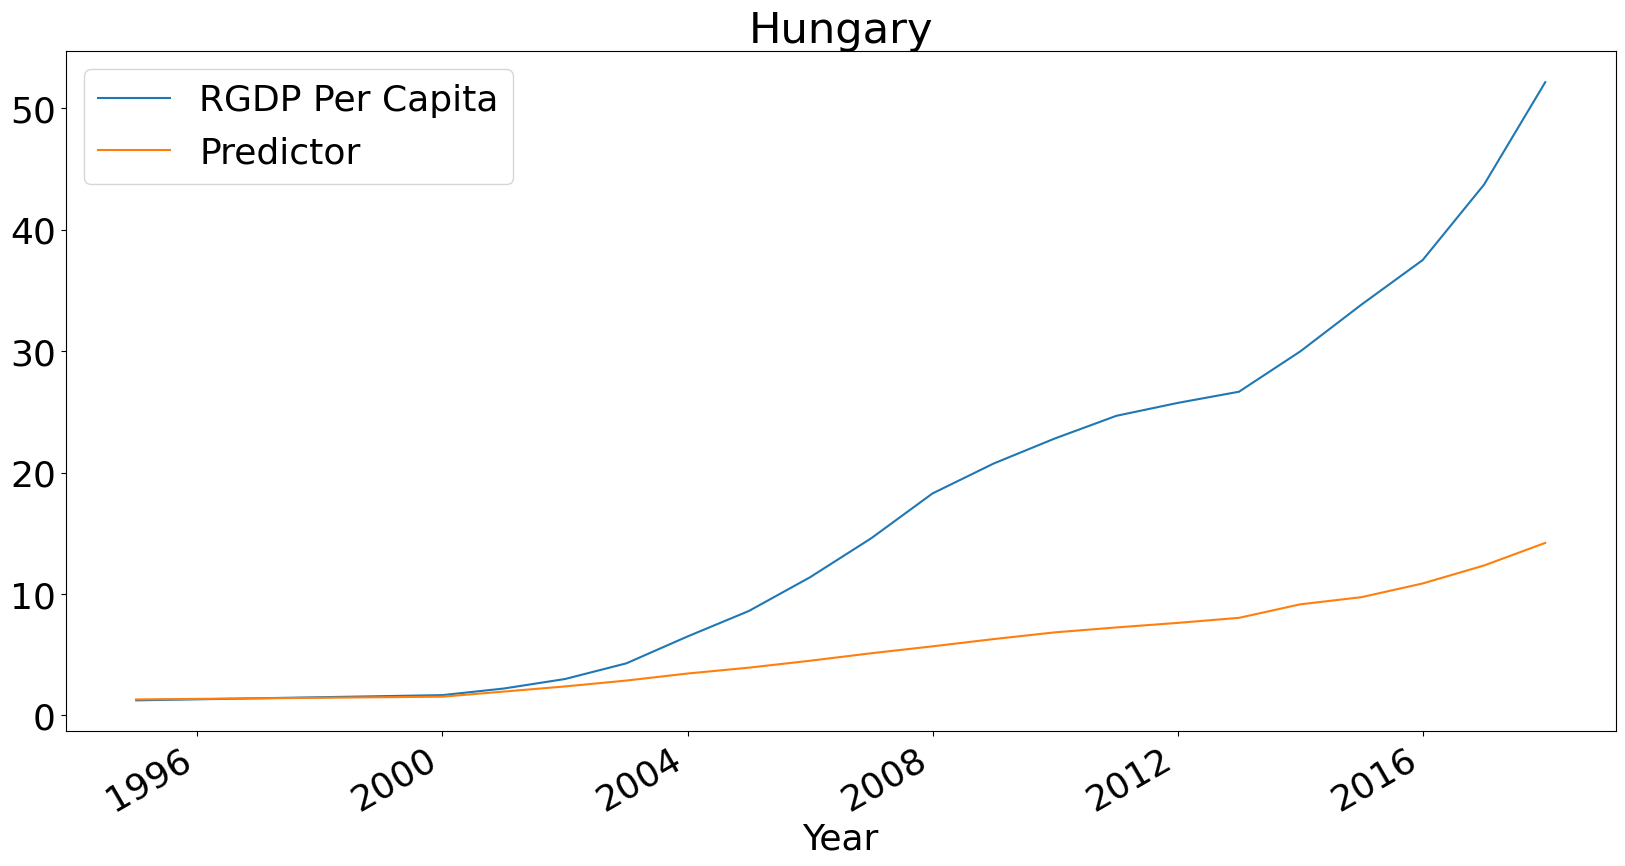

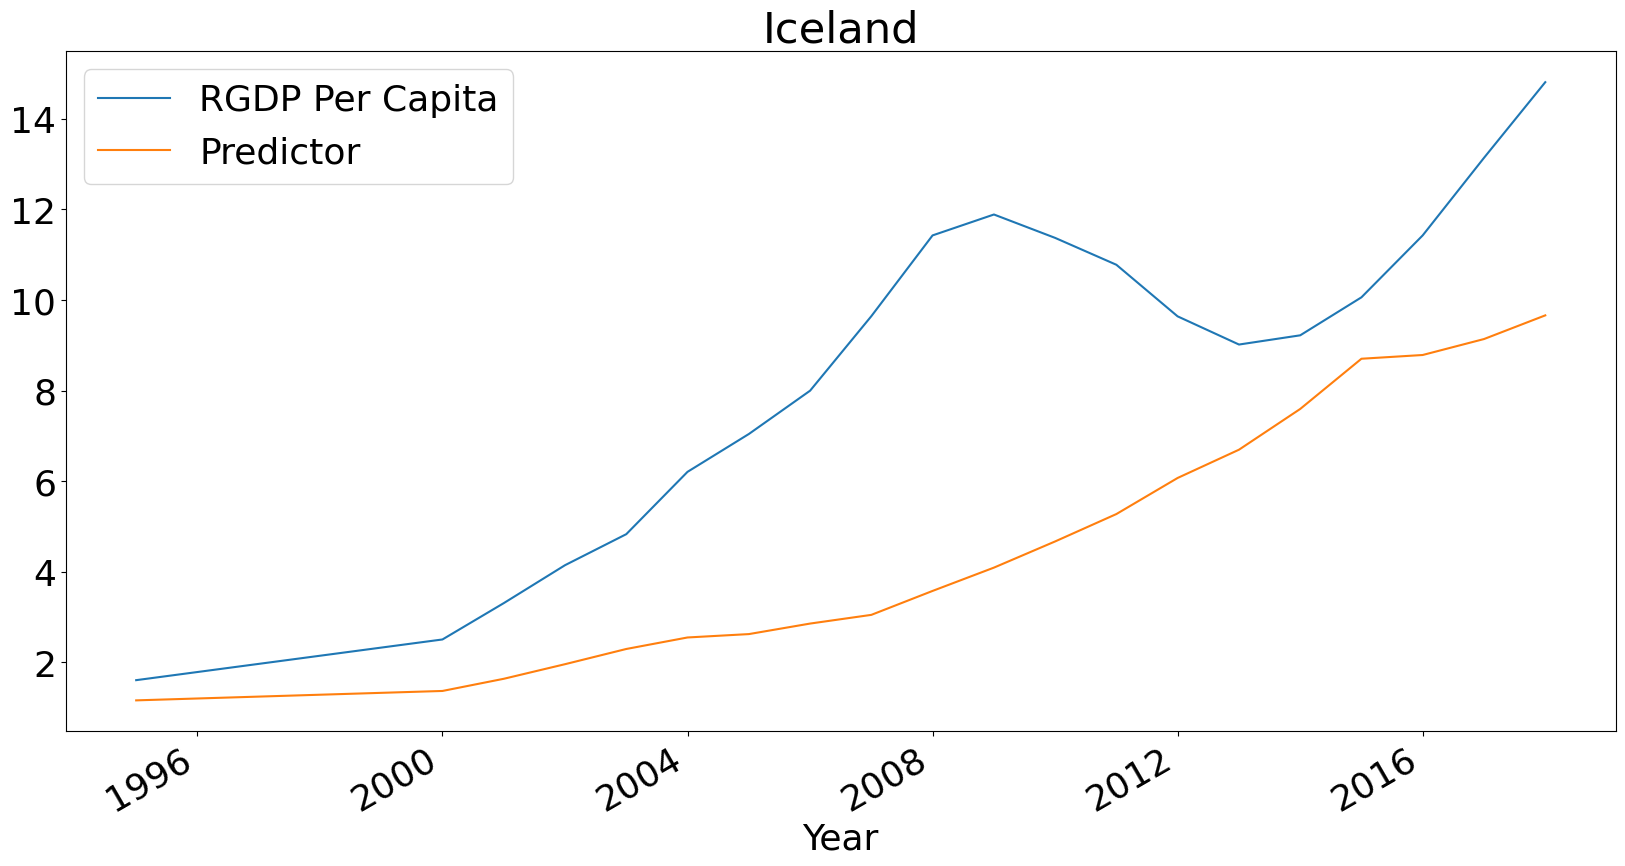

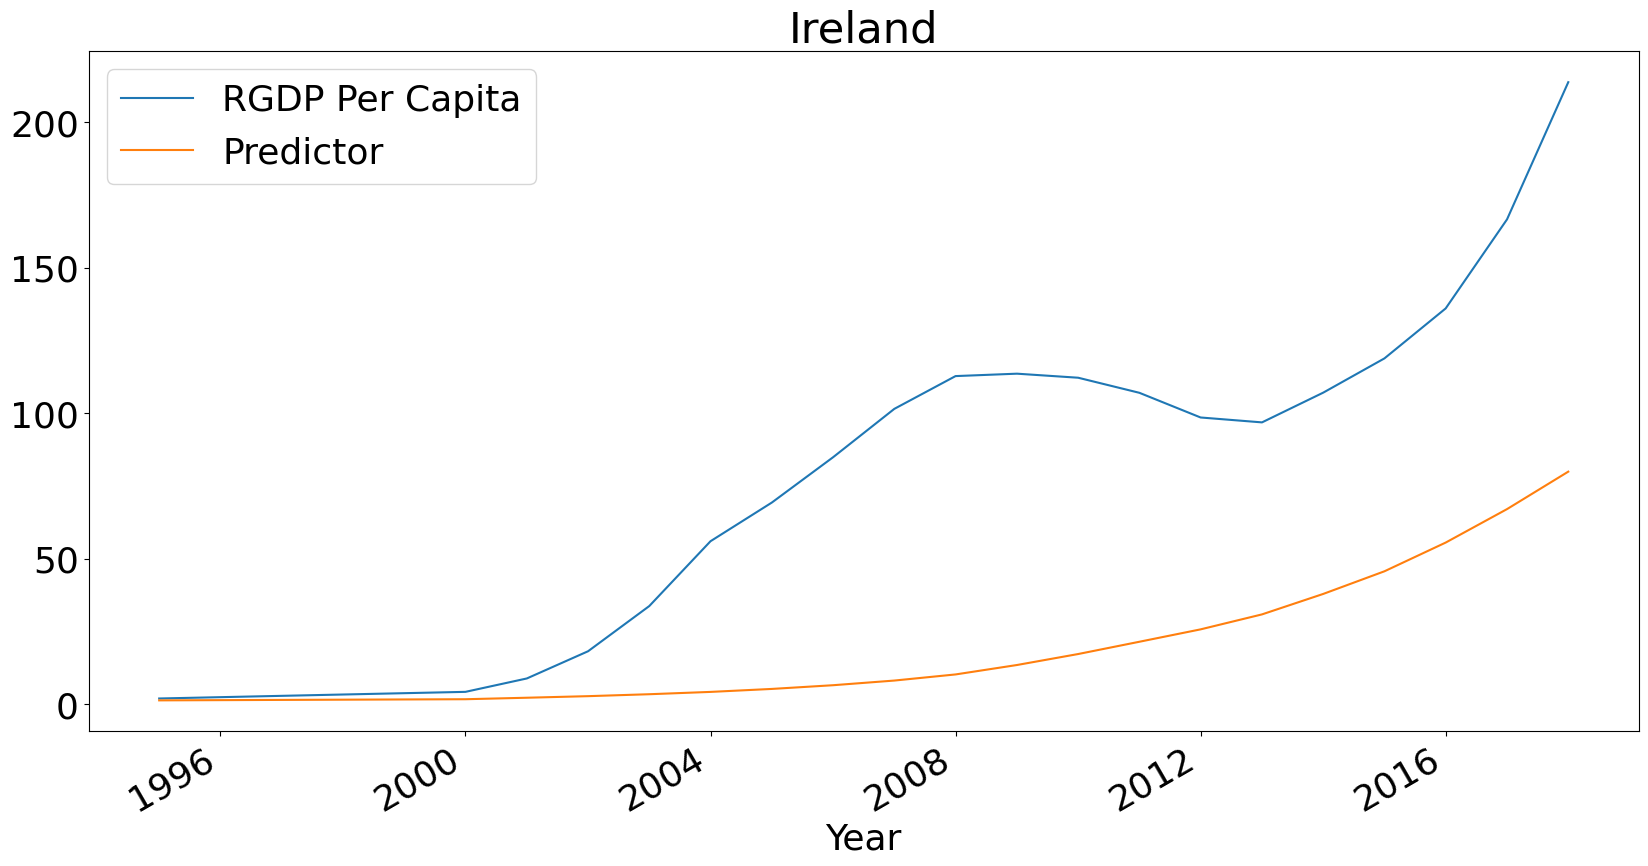

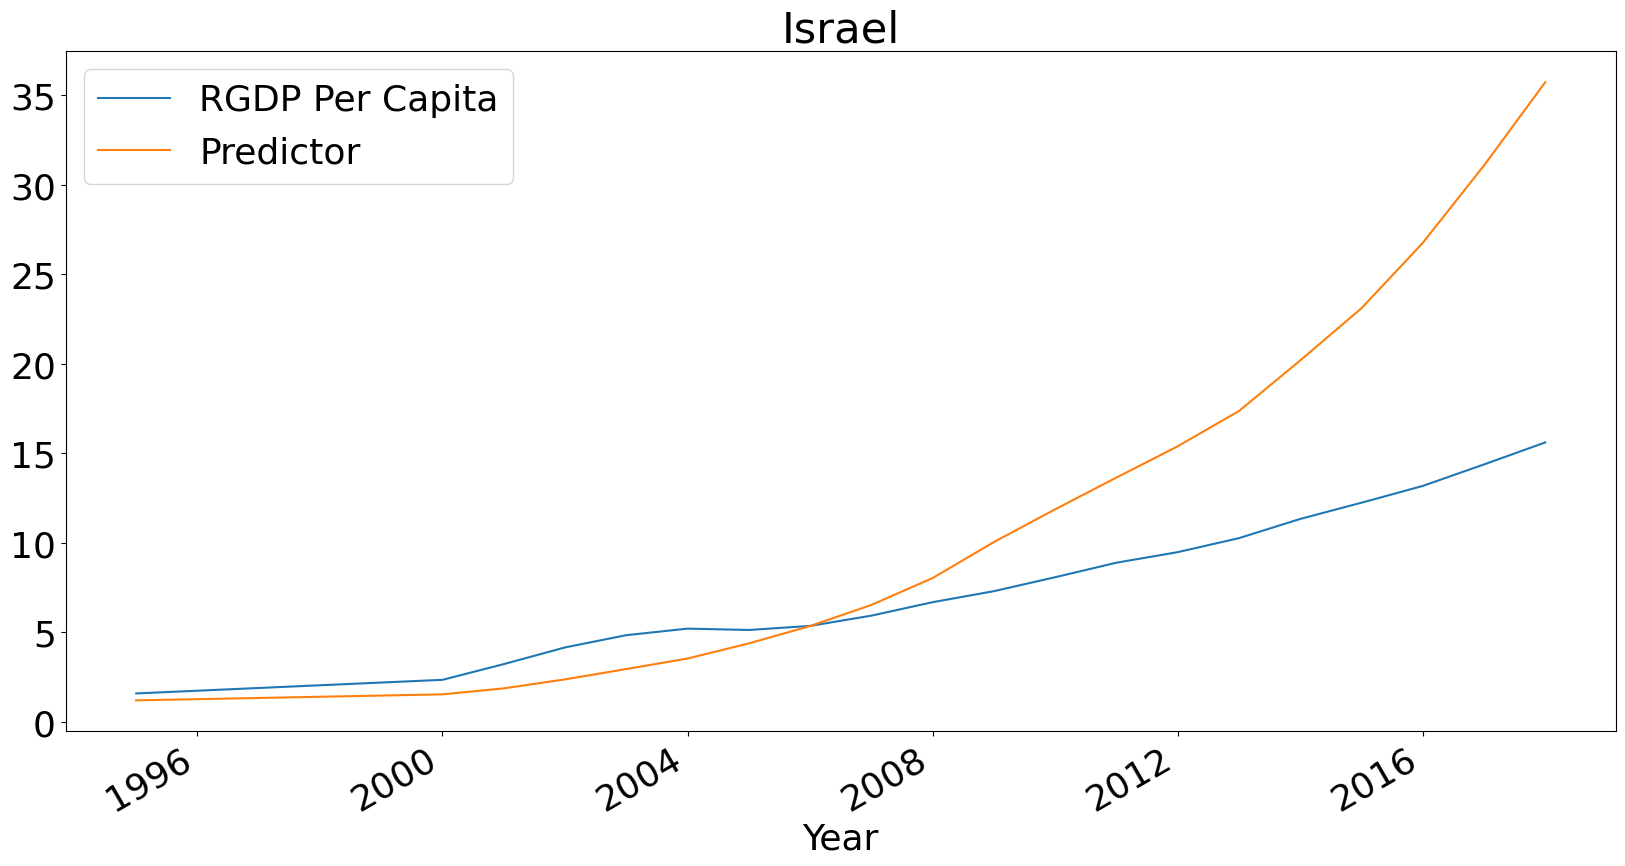

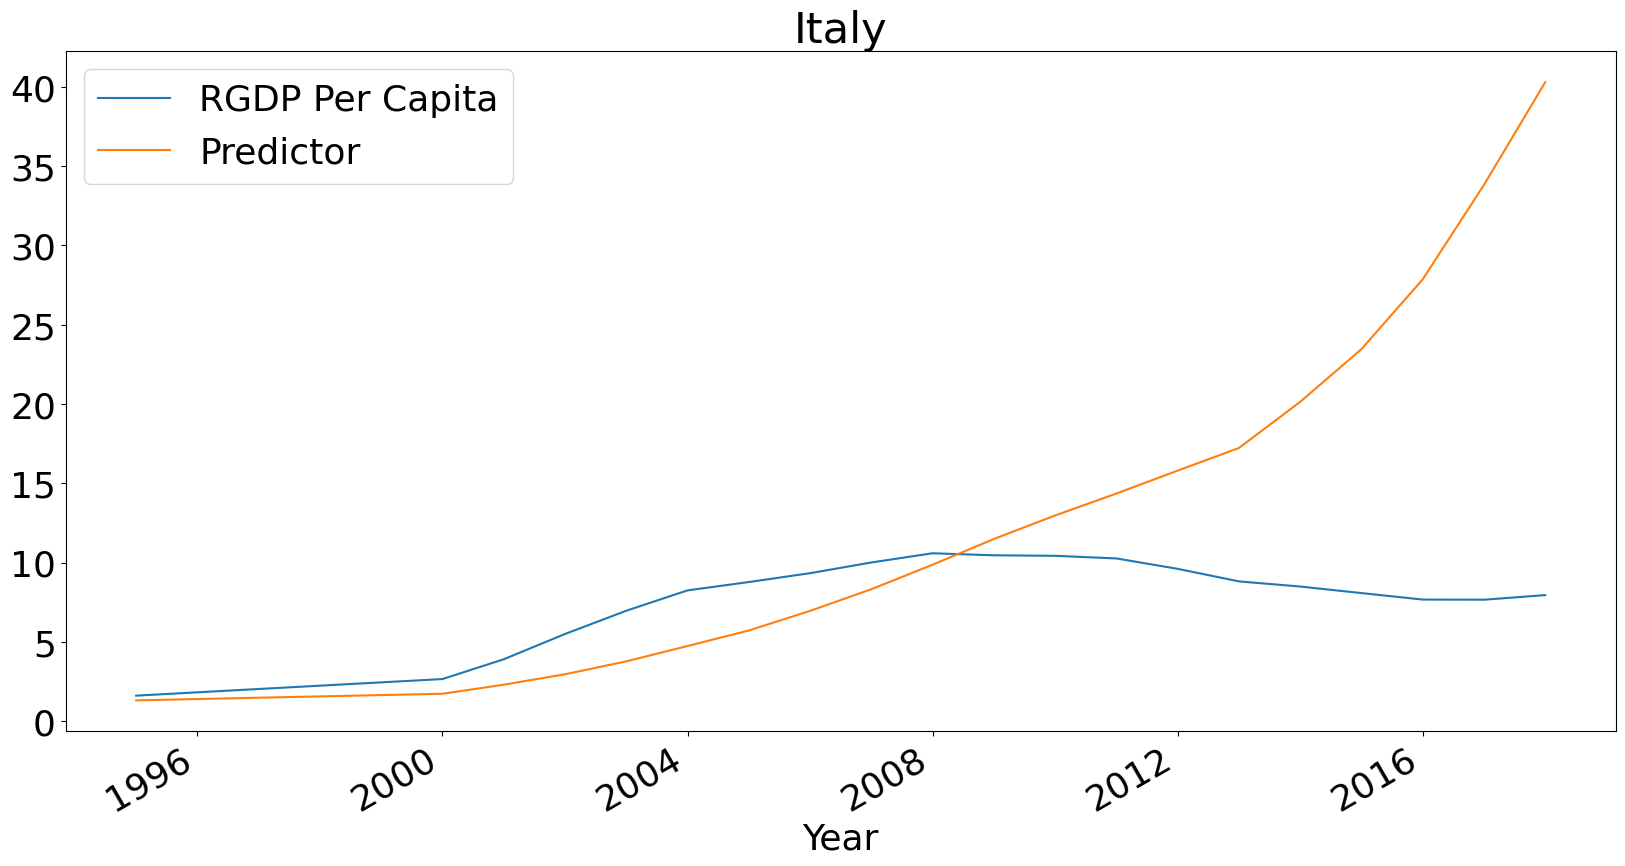

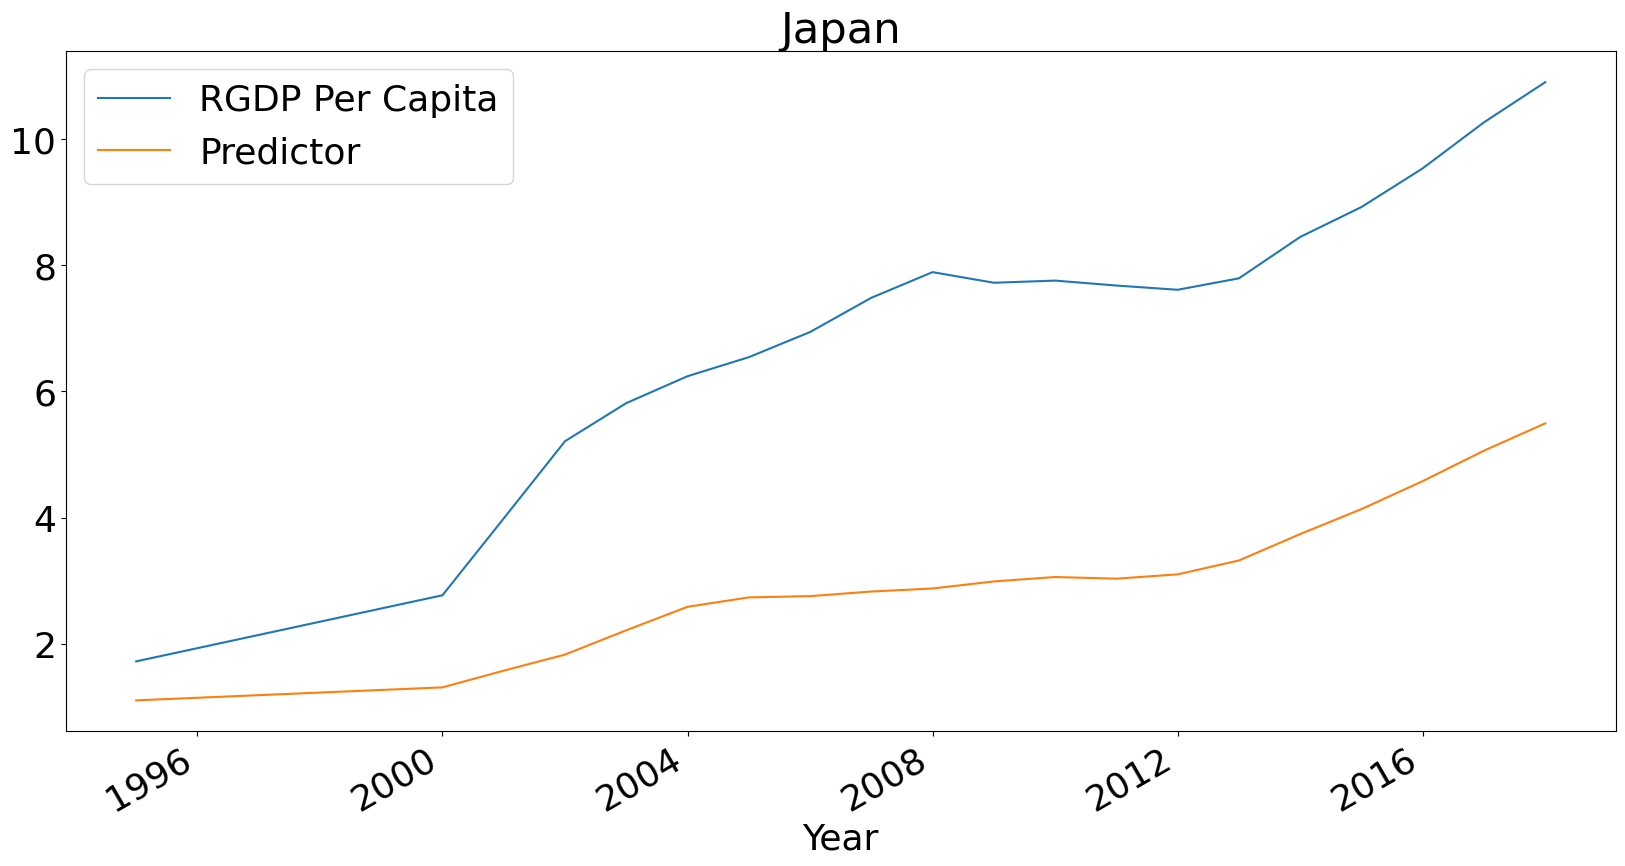

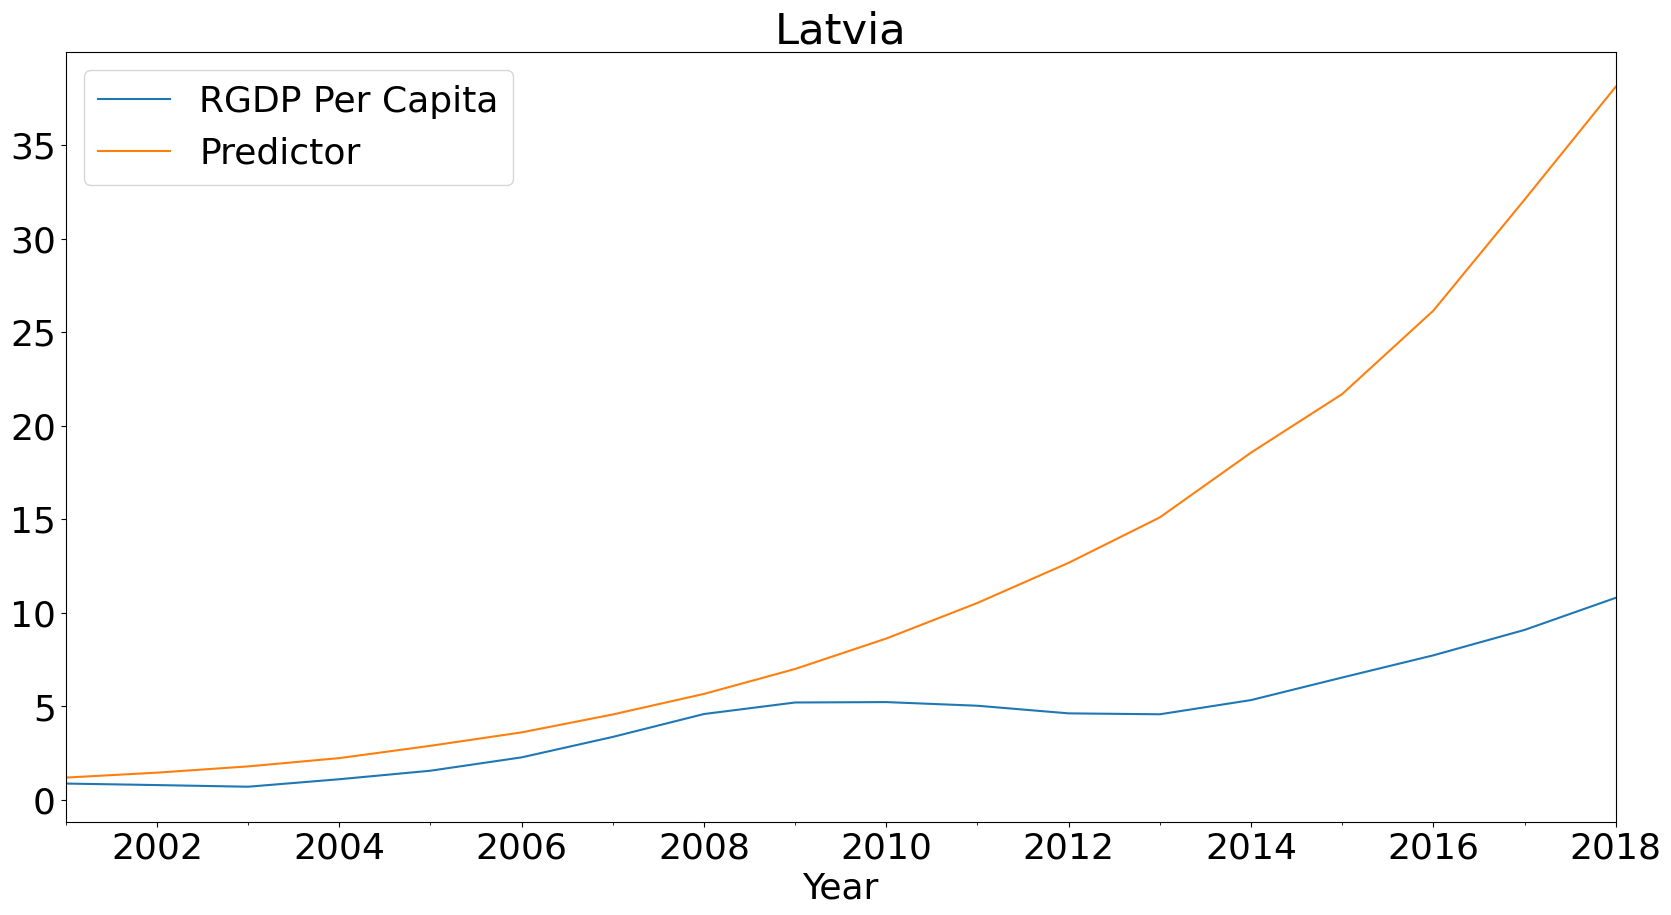

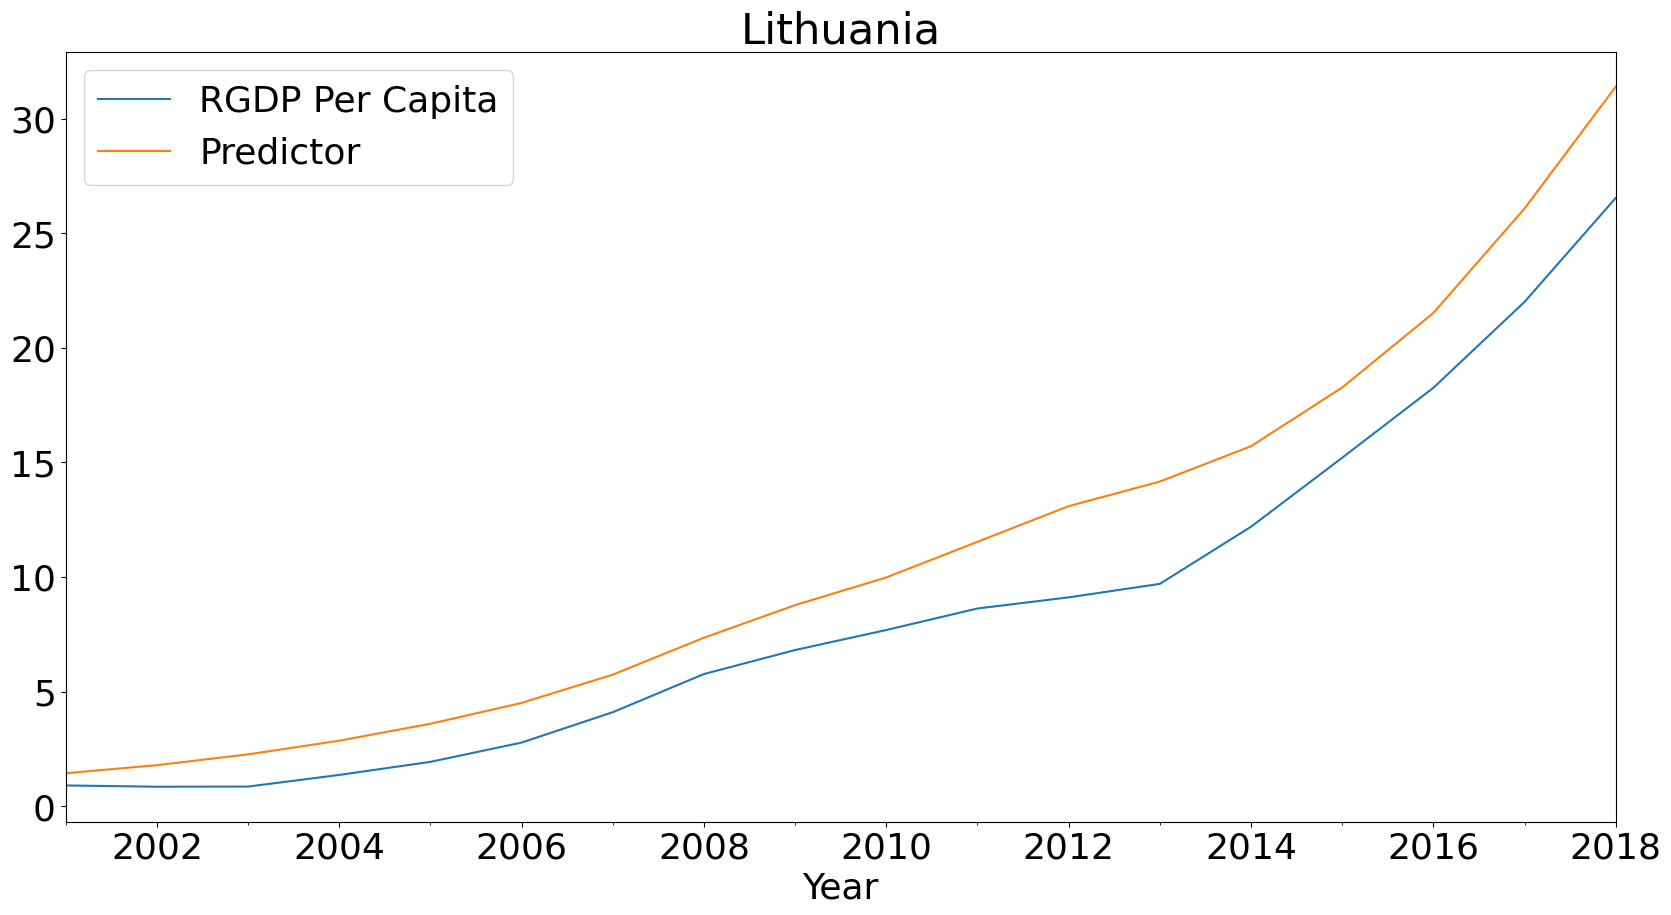

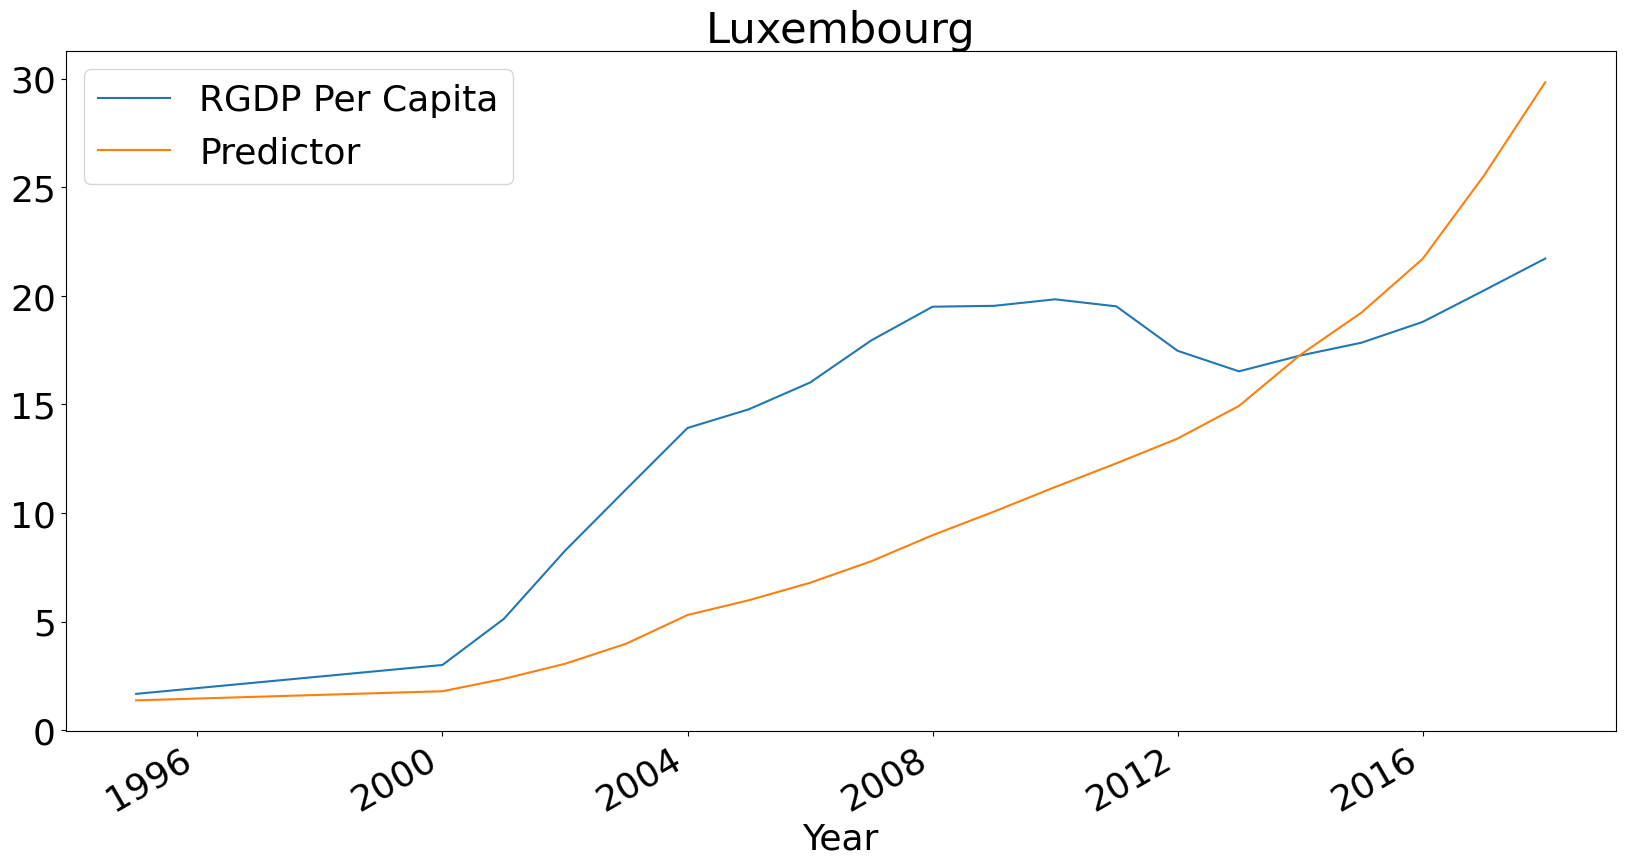

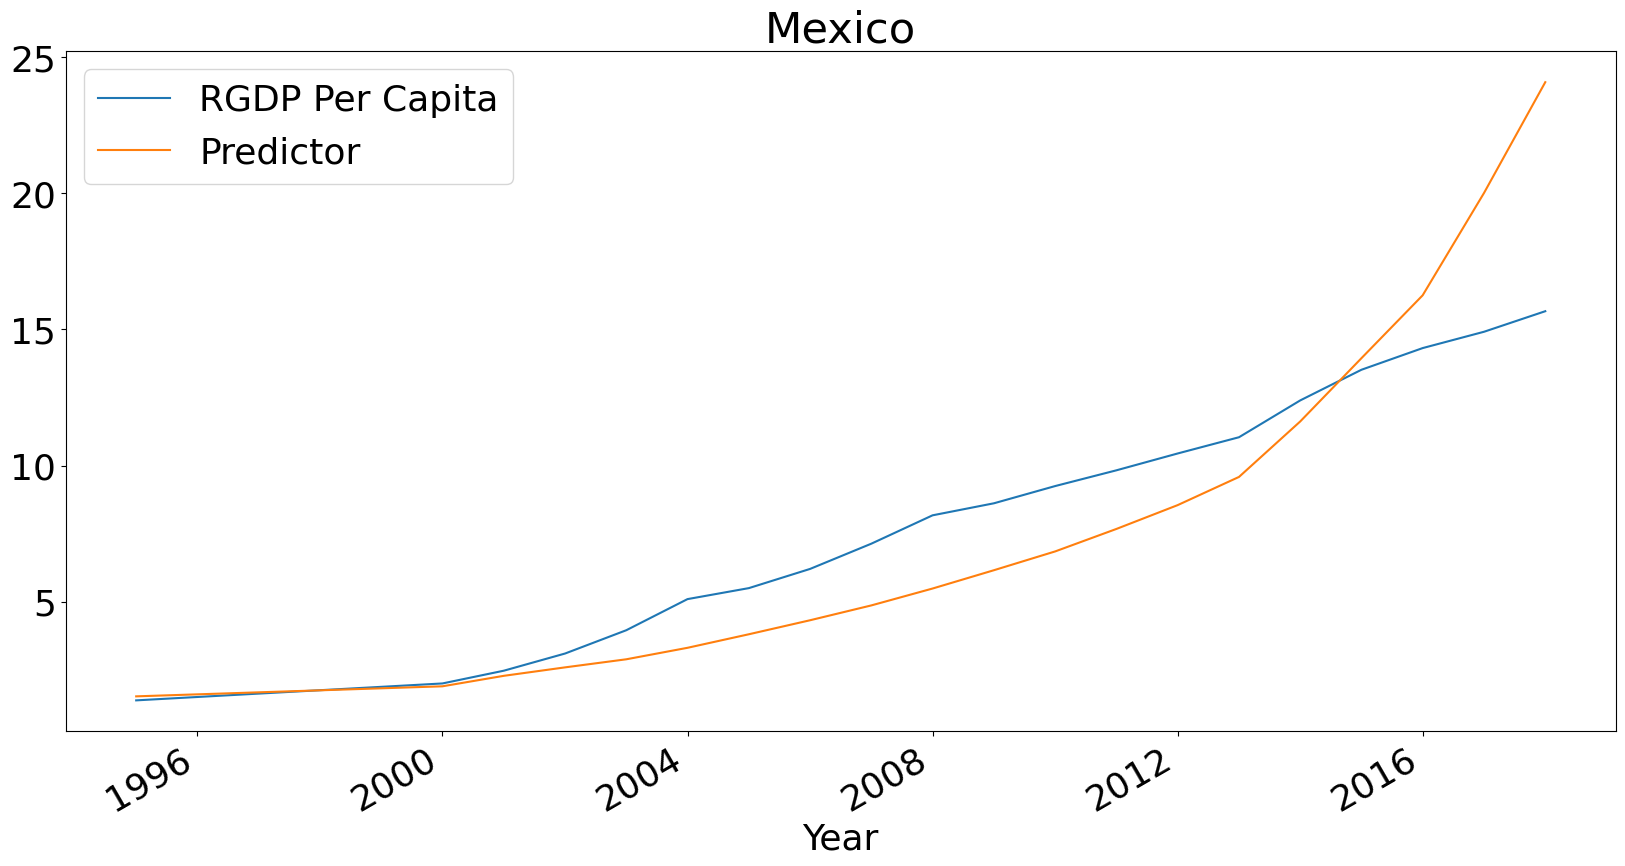

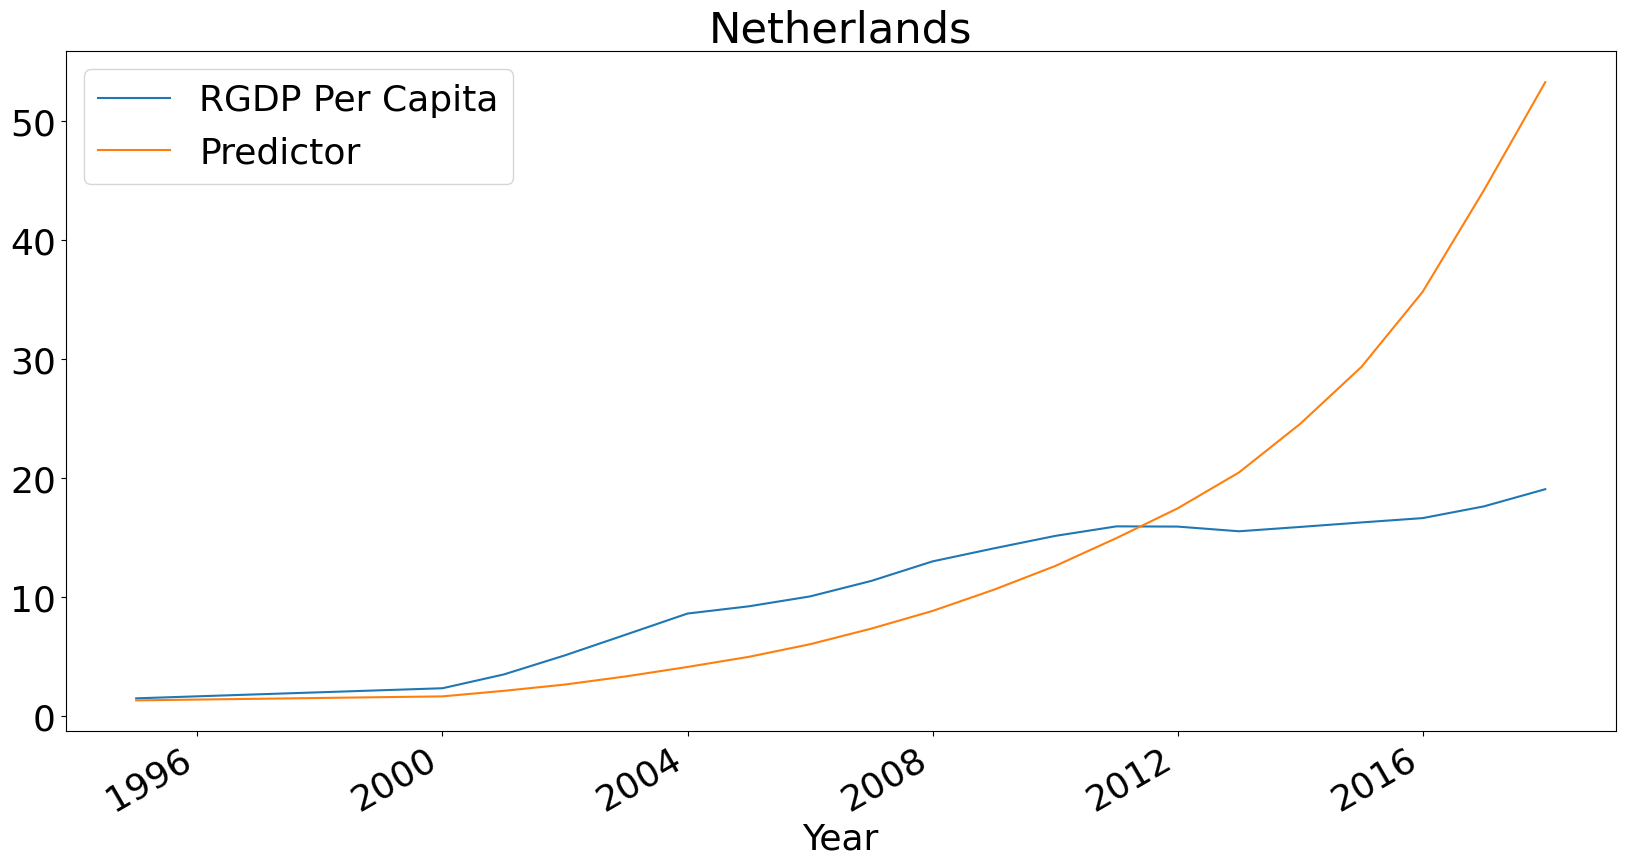

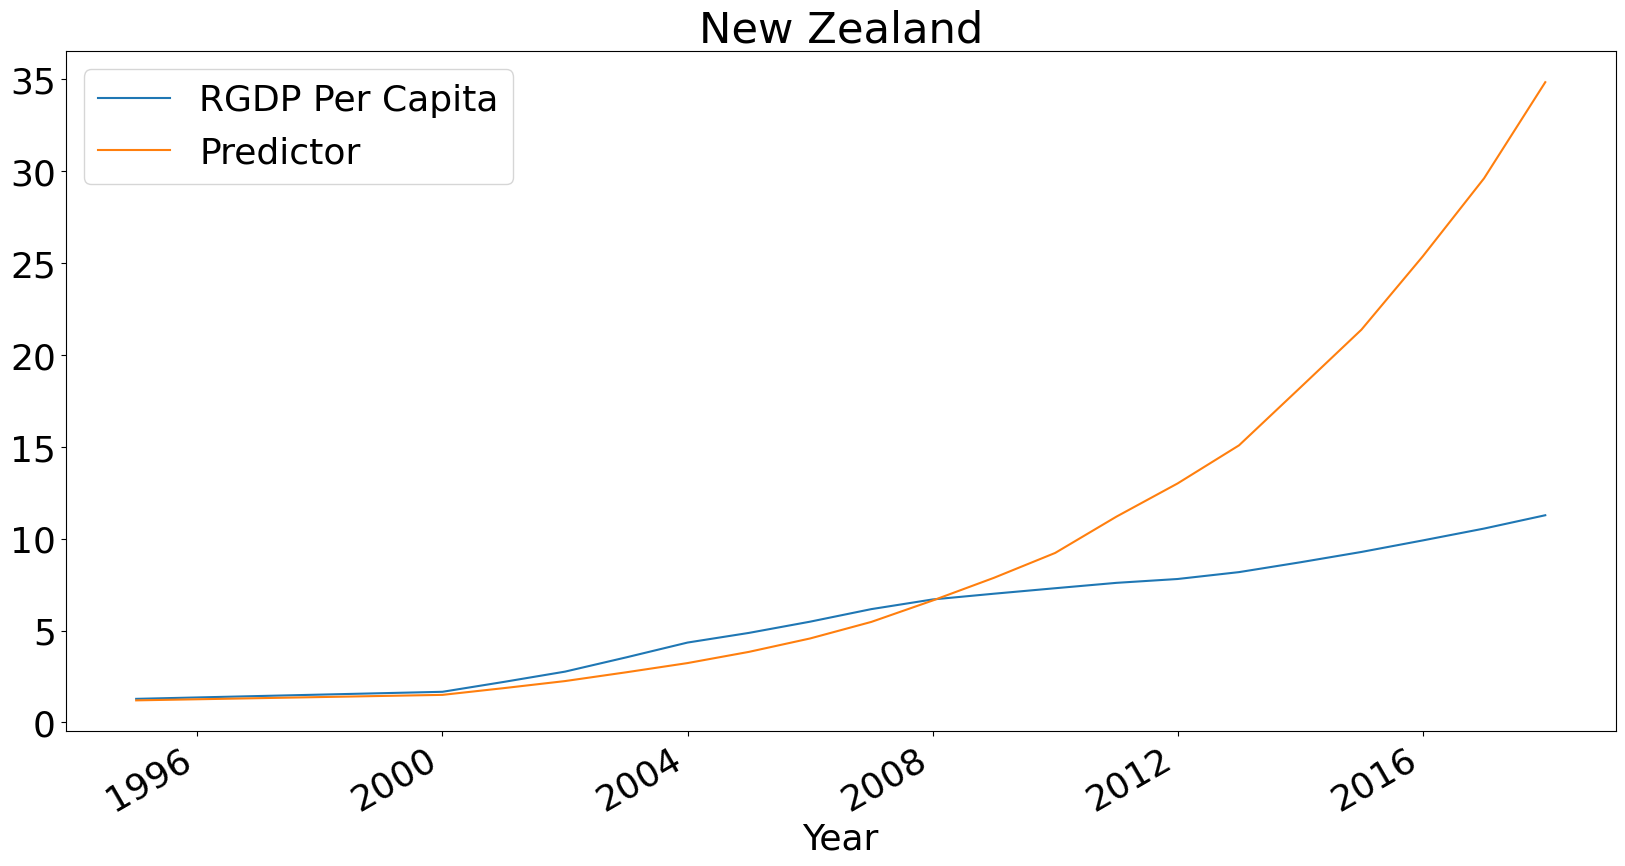

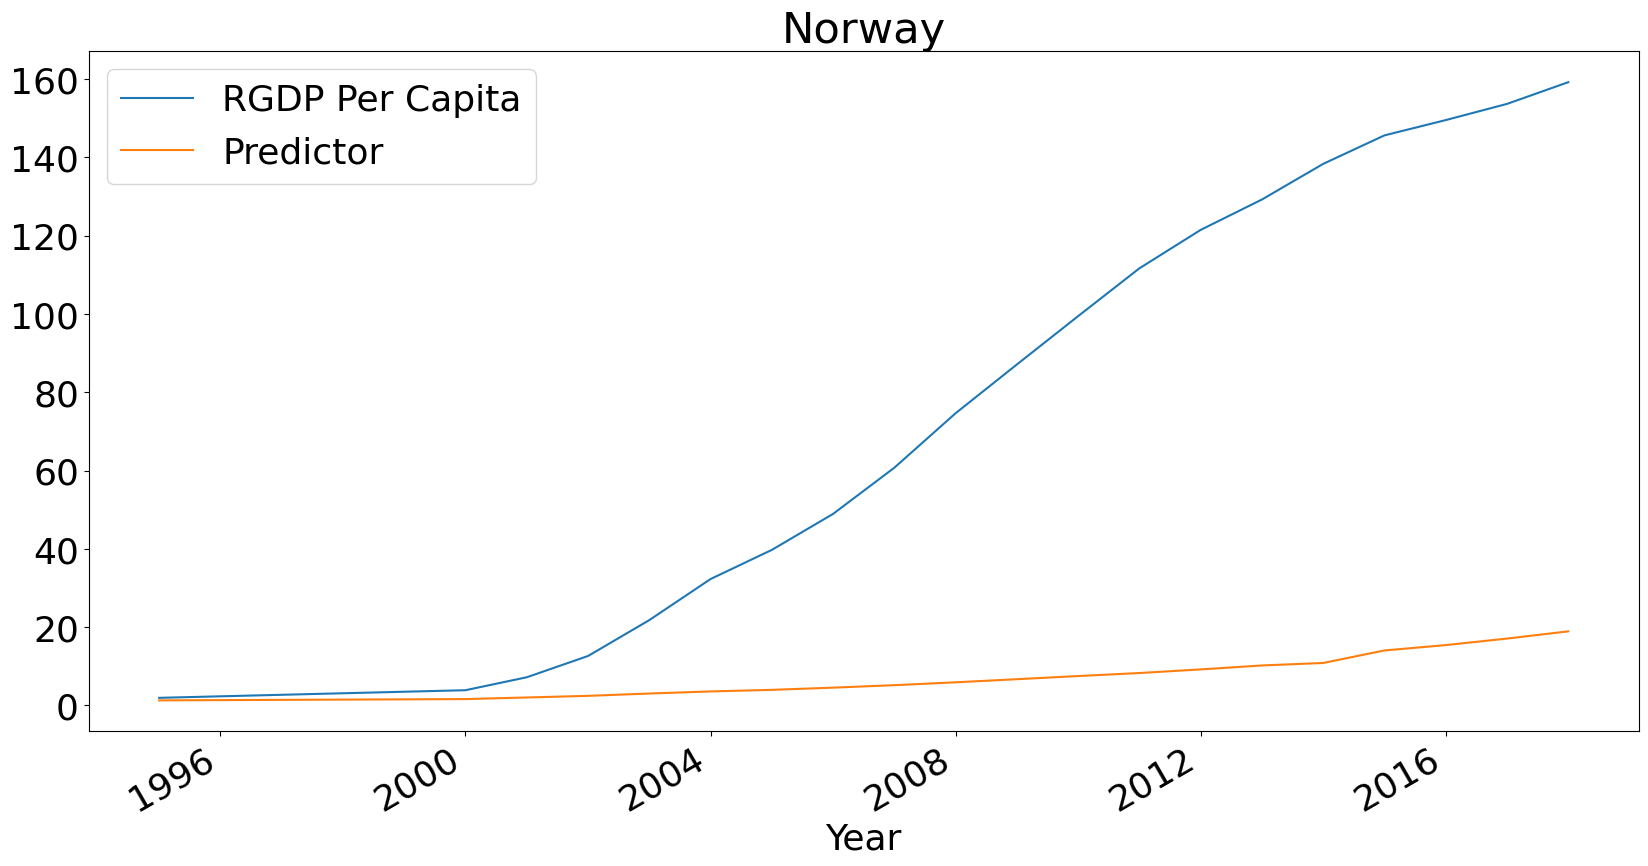

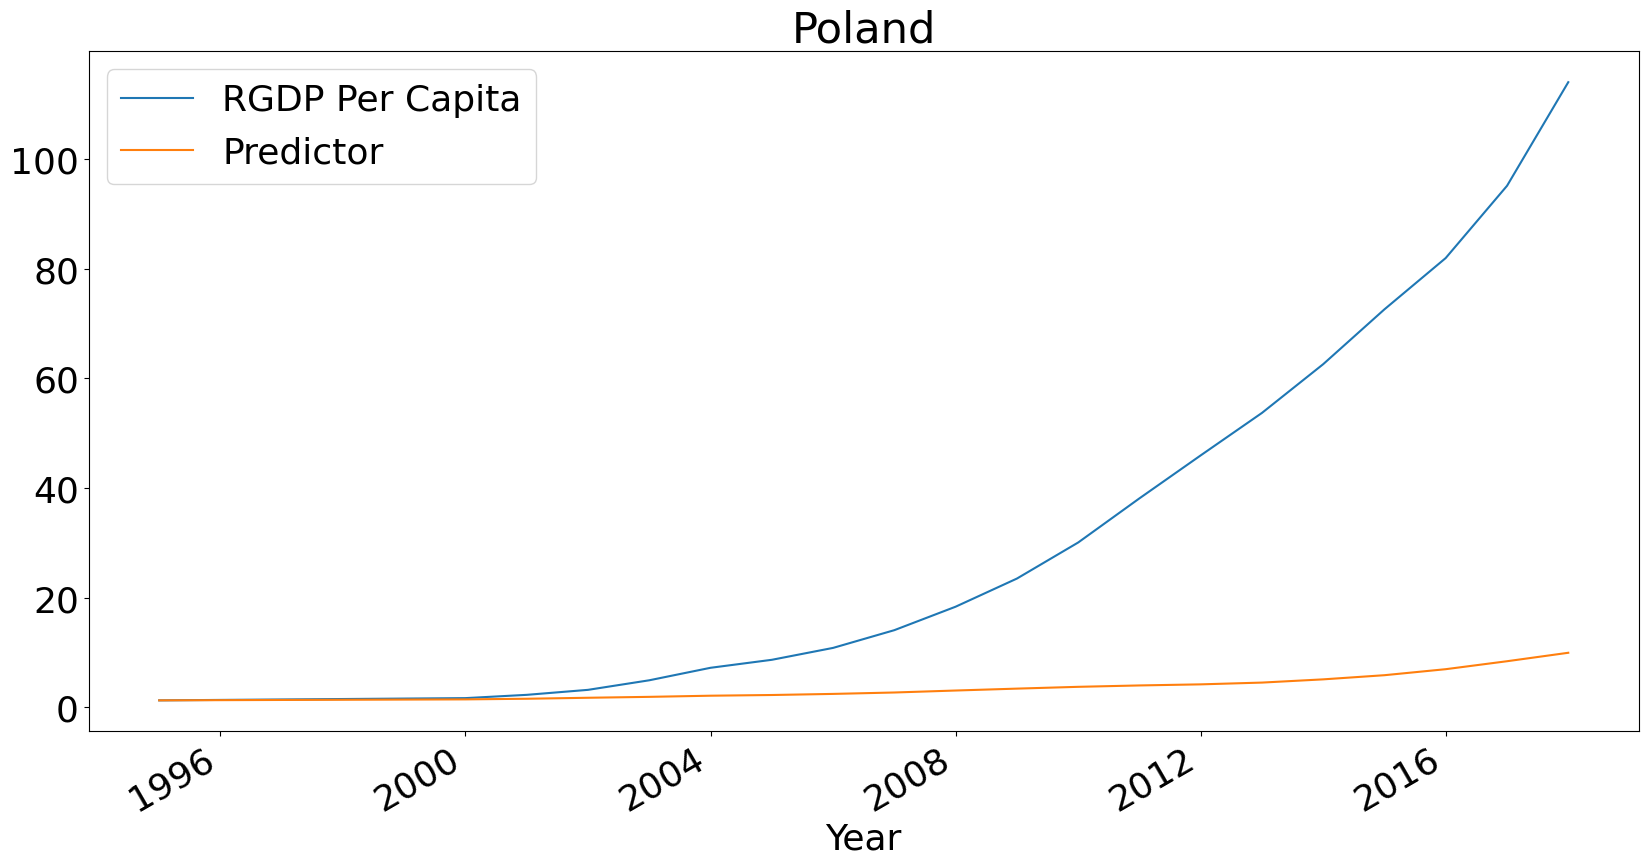

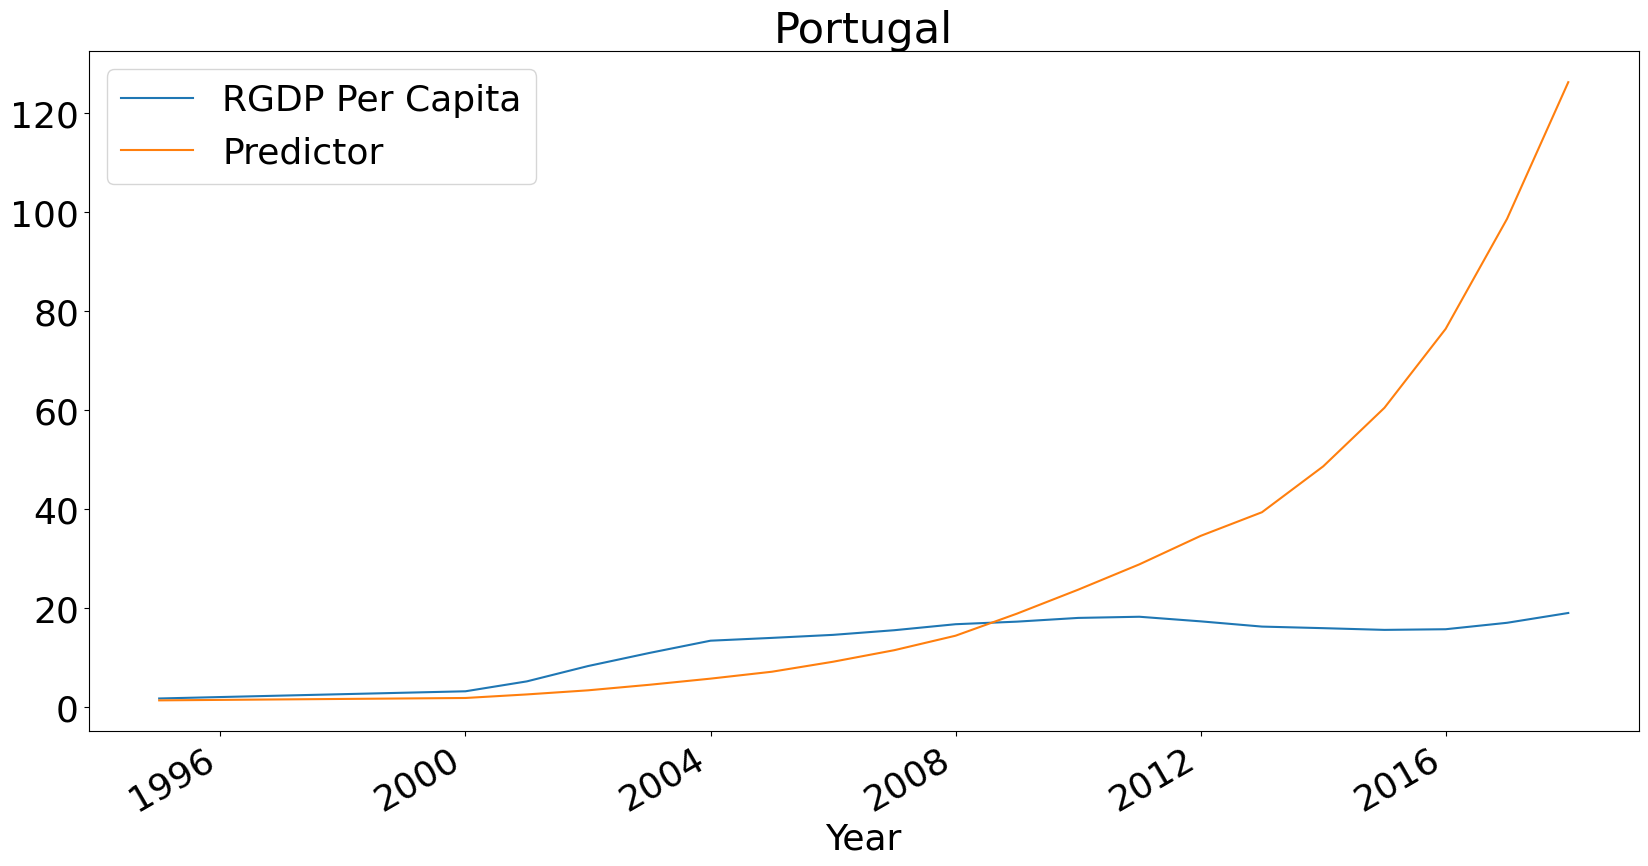

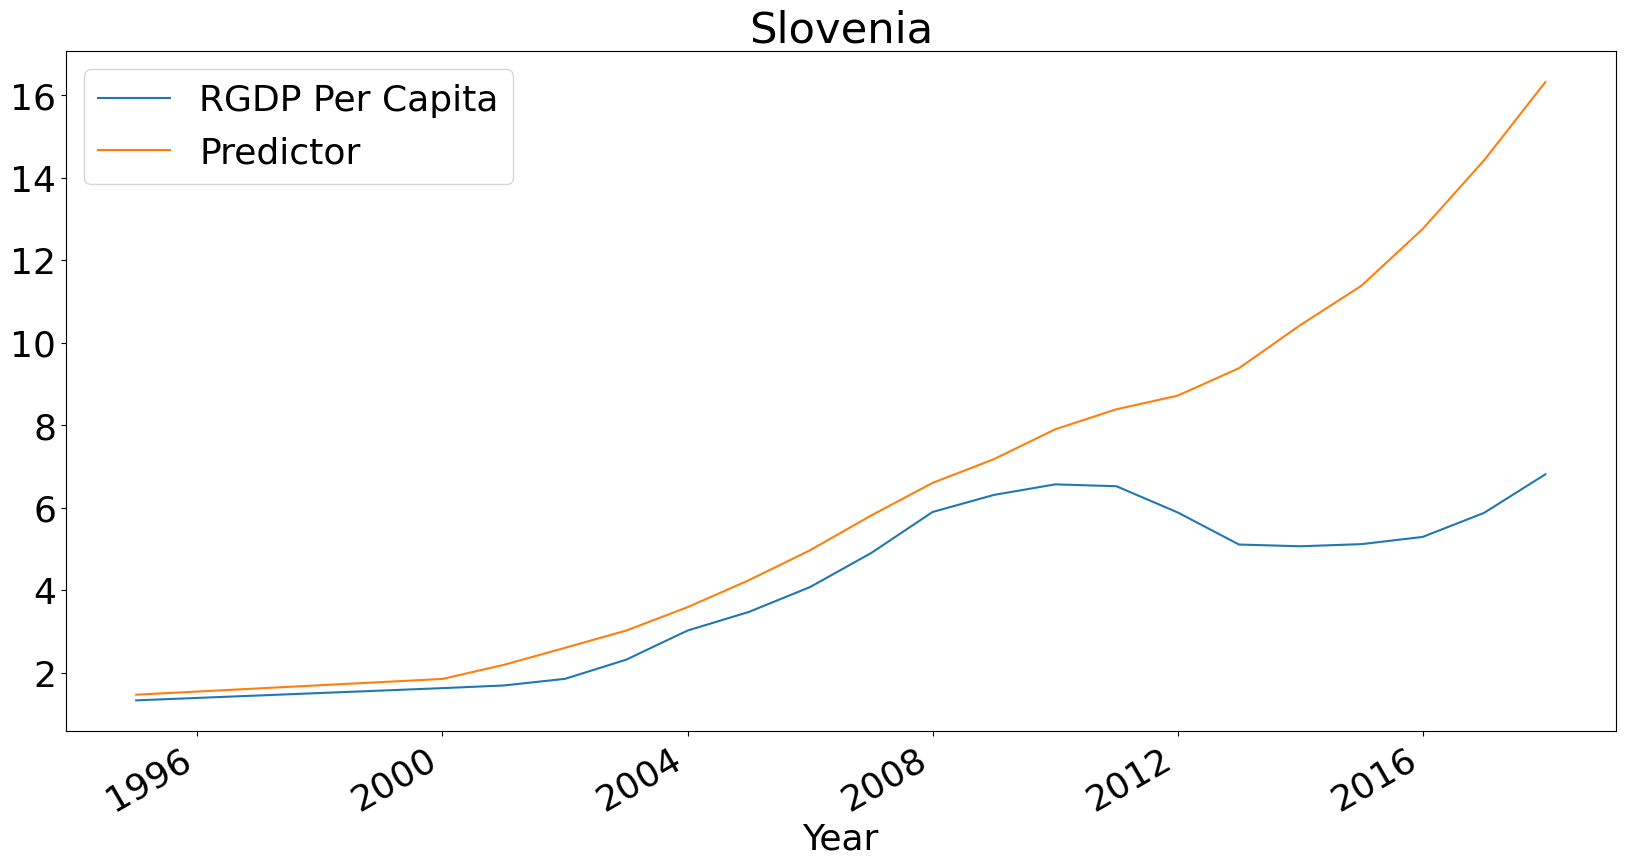

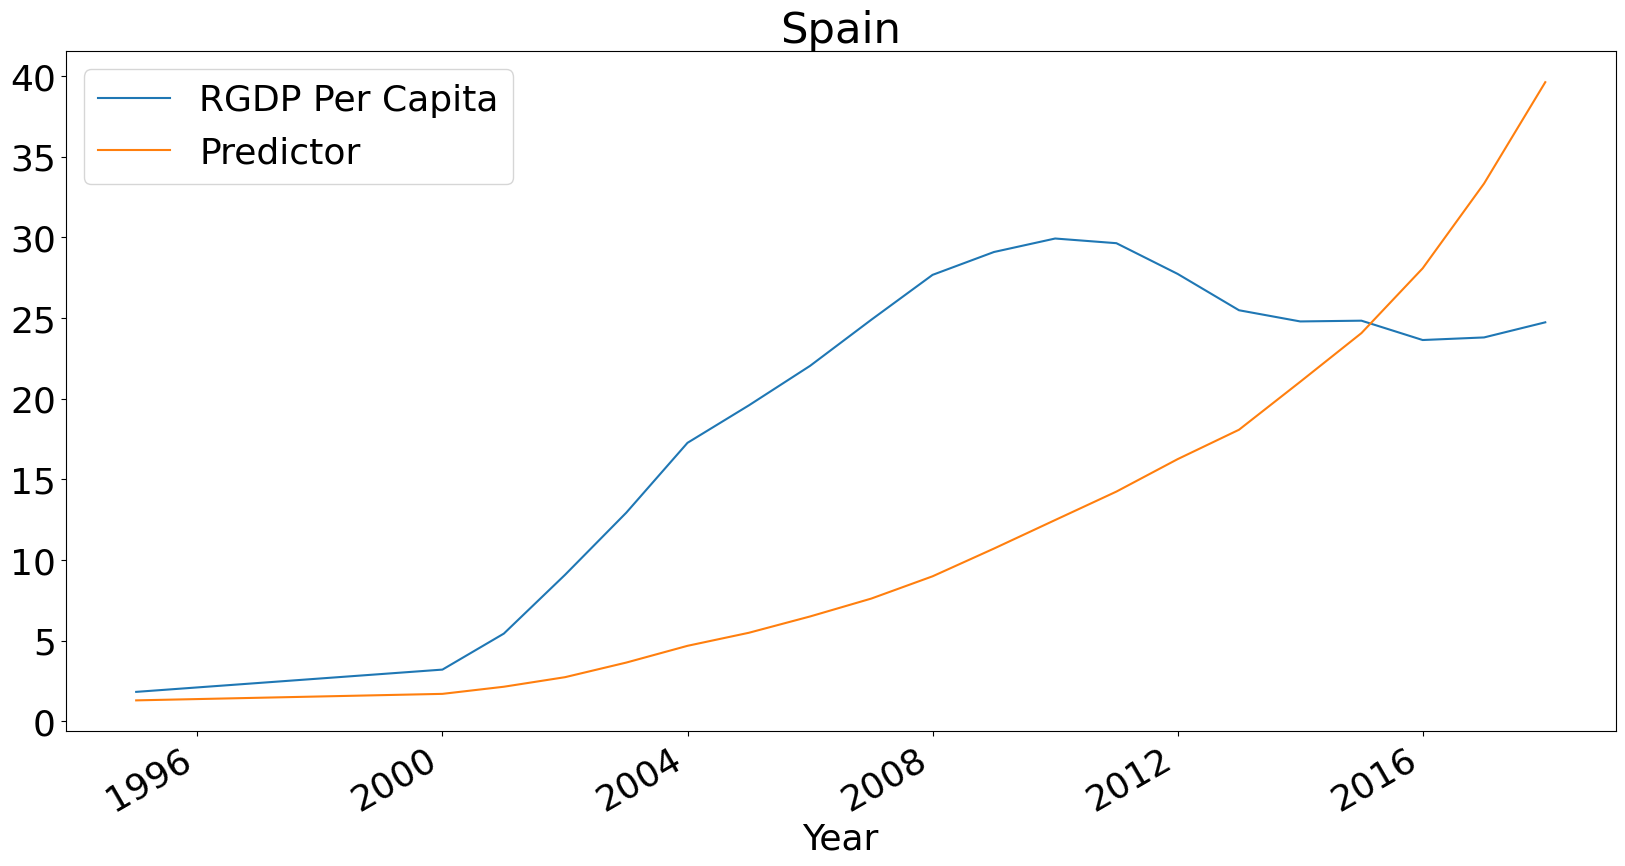

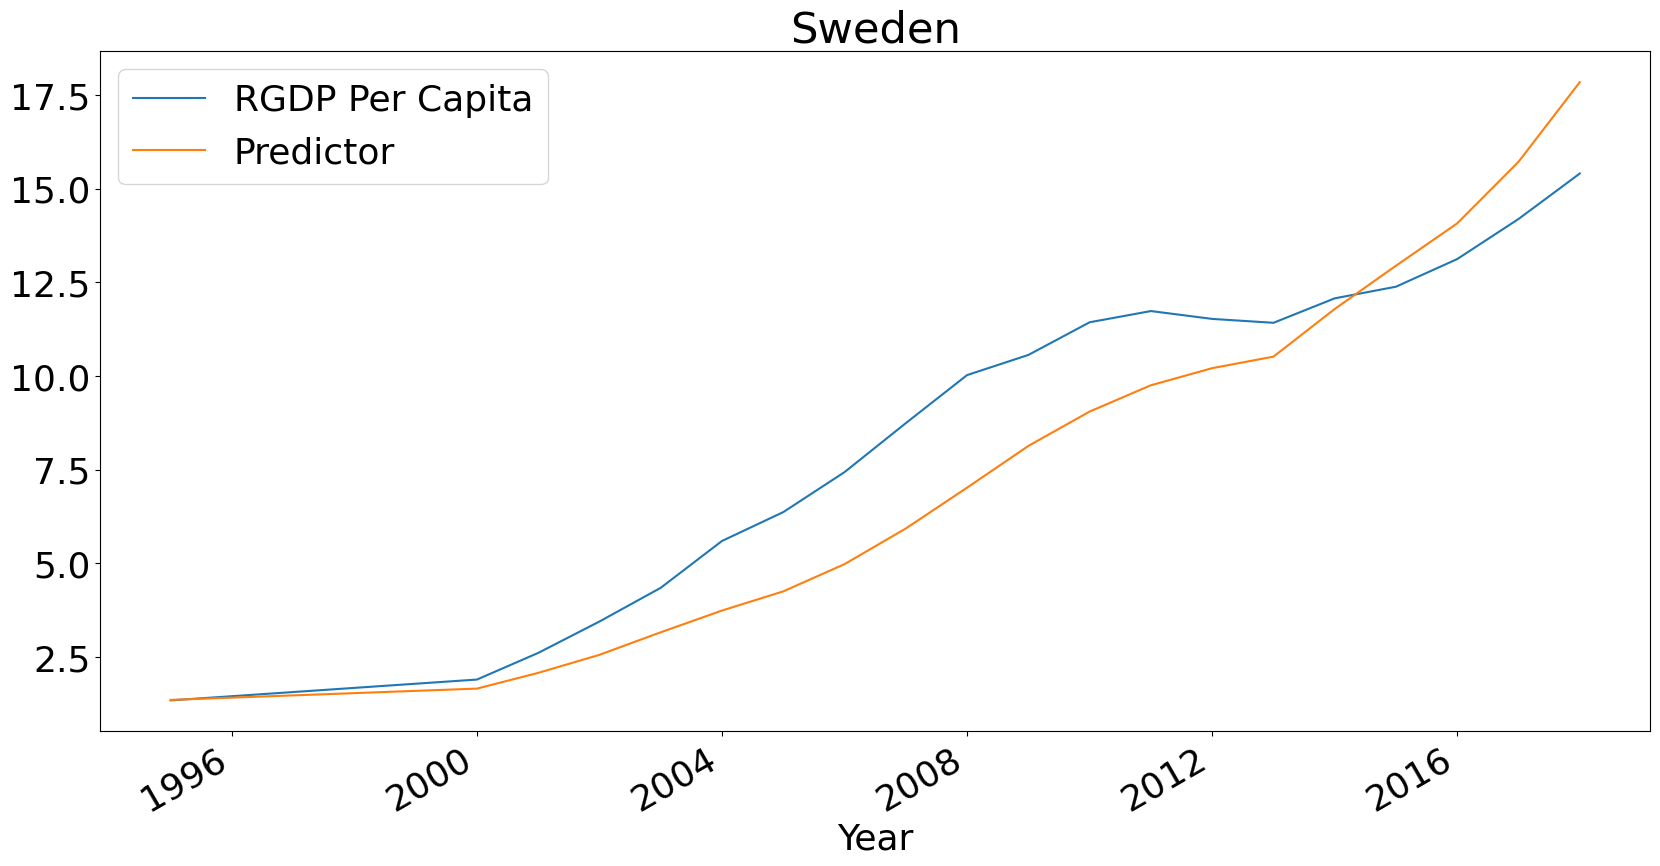

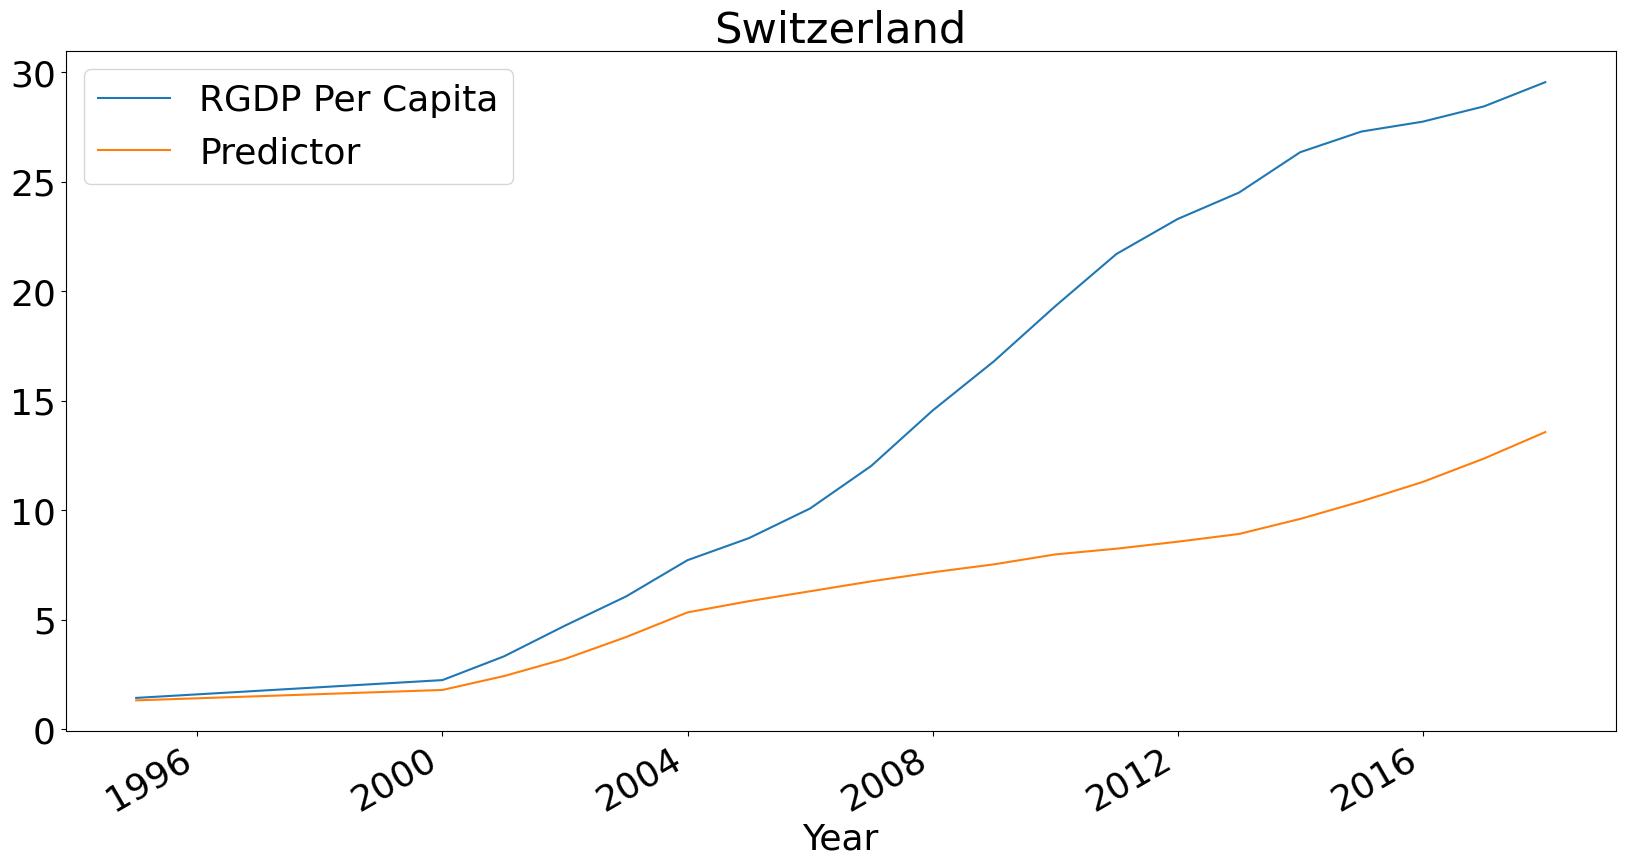

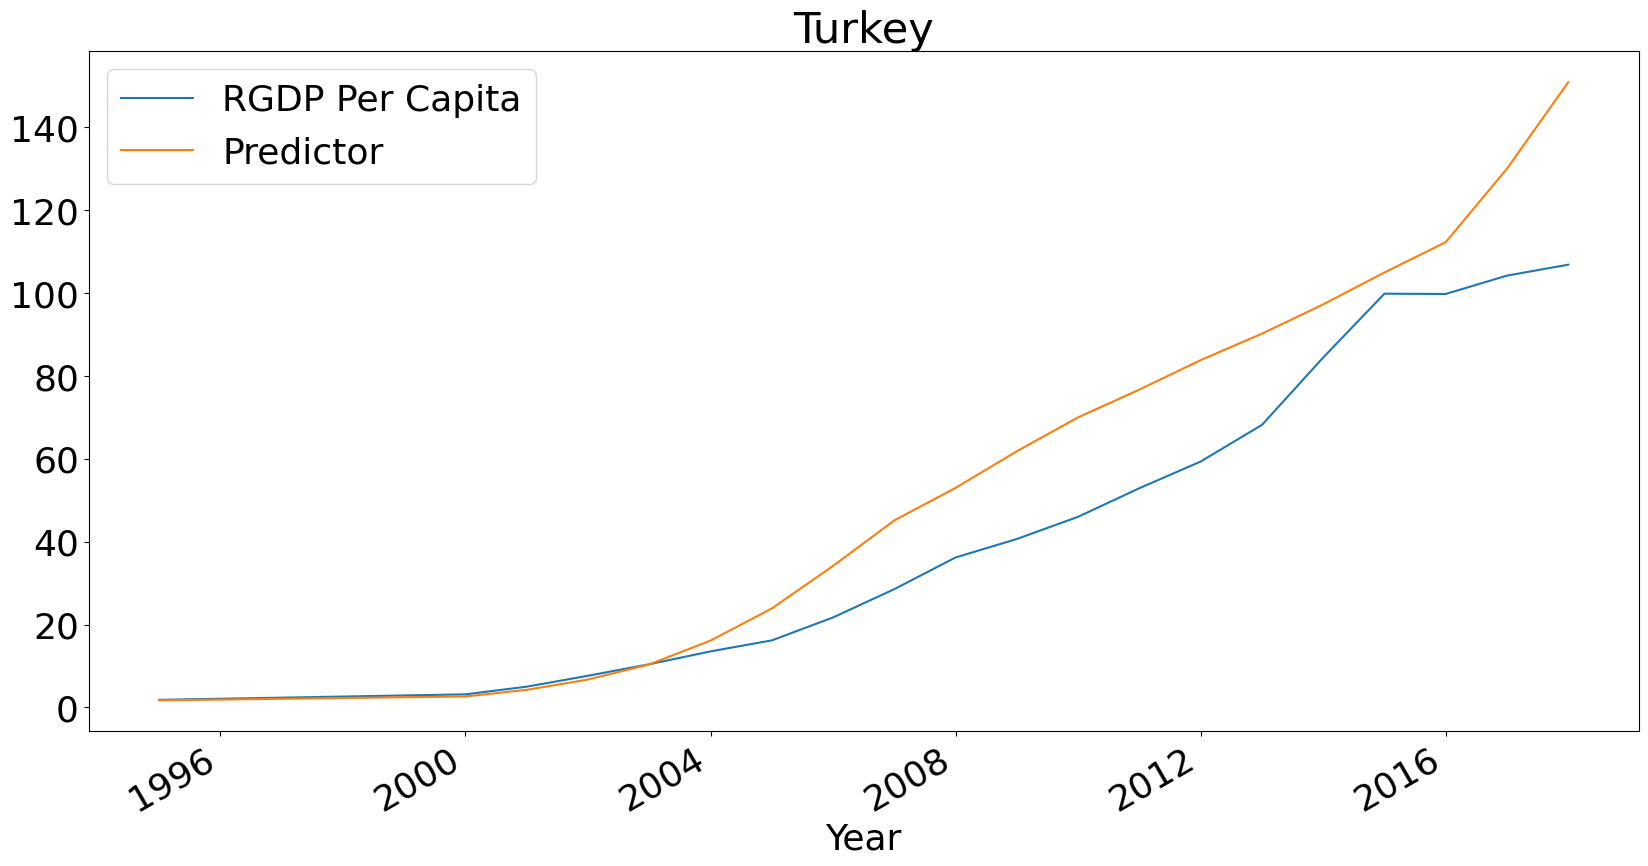

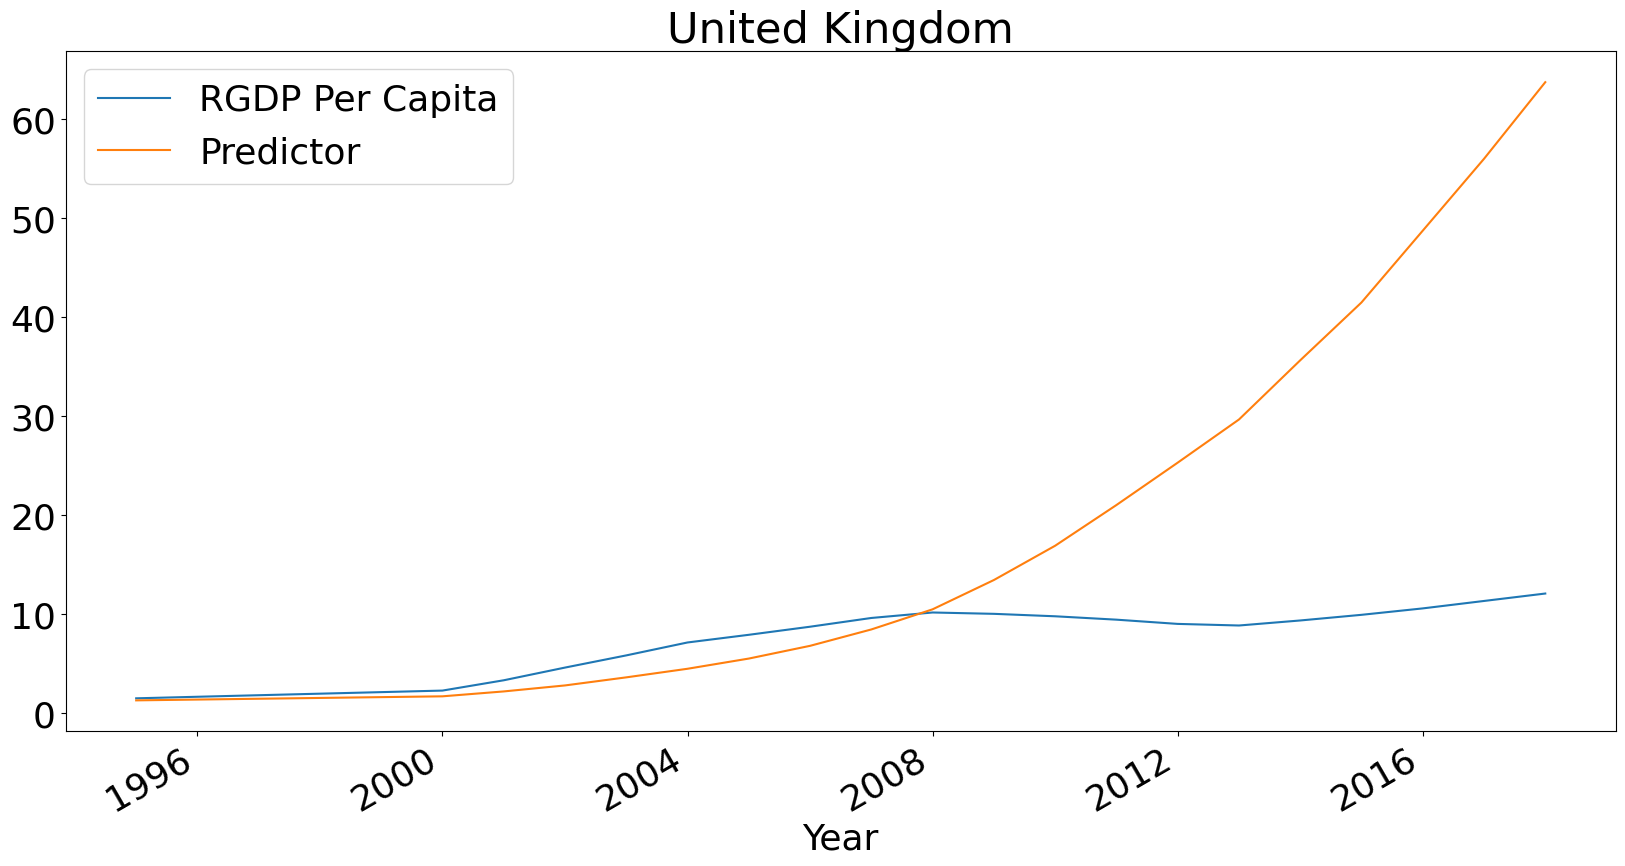

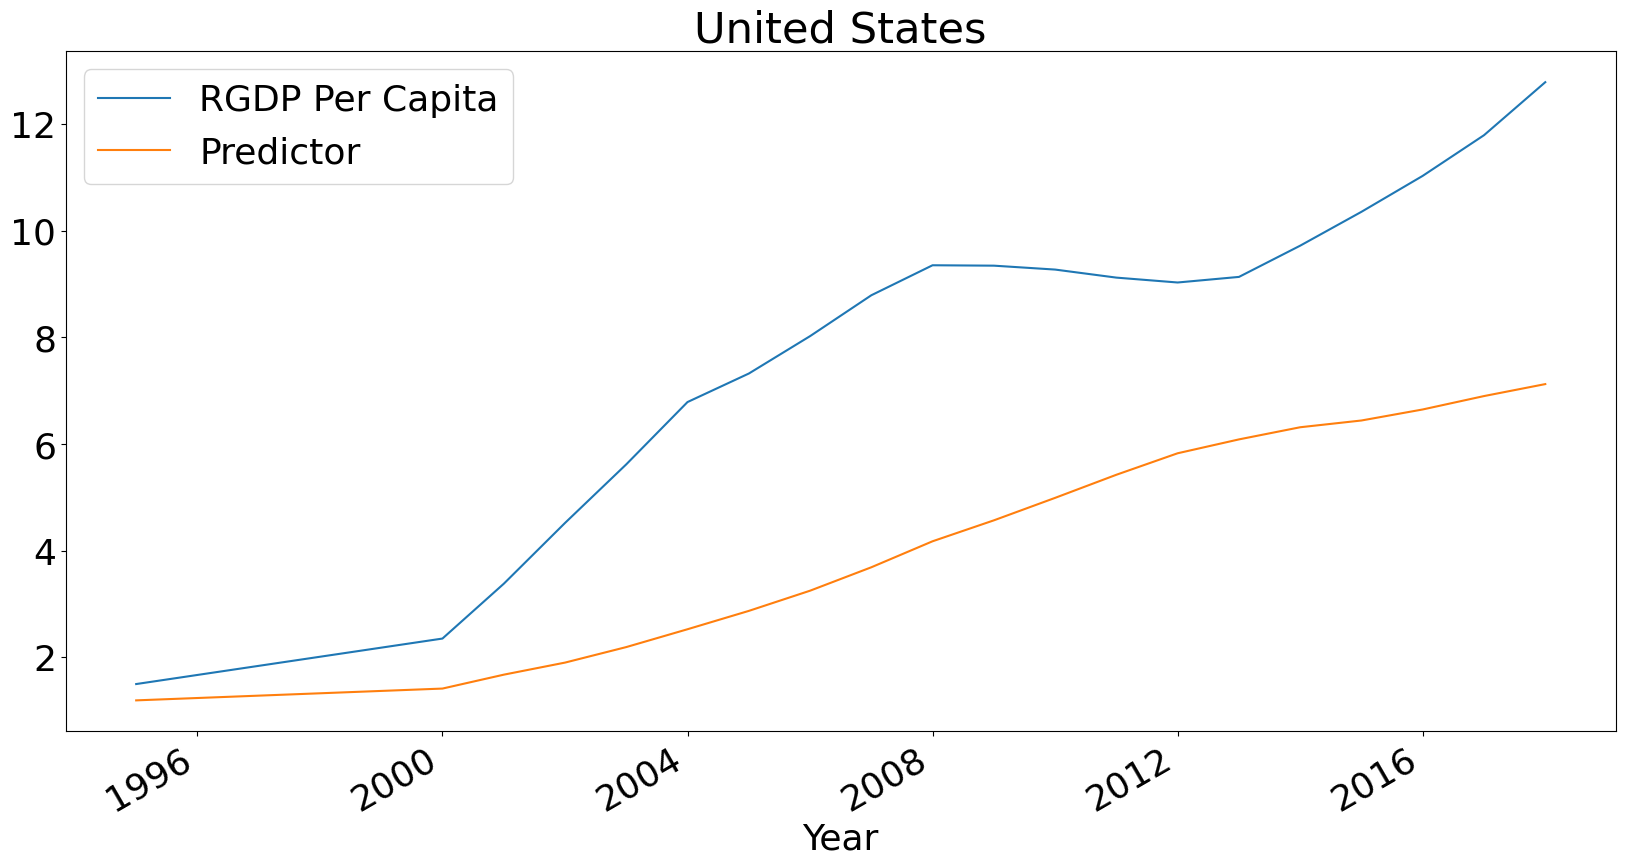

In [264]:
for country in countries:
    try:
        plot_data = r_df.loc[country]
        fig, ax = plt.subplots(figsize = (20,10))
        plot_data[[y_var[0], "Predictor"]].add(1).cumprod().plot.line(ax=ax, legend = True)
        ax.set_title(country)
    except:
        print(country + "Doesn't appear to be in the index")


In [265]:
mpl.pyplot.close()

In [266]:
years_diff = 2

In [267]:
r_df = reg_data.copy()
r_df["RGDP Per Capita Lag"] = reg_data["RGDP Per Capita"].groupby("Countries").shift(years_diff) 
r_df = r_df.dropna(axis=0, how = "any")
x_vars.append("RGDP Per Capita Lag")

y = r_df[y_var]
X = r_df[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_df["Predictor"] = results.predict()
results.summary()

C:\Users\calvi\AppData\Local\Temp\ipykernel_3068\3498326626.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     227.6
Date:                Sun, 23 Apr 2023   Prob (F-statistic):          1.44e-154
Time:                        23:45:14   Log-Likelihood:                 608.61
No. Observations:                 642   AIC:                            -1203.
Df Residuals:                     635   BIC:                            -1172.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                   0.0103      0.004      2.395      0.017       0.002       0.019
Legal System and Property Rights    -0.0103      0.005     -2.146      0.032      -0.020      -0.001
Sound Money                         -0.0265      0.007     -3.969      0.000      -0.040      -0.013
Freedom to Trade Internationally     0.0403      0.008      4.971      0.000       0.024       0.056
Regulation                           0.0104      0.007      1.547      0.122      -0.003       0.024
RGDP Per Capita Lag                  0.6032      0.019     31.740      0.000       0.566       0.641
Constant                            -0.1252      0.072     -1.743      0.082      -0.266       0.016
==============================================================================
Omnibus:                      195.908   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1265.400
Skew:                           1.195   Prob(JB):                    1.67e-275
Kurtosis:                       9.449   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

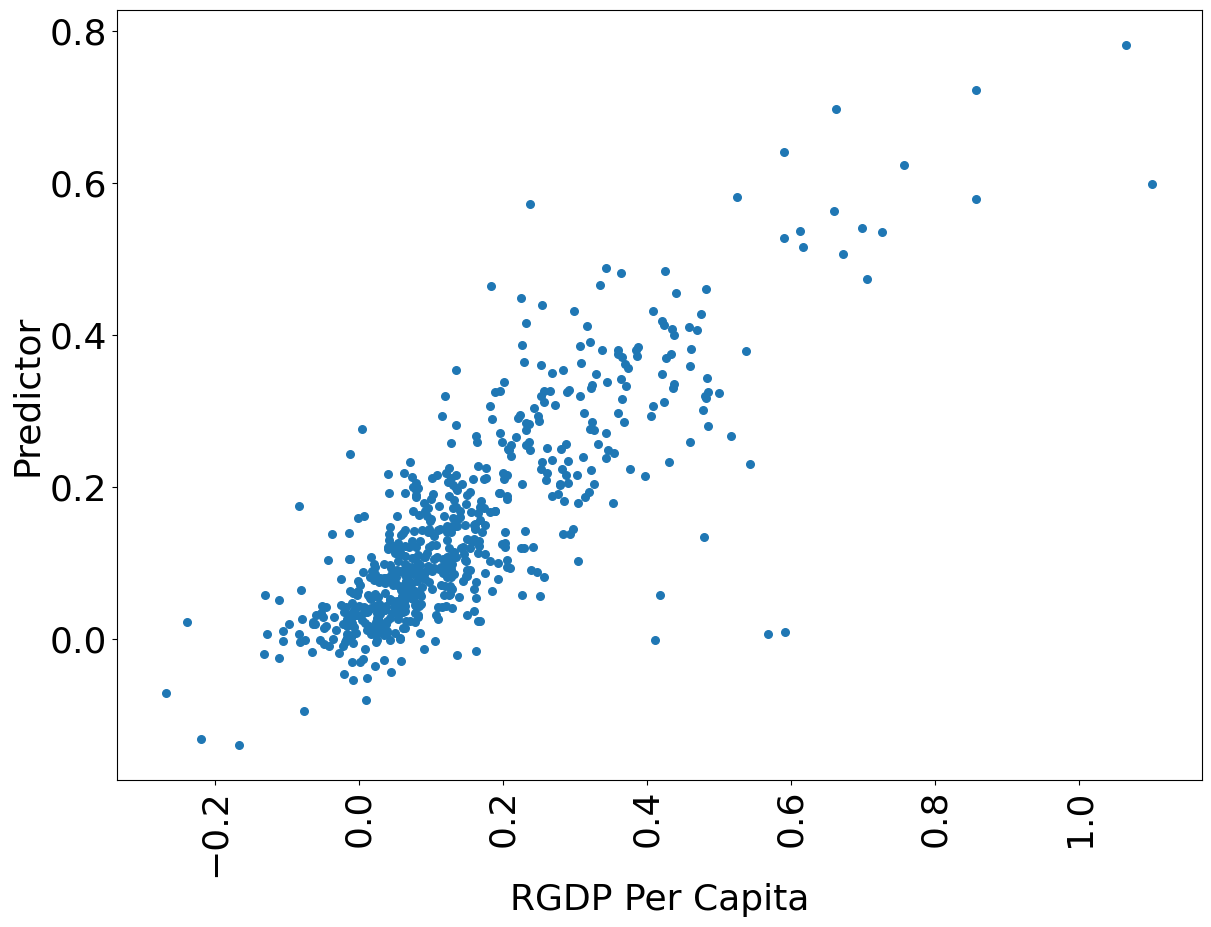

KeyError: 'Residuals'

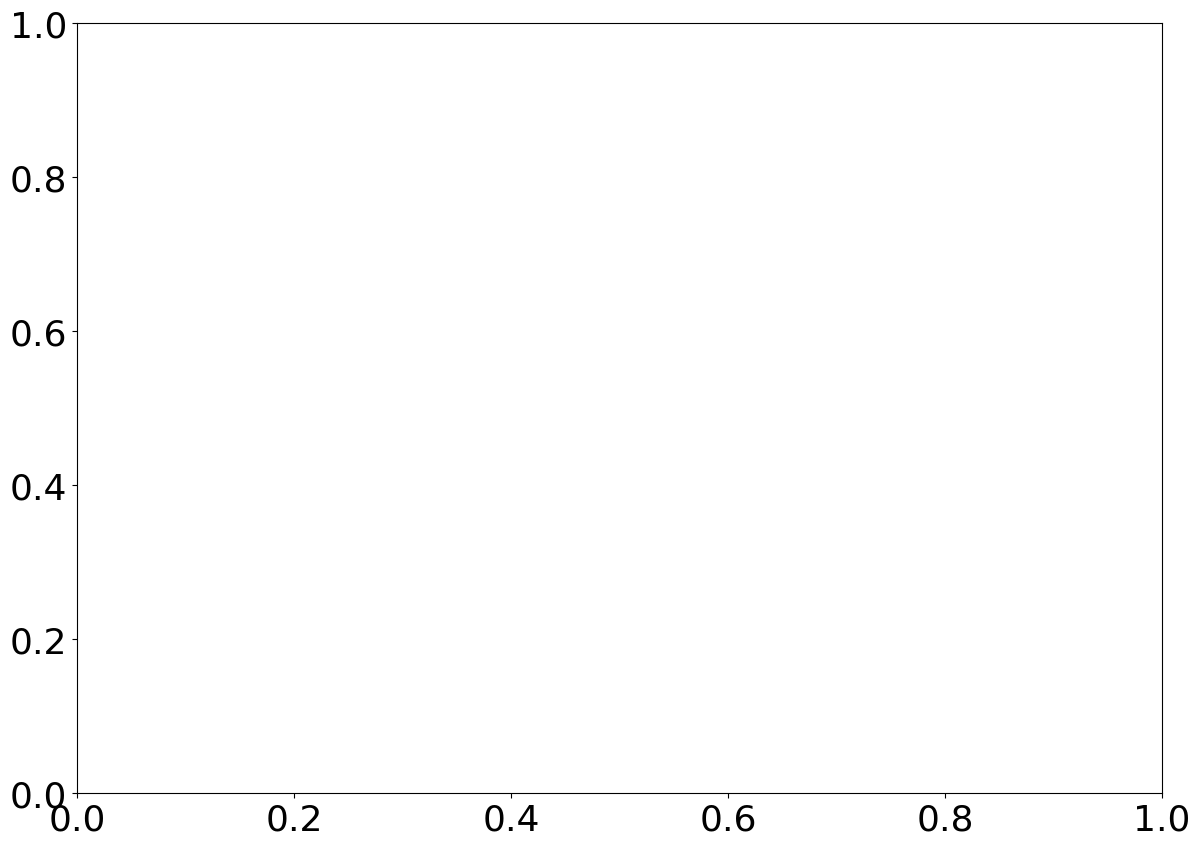

In [268]:
plot_residuals(r_df, y_var, x_vars)

<Axes: ylabel='Frequency'>

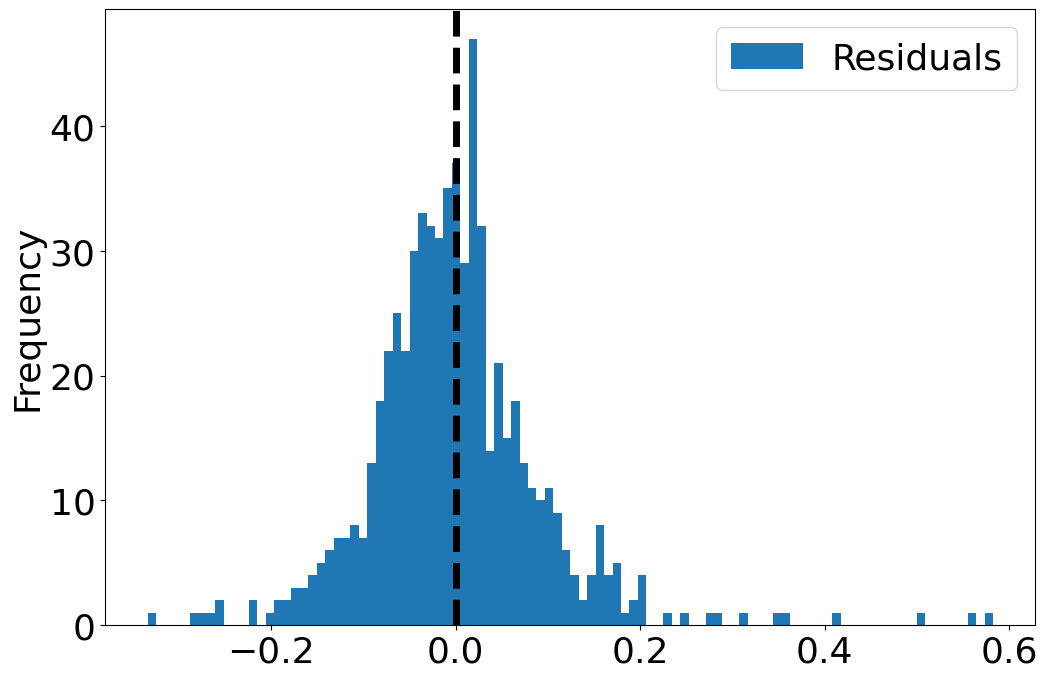

In [269]:
r_df["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))

ax.axvline(r_df["Residuals"].mean(), ls = "--", linewidth = 5, color = 'k')
r_df[["Residuals"]].plot.hist(bins = 100, ax = ax)

In [270]:
r_df

Summary  Size of Government  \
Countries     Year                                       
Australia     2001-01-01  8.031367            6.563175   
              2002-01-01  8.100603            6.603237   
              2003-01-01  8.120384            6.596027   
              2004-01-01  8.080821            6.748848   
              2005-01-01  8.169839            6.760857   
...                            ...                 ...   
United States 2014-01-01  8.249649            7.239681   
              2015-01-01  8.309574            7.237673   
              2016-01-01  8.339536            7.252009   
              2017-01-01  8.379486            7.354358   
              2018-01-01  8.279612            7.409095   

                          Legal System and Property Rights  Sound Money  \
Countries     Year                                                        
Australia     2001-01-01                          8.526849     9.440917   
              2002-01-01                          8.511514     9.521181   
              2003-01-01                          8.455134     9.582651   
              2004-01-01                          8.275733     9.544097   
              2005-01-01                          8.526133     9.546541   
...                                                    ...          ...   
United States 2014-01-01                          7.652463     9.737154   
              2015-01-01                          7.745733     9.855788   
              2016-01-01                          7.793107     9.814703   
              2017-01-01                          7.802657     9.772320   
              2018-01-01                          7.646530     9.772494   

                          Freedom to Trade Internationally  Regulation  \
Countries     Year                                                       
Australia     2001-01-01                          7.644106    7.939297   
              2002-01-01                          7.556877    8.280821   
              2003-01-01                          7.533910    8.396801   
              2004-01-01                          7.393784    8.445872   
              2005-01-01                          7.434849    8.595742   
...                                                    ...         ...   
United States 2014-01-01                          7.836022    8.792114   
              2015-01-01                          7.810632    8.891698   
              2016-01-01                          7.889129    8.952382   
              2017-01-01                          7.921225    9.031901   
              2018-01-01                          7.783384    8.784245   

                          RGDP Per Capita  RGDP Per Capita Lag  Predictor  \
Countries     Year                                                          
Australia     2001-01-01         0.484073             0.470801   0.279651   
              2002-01-01         0.436447             0.555942   0.329497   
              2003-01-01         0.367342             0.484073   0.285301   
              2004-01-01         0.286891             0.436447   0.255881   
              2005-01-01         0.135260             0.367342   0.214893   
...                                   ...                  ...        ...   
United States 2014-01-01         0.064168            -0.010025   0.014350   
              2015-01-01         0.065292             0.011613   0.023295   
              2016-01-01         0.065073             0.064168   0.059542   
              2017-01-01         0.069256             0.065292   0.064424   
              2018-01-01         0.084265             0.065073   0.058327   

                          Residuals  
Countries     Year                   
Australia     2001-01-01   0.204422  
              2002-01-01   0.106950  
              2003-01-01   0.082041  
              2004-01-01   0.031010  
              2005-01-01  -0.079633  
...                             ...  
United States 2014-01-01   

In [271]:
del r_df["Predictor"]
del r_df["Residuals"]
del r_df["RGDP Per Capita Lag"]
r_df

Summary  Size of Government  \
Countries     Year                                       
Australia     2001-01-01  8.031367            6.563175   
              2002-01-01  8.100603            6.603237   
              2003-01-01  8.120384            6.596027   
              2004-01-01  8.080821            6.748848   
              2005-01-01  8.169839            6.760857   
...                            ...                 ...   
United States 2014-01-01  8.249649            7.239681   
              2015-01-01  8.309574            7.237673   
              2016-01-01  8.339536            7.252009   
              2017-01-01  8.379486            7.354358   
              2018-01-01  8.279612            7.409095   

                          Legal System and Property Rights  Sound Money  \
Countries     Year                                                        
Australia     2001-01-01                          8.526849     9.440917   
              2002-01-01                          8.511514     9.521181   
              2003-01-01                          8.455134     9.582651   
              2004-01-01                          8.275733     9.544097   
              2005-01-01                          8.526133     9.546541   
...                                                    ...          ...   
United States 2014-01-01                          7.652463     9.737154   
              2015-01-01                          7.745733     9.855788   
              2016-01-01                          7.793107     9.814703   
              2017-01-01                          7.802657     9.772320   
              2018-01-01                          7.646530     9.772494   

                          Freedom to Trade Internationally  Regulation  \
Countries     Year                                                       
Australia     2001-01-01                          7.644106    7.939297   
              2002-01-01                          7.556877    8.280821   
              2003-01-01                          7.533910    8.396801   
              2004-01-01                          7.393784    8.445872   
              2005-01-01                          7.434849    8.595742   
...                                                    ...         ...   
United States 2014-01-01                          7.836022    8.792114   
              2015-01-01                          7.810632    8.891698   
              2016-01-01                          7.889129    8.952382   
              2017-01-01                          7.921225    9.031901   
              2018-01-01                          7.783384    8.784245   

                          RGDP Per Capita  
Countries     Year                         
Australia     2001-01-01         0.484073  
              2002-01-01         0.436447  
              2003-01-01         0.367342  
              2004-01-01         0.286891  
              2005-01-01         0.135260  
...                                   ...  
United States 2014-01-01         0.064168  
              2015-01-01         0.065292  
              2016-01-01         0.065073  
              2017-01-01         0.069256  
              2018-01-01         0.084265  

[642 rows x 7 columns]

In [277]:
x_vars = list(r_df.keys()[2:7])
y_var = [r_df.keys()[7]]
x_vars, y_var
r_df = r_df[y_var + x_vars].groupby("Countries").diff(years_diff)

In [278]:
r_df = r_df.dropna(axis=0, how = "any")

In [279]:
y = r_df[y_var]
X = r_df[x_vars]

X["Constant"] = 1

results = sm.OLS(y, X).fit()
r_df["Predictor"] = results.predict()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Predictor   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.918e+31
Date:                Sun, 23 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:47:56   Log-Likelihood:                 20042.
No. Observations:                 570   AIC:                        -4.007e+04
Df Residuals:                     564   BIC:                        -4.005e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Legal System and Property Rights  6.939e-17   2.94e-17      2.360      0.019    1.16e-17    1.27e-16
Sound Money                       3.331e-16   1.42e-17     23.414      0.000    3.05e-16    3.61e-16
Freedom to Trade Internationally -5.725e-16    2.1e-17    -27.319      0.000   -6.14e-16   -5.31e-16
Regulation                        6.939e-18   1.72e-17      0.402      0.688   -2.69e-17    4.08e-17
RGDP Per Capita                      1.0000   5.14e-17   1.94e+16      0.000       1.000       1.000
Constant                          7.286e-17   6.01e-18     12.123      0.000    6.11e-17    8.47e-17
==============================================================================
Omnibus:                       49.693   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.193
Skew:                          -0.217   Prob(JB):                     6.87e-48
Kurtosis:                       5.993   Cond. No.                         9.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='Frequency'>

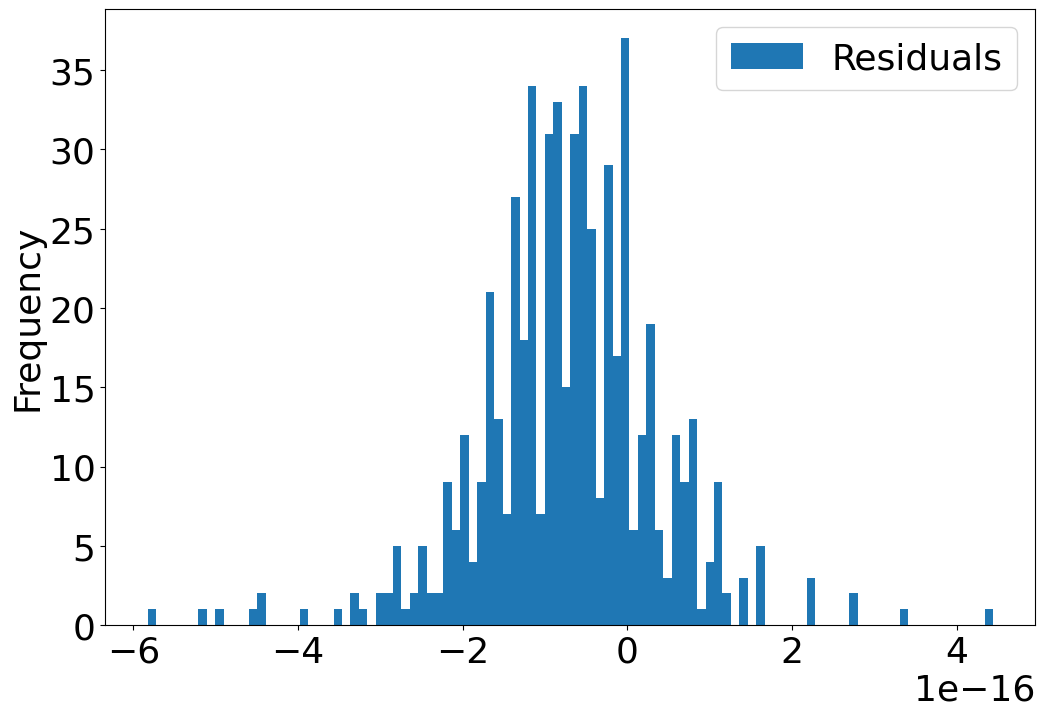

In [280]:
r_df["Residuals"]= results.resid
fig, ax = plt.subplots(figsize = (12,8))

r_df[["Residuals"]].plot.hist(bins = 100, ax = ax)

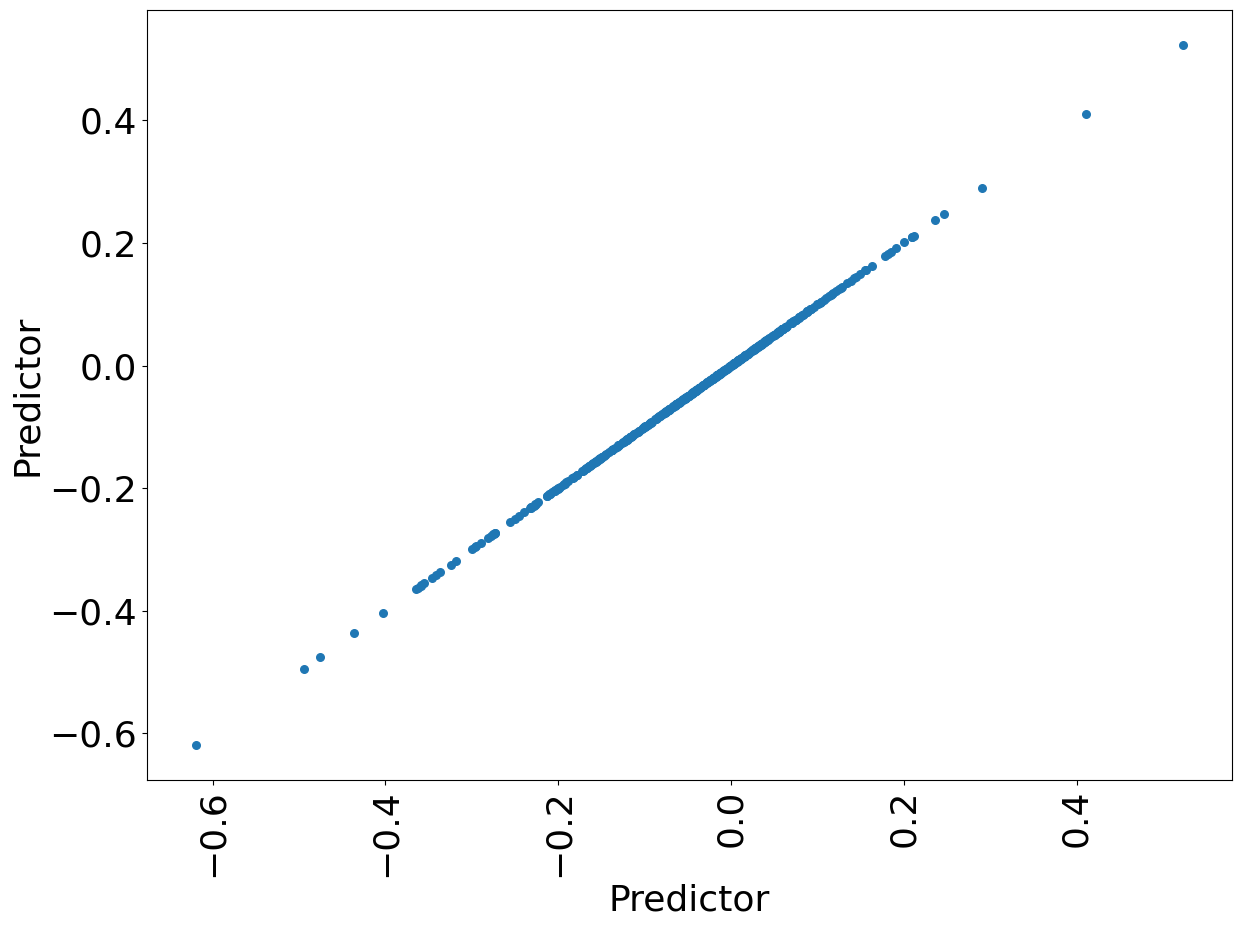

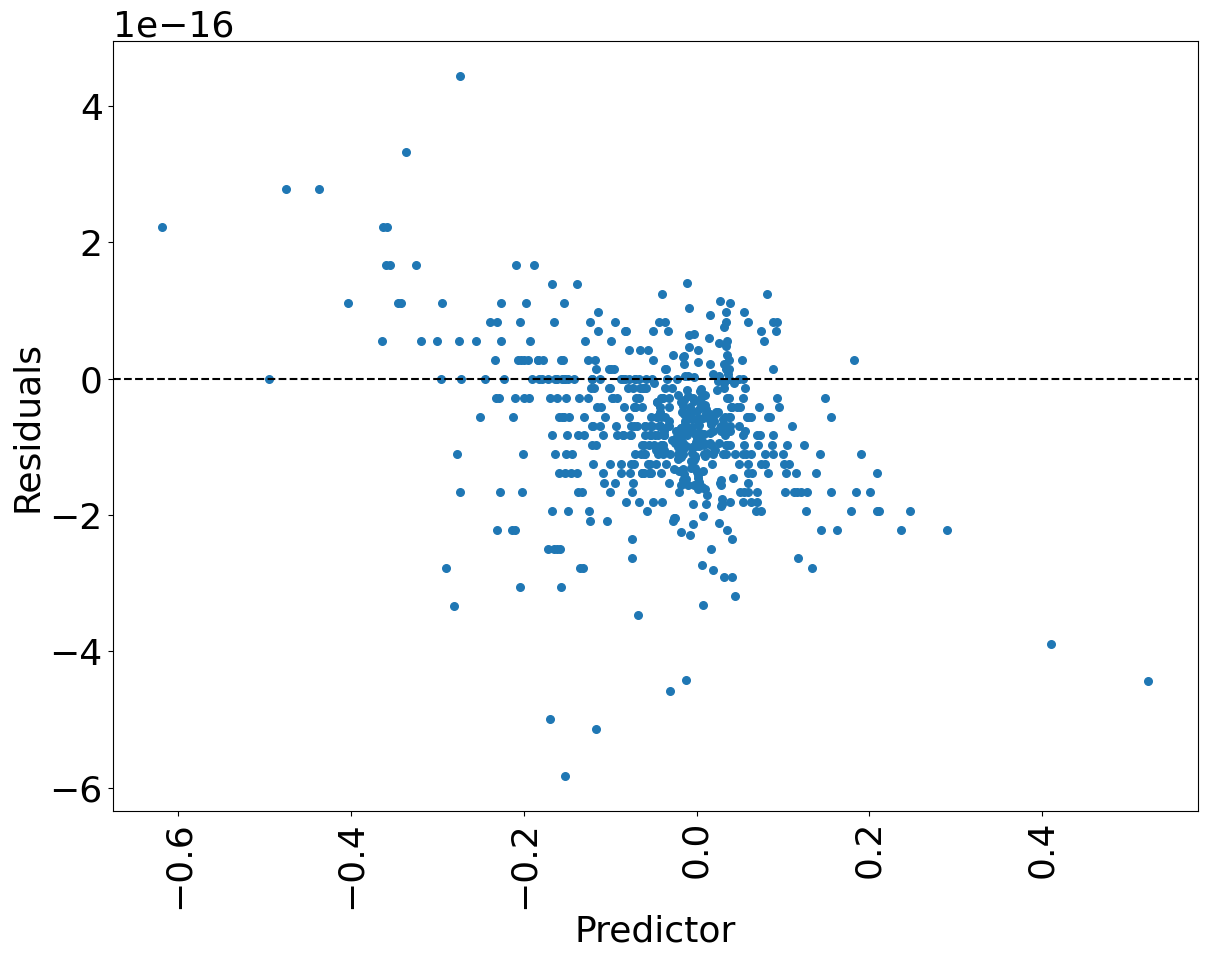

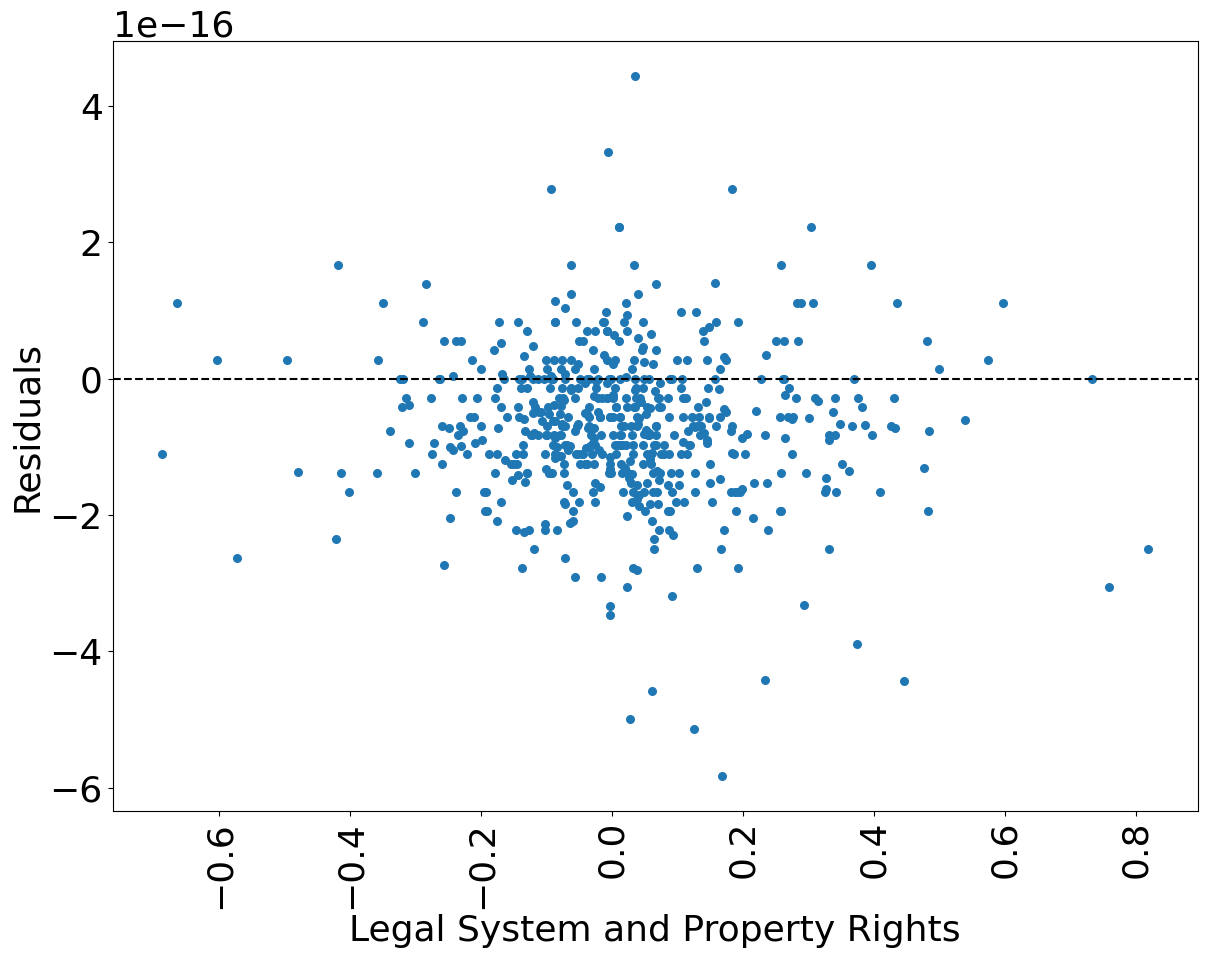

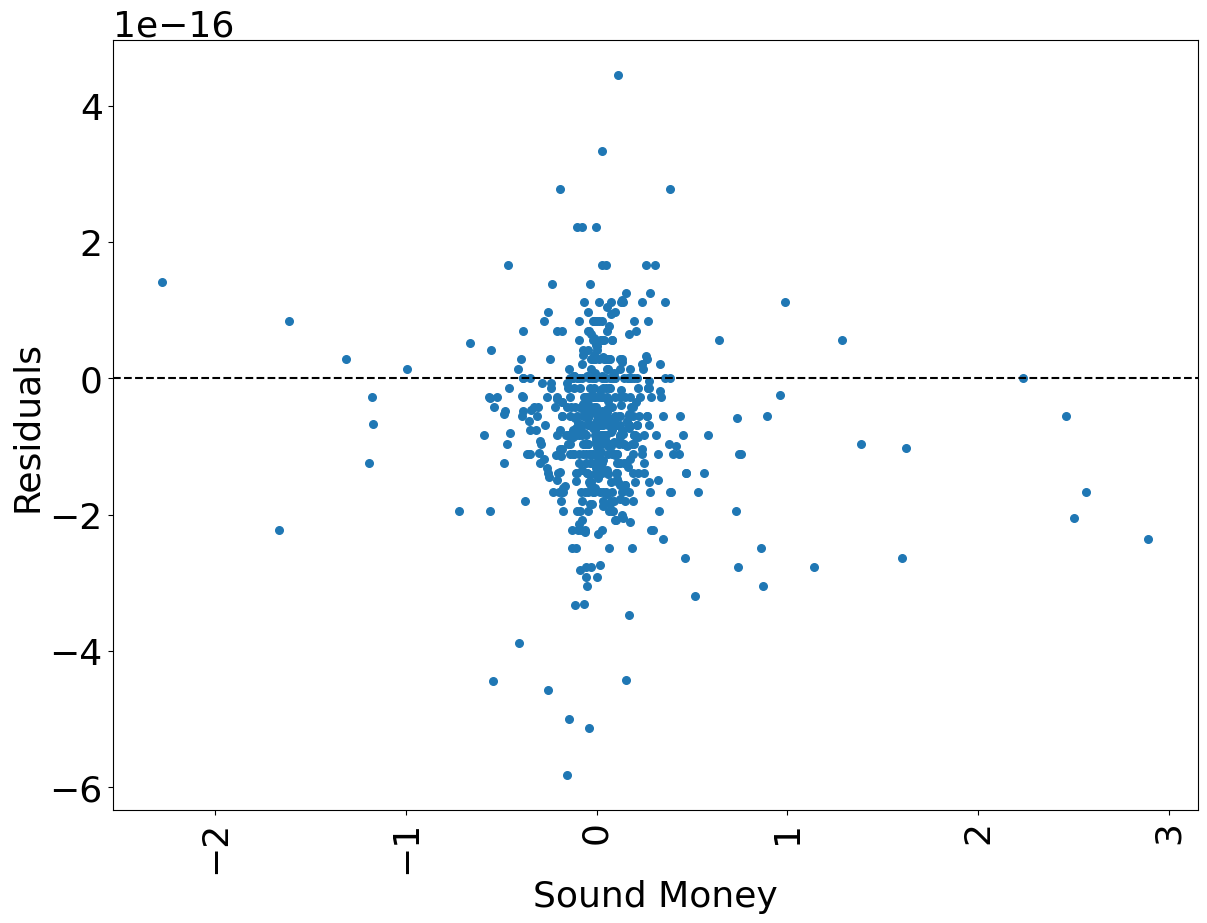

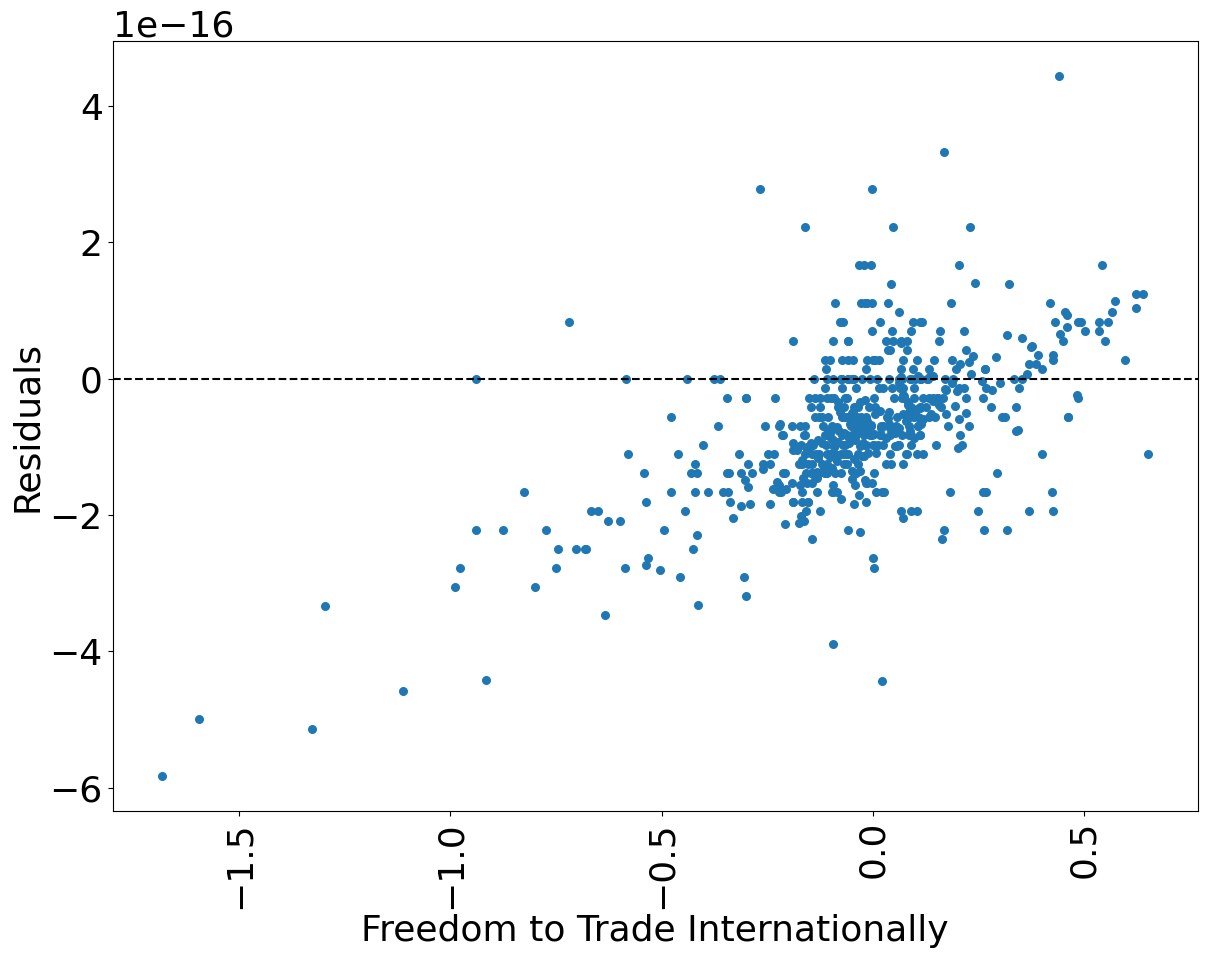

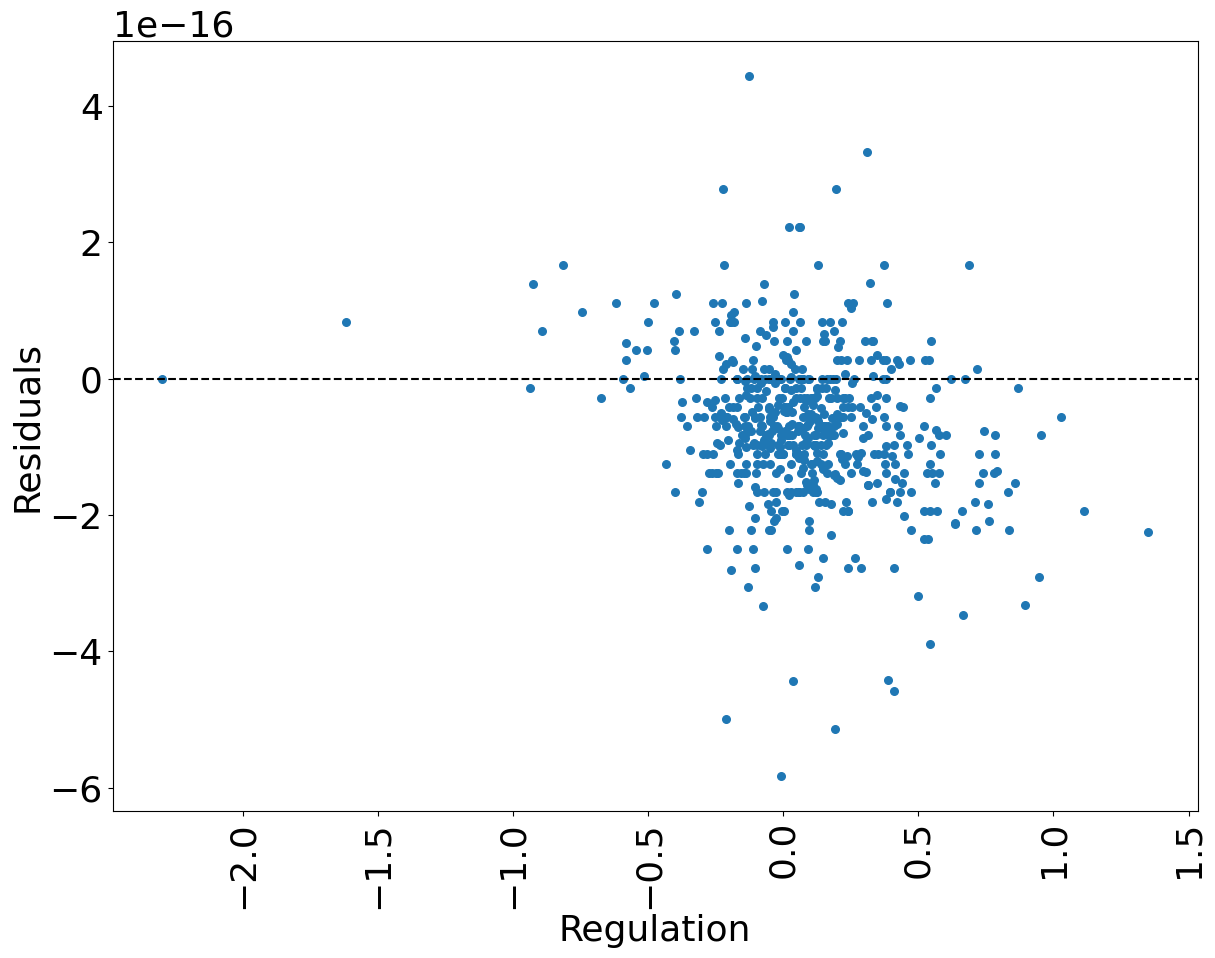

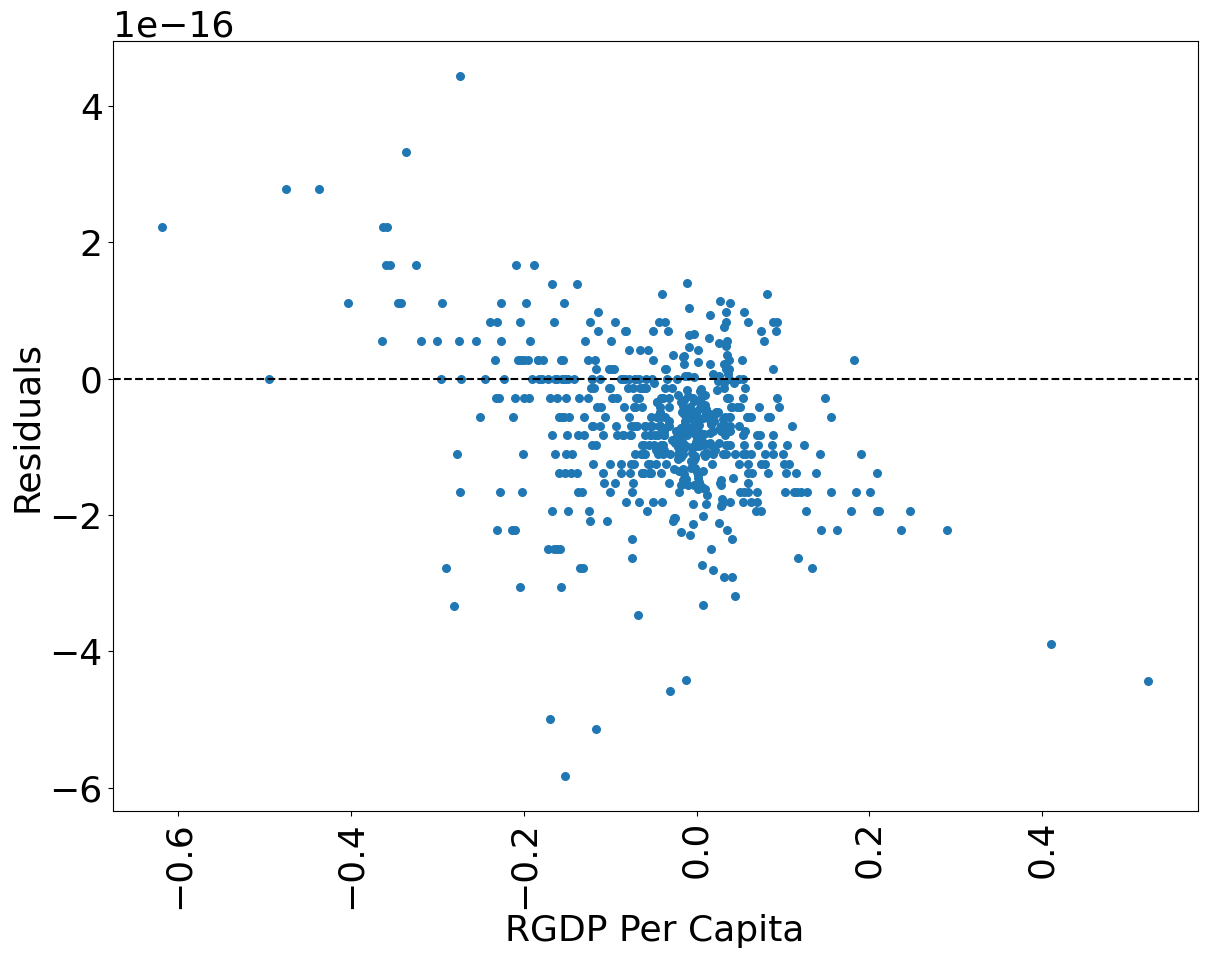

In [281]:
plot_residuals(r_df, y_var, x_vars)

### Still looks like significant bias in some of the graphs